# STATISTICS WITH US ELECTIONS
### Submitted By - Anna Maria
## BUSINESS UNDERSTANDING
### BACKGROUND
The citizens of the United States who are registered to vote in one of the 50 states or D.C will vote for the members of the US Electoral College or electors who in turn cast votes to choose the President and Vice President. These elections are held every four years, with registered voters casting their ballots on Election Day,  which is the first Tuesday after the first Monday in November.Social influence plays an important role in human behavior and decisions, especially with respect to elections. And the election results and data suggest that social influence effects are becoming more instrumental in shaping large scale political behavior.
    
### OBJECTIVE
The overall goal of this analysis was to provide evidence about the features that influence the nature of these elections. I will look to identify patterns in how voters chose their candidate based on the demographics of their county and how factors like race, population and overall economic status influence in their decision.

In [1]:
#IMPORT ALL THE PACKAGES
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## DATA UNDERSTANDING
### DATASET
The election data provided is for the years 2008, 2012 and 2016. The data is split into 3 CSV files: 	
•	Votes.csv: The votes data provides is county level data. It contains the number of votes for each major political party within each county. This dataset contains 3141 rows and 7 columns.

•	data.csv: This dataset has the census statistics of the county and is a compilation of multiple sources that contain the votes, population, race, health, life expectancy and economic data. This dataset contains 3141 rows and 54 columns.[FOR CONSISTENCY I WILL CALL THIS AS CENSUS DATA THROUGOUT THE DOCUMENT]

•	ec.csv: This dataset contains the state level electoral votes. This dataset contains 51 rows and 2 columns.

### DATA PREPERATION
#### Part 1 – LOAD THE DATASET
1) Load up the votes.csv and data.csv files into python


In [2]:
# LOAD THE DATASETS
# SETUP THE WORKING DIRECTORY AND LOAD THE V]8OTES.CSV FILE
cwd = os.getcwd()
election_votes = pd.read_csv(cwd + '/projectdata/votes.csv')
election_votes.head()

Democrats 08 (Votes)  Democrats 12 (Votes)  Republicans 08 (Votes)  \
0                2598.0                2630.0                  3860.0   
1                2144.0                2099.0                  3972.0   
2                1935.0                1845.0                  3916.0   
3               13191.0               12792.0                  8181.0   
4                2595.0                2442.0                  5543.0   

   Republicans 12 (Votes)  votes16_trumpd  votes16_clintonh   Fips  
0                  3887.0          3967.0            2364.0   5043  
1                  4263.0          4917.0            1587.0   5087  
2                  4136.0          4353.0            1544.0  13159  
3                  9411.0          8153.0           12652.0   8037  
4                  5214.0          5021.0            1836.0  13091

In [3]:
#LOAD THE DATA.CSV or CENSUS DATA FILE
election_data = pd.read_csv(cwd + '/projectdata/data.csv')
election_data.head()

State  ST   Fips                    County  Precincts    Votes  \
0  Arkansas  AR   5043     Drew County, Arkansas       17.0   6590.0   
1  Arkansas  AR   5087  Madison County, Arkansas       20.0   6829.0   
2   Georgia  GA  13159    Jasper County, Georgia        3.0   6016.0   
3  Colorado  CO   8037    Eagle County, Colorado       30.0  22611.0   
4   Georgia  GA  13091     Dodge County, Georgia       16.0   6995.0   

   Less Than High School Diploma  At Least High School Diploma  \
0                           19.4                          80.6   
1                           24.2                          75.8   
2                           21.7                          78.3   
3                           12.8                          87.2   
4                           23.1                          76.9   

   At Least Bachelors's Degree  Graduate Degree        ...         \
0                         19.4              5.7        ...          
1                         13.4              4.1        ...          
2                         13.3              5.6        ...          
3                         45.9             11.7        ...          
4                         13.8              4.8        ...          

   Adult.obesity  Diabetes  Sexually.transmitted.infections  \
0          0.323     0.126                            747.3   
1          0.328     0.135                            247.2   
2          0.298     0.118                            324.1   
3          0.132     0.036                            190.9   
4          0.358     0.153                            497.9   

   HIV.prevalence.rate  Uninsured  Unemployment  Violent.crime  Homicide.rate  \
0                 79.9      0.197         0.108         449.02            NaN   
1                131.3      0.239         0.053         245.83            NaN   
2                402.4      0.239         0.096         205.60            NaN   
3                133.7      0.230         0.081         123.88            NaN   
4                315.8      0.208         0.115         477.48           8.11   

   Injury.deaths  Infant.mortality  
0           82.0               NaN  
1           96.8               NaN  
2           71.6               NaN  
3           42.9               3.5  
4           79.4               NaN  

[5 rows x 54 columns]

In [4]:
#LOAD THE EC.CSV or ELECTORAL COLLEGE VOTES FILE
election_ec = pd.read_csv(cwd + '/projectdata/ec.csv')
election_ec.head()

State  EC_votes
0     Alabama         9
1      Alaska         3
2     Arizona        11
3    Arkansas         6
4  California        55

2) One of the key steps in the data analysis phase is to understand the dataset, its features and types.
Getting a summary of the overall datasets was key before the deep dive analysis, so below screen shot gives a picture of the 2 main datasets used:

In this section i ran some stats on the various columns of data from each dataset.

In [5]:
#GET A SUMMARY OF THE VOTES TABLE
election_votes.describe()

Democrats 08 (Votes)  Democrats 12 (Votes)  Republicans 08 (Votes)  \
count          3.110000e+03          3.110000e+03             3110.000000   
mean           2.230430e+04          2.114973e+04            19207.669453   
std            7.716378e+04          7.425758e+04            44878.636253   
min            8.000000e+00          5.000000e+00               67.000000   
25%            1.811750e+03          1.556750e+03             2883.250000   
50%            4.505500e+03          3.999000e+03             6312.000000   
75%            1.239000e+04          1.138100e+04            16025.750000   
max            2.295853e+06          2.216903e+06           956425.000000   

       Republicans 12 (Votes)  votes16_trumpd  votes16_clintonh         Fips  
count             3110.000000     3109.000000      3.109000e+03   3141.00000  
mean             19532.321222    19634.384046      2.007697e+04  30406.52149  
std              44795.765395    40459.435551      7.203087e+04  15156.09339  
min                 54.000000       57.000000      4.000000e+00   1001.00000  
25%               2918.750000     3208.000000      1.166000e+03  18181.00000  
50%               6450.500000     7169.000000      3.155000e+03  29179.00000  
75%              16315.250000    17446.000000      9.610000e+03  45083.00000  
max             885333.000000   620285.000000      1.893770e+06  56045.00000

In [6]:
#GET A SUMMARY OF THE DATA - CENSUS TABLE
election_data.describe()

Fips    Precincts         Votes  Less Than High School Diploma  \
count   3141.00000  3109.000000  3.109000e+03                    3141.000000   
mean   30406.52149    54.940495  4.178247e+04                      16.874514   
std    15156.09339   172.926255  1.134574e+05                       7.349563   
min     1001.00000     1.000000  6.400000e+01                       0.700000   
25%    18181.00000    11.000000  4.847000e+03                      11.400000   
50%    29179.00000    20.000000  1.094800e+04                      15.400000   
75%    45083.00000    38.000000  2.882800e+04                      21.600000   
max    56045.00000  4988.000000  2.652072e+06                      52.100000   

       At Least High School Diploma  At Least Bachelors's Degree  \
count                   3141.000000                  3141.000000   
mean                      83.045893                    19.013419   
std                        7.533330                     8.646941   
min                       29.900000                     3.700000   
25%                       78.400000                    13.100000   
50%                       84.600000                    16.900000   
75%                       88.600000                    22.600000   
max                       99.300000                    71.000000   

       Graduate Degree  School Enrollment  Median Earnings 2010  \
count      3141.000000        3141.000000           3141.000000   
mean          6.449682          74.953932          25463.387576   
std           3.849162           5.261211           5078.837873   
min           0.000000           0.000000              0.000000   
25%           4.000000          72.300000          22332.413650   
50%           5.300000          75.150000          24830.888890   
75%           7.700000          77.950000          27548.556510   
max          40.600000         100.000000          56674.350795   

       White (Not Latino) Population        ...         Adult.obesity  \
count                    3141.000000        ...           3136.000000   
mean                       78.778908        ...              0.305523   
std                        19.625220        ...              0.042426   
min                         2.500000        ...              0.131000   
25%                        67.700000        ...              0.283000   
50%                        86.350000        ...              0.307000   
75%                        94.300000        ...              0.331000   
max                        99.200000        ...              0.479000   

          Diabetes  Sexually.transmitted.infections  HIV.prevalence.rate  \
count  3136.000000                      2952.000000          2320.000000   
mean      0.107103                       354.269682           174.590733   
std       0.022529                       273.108568           229.263418   
min       0.033000                        37.400000            11.000000   
25%       0.092000                       182.550000            59.800000   
50%       0.106000                       271.150000           102.500000   
75%       0.122000                       440.350000           204.250000   
max       0.194000                      2754.400000          3764.100000   

         Uninsured  Unemployment  Violent.crime  Homicide.rate  Injury.deaths  \
count  3135.000000   3135.000000    2953.000000    1251.000000    2844.000000   
mean      0.179860      0.077045     257.055923       6.285803      76.112553   
std       0.054765      0.027680     207.563047       4.659909      24.604878   
min       0.031000      0.008000       0.000000       0.610000      23.300000   
25%       0.140000      0.058000     114.620000       3.195000      59.300000   
50%       0.177000      0.075000     201.920000       5.080000      72.800000   
75%       0.215000      0.093000     340.650000       8.105000      88.925000   
max       0.460000      0.283000    1989.540000      51.490000     320.900000   

   

In [7]:
#UNDERSTANDING THE EDUCATIONAL DATA COLUMNS
election_data.iloc[:,6:11].head()

Less Than High School Diploma  At Least High School Diploma  \
0                           19.4                          80.6   
1                           24.2                          75.8   
2                           21.7                          78.3   
3                           12.8                          87.2   
4                           23.1                          76.9   

   At Least Bachelors's Degree  Graduate Degree  School Enrollment  
0                         19.4              5.7               78.5  
1                         13.4              4.1               76.4  
2                         13.3              5.6               70.2  
3                         45.9             11.7               64.1  
4                         13.8              4.8               61.5

In [8]:
#UNDERSTANDING THE EDUCATIONAL DATA COLUMNS USING DATA SUMMARY
election_data.iloc[:,6:11].head()

Less Than High School Diploma  At Least High School Diploma  \
0                           19.4                          80.6   
1                           24.2                          75.8   
2                           21.7                          78.3   
3                           12.8                          87.2   
4                           23.1                          76.9   

   At Least Bachelors's Degree  Graduate Degree  School Enrollment  
0                         19.4              5.7               78.5  
1                         13.4              4.1               76.4  
2                         13.3              5.6               70.2  
3                         45.9             11.7               64.1  
4                         13.8              4.8               61.5

In [9]:
#UNDERSTANDING THE RACE DEMOGRAPHICS DATA COLUMNS
election_data.iloc[:,31:38].head()

White  Black  Hispanic  Asian  Amerindian  Other  White_Asian
0  67.90  27.95      2.65   0.55        0.15   0.85        68.45
1  92.00   0.25      4.70   0.30        1.25   1.50        92.30
2  72.70  22.20      3.55   0.10        0.40   1.05        72.80
3  68.40   0.30     28.90   1.15        0.25   1.10        69.55
4  66.15  29.80      2.80   0.45        0.15   0.65        66.60

In [10]:
#UNDERSTANDING THE POVERTY DATA COLUMNS
election_data.iloc[:,18:25].head()

Children Under 6 Living in Poverty  Adults 65 and Older Living in Poverty  \
0                               34.15                                  14.40   
1                               26.20                                  18.45   
2                               17.60                                  17.95   
3                               11.65                                   4.85   
4                               20.65                                  20.60   

   Total Population  Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0             18604                                              73.5   
1             15597                                              43.8   
2             13744                                              36.5   
3             51405                                              50.7   
4             20745                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  
0                                              36.95        
1                                              25.15        
2                                              27.60        
3                                              12.05        
4                                              23.70

In [11]:
#UNDERSTANDING THE PROFESSION  COLUMNS DATA COLUMNS
election_data.iloc[:,25:31].head()

Management.professional.and.related.occupations  Service.occupations  \
0                                            28.35                18.25   
1                                            25.15                16.85   
2                                            21.60                17.15   
3                                            32.90                24.80   
4                                            26.15                20.05   

   Sales.and.office.occupations  Farming.fishing.and.forestry.occupations  \
0                         20.15                                      3.60   
1                         19.55                                      2.90   
2                         22.60                                      4.35   
3                         20.05                                      0.45   
4                         22.00                                      1.60   

   Construction.extraction.maintenance.and.repair.occupations  \
0                                               9.40            
1                                              16.20            
2                                              15.10            
3                                              15.50            
4                                              11.35            

   Production.transportation.and.material.moving.occupations  
0                                              20.20          
1                                              19.40          
2                                              19.25          
3                                               6.30          
4                                              18.85

Also, further analysis of individual columns in the vote’s dataset showed that it had absolute values of the votes for 2008,2012 and 2016. Similarly, in the data for census and economic features I found that 90% of the columns had relative data (percentages and fractions) when compared to absolute values. The above queries can provide a high-level overview of the datasets.

#### DUPLICATE DATA
There were no duplicate rows found in all the 3 datasets, but there were some duplicate columns that were found.
The duplicate columns were found in the data.csv file and the column names are “White”,” Black”,” Hispanic”,” Asian”,” Amerindian” and “Other”. 

In [12]:
#CHECK FOR DUPLICATED ROWS IN THE VOTES DATASET
election_votes.duplicated().sum()

0

In [13]:
#CHECK FOR DUPLICATED ROWS IN THE DATA - CENSUS DATASET
election_data.duplicated().sum()

0

In [14]:
#CHECK FOR DUPLICATED ROWS IN THE EC DATASET
election_ec.duplicated().sum()

0

In [5]:
#REMOVE DUPLICATE COLUMNS “WHITE”, ”BLACK”, ”HISPANIC”, ”ASIAN”,  ”AMERINDIAN” AND “OTHER”
#WARNING: THIS IS NOT THE BEST METHOD TO REMOVE DUPLICATE COLUMNS AS THIS WOULD HAVE SOME IMPACT ON THE PERFORMANCE. THE
#BEST WOULD BE TO LOOP THROUGH THE COLUMNS AND ROWS USING INDEXES TO AVOID PERFORMANCE ISSUES. AS THIS IS A SMALLER DATASET
#I HAVE USED THE DROP_DUPLICATES FUNCTION.
election_data = election_data.T.drop_duplicates().T
#election_data.info()

In [6]:
#DROP THE WHITE_ASIAN DUPLICATE DATA COLUMN
election_data = election_data.drop(['White_Asian'], axis=1)
election_data.head()

State  ST   Fips                    County Precincts  Votes  \
0  Arkansas  AR   5043     Drew County, Arkansas        17   6590   
1  Arkansas  AR   5087  Madison County, Arkansas        20   6829   
2   Georgia  GA  13159    Jasper County, Georgia         3   6016   
3  Colorado  CO   8037    Eagle County, Colorado        30  22611   
4   Georgia  GA  13091     Dodge County, Georgia        16   6995   

  Less Than High School Diploma At Least High School Diploma  \
0                          19.4                         80.6   
1                          24.2                         75.8   
2                          21.7                         78.3   
3                          12.8                         87.2   
4                          23.1                         76.9   

  At Least Bachelors's Degree Graduate Degree       ...        Adult.obesity  \
0                        19.4             5.7       ...                0.323   
1                        13.4             4.1       ...                0.328   
2                        13.3             5.6       ...                0.298   
3                        45.9            11.7       ...                0.132   
4                        13.8             4.8       ...                0.358   

  Diabetes Sexually.transmitted.infections HIV.prevalence.rate Uninsured  \
0    0.126                           747.3                79.9     0.197   
1    0.135                           247.2               131.3     0.239   
2    0.118                           324.1               402.4     0.239   
3    0.036                           190.9               133.7      0.23   
4    0.153                           497.9               315.8     0.208   

  Unemployment Violent.crime Homicide.rate Injury.deaths Infant.mortality  
0        0.108        449.02           NaN            82              NaN  
1        0.053        245.83           NaN          96.8              NaN  
2        0.096         205.6           NaN          71.6              NaN  
3        0.081        123.88           NaN          42.9              3.5  
4        0.115        477.48          8.11          79.4              NaN  

[5 rows x 47 columns]

This is not the best method to remove duplicate columns as this would have some impact on the performance. The best would be to loop through the columns and rows using indexes to avoid performance issues. As this is a smaller dataset I have used the drop duplicates function.
Also, while analyzing the data I found that the column “White Asian”, it was found that this column was a sum of the Columns for “White (Not Latino)” and “Asian American”. I believe it would be best to remove it as it might skew the model results.

#### MISSING DATA
Missing data are a common problem in all kinds of data analysis. The way we deal with it depends on how much data is missing, the kind of missing data, and why it is missing, i.e. the reasons that the data are missing. It is usual to define missing into 3 kinds: missing completely at random (MCAR), missing at random (MAR) and missing not at random (MNAR).
##### VOTES DATA
As a first step it would be best to find the percent of null columns in the dataset and the numbers can be seen below which are <= 1% of the overall dataset.  So, in this dataset we can see that the FIPS code which is unique to the county has no missing or null values. The remaining columns have missing data and I was able to conclude that the data is “Missing at Random”. The reason for me to say that it is missing at random can be seen in the below analysis.

In [17]:
#FIND PERCENT OF COLUMNS WITH MISSING DATA FROM THE VOTES DATASET. WHAT IS RETURNED IS A FRACTION.
votes_percent = election_votes.isnull().sum() / len(election_votes)
votes_percent

Democrats 08 (Votes)      0.009869
Democrats 12 (Votes)      0.009869
Republicans 08 (Votes)    0.009869
Republicans 12 (Votes)    0.009869
votes16_trumpd            0.010188
votes16_clintonh          0.010188
Fips                      0.000000
dtype: float64

In [9]:
#CREATE A NEW DATAFRAME FOR THE NULL VALUES ONLY. THIS WILL RETURN ABOUT 32 ROWS OF MISSING DATA
votes_nulls = election_votes[election_votes.isnull().any(axis=1)]
votes_nulls.head()

Democrats 08 (Votes)  Democrats 12 (Votes)  Republicans 08 (Votes)  \
139                   NaN                   NaN                     NaN   
140                   NaN                   NaN                     NaN   
397                   NaN                   NaN                     NaN   
472                   NaN                   NaN                     NaN   
684                   NaN                   NaN                     NaN   

     Republicans 12 (Votes)  votes16_trumpd  votes16_clintonh  Fips  
139                     NaN             NaN               NaN  2110  
140                     NaN             NaN               NaN  2170  
397                     NaN             NaN               NaN  2068  
472                     NaN             NaN               NaN  2100  
684                     NaN             NaN               NaN  2275

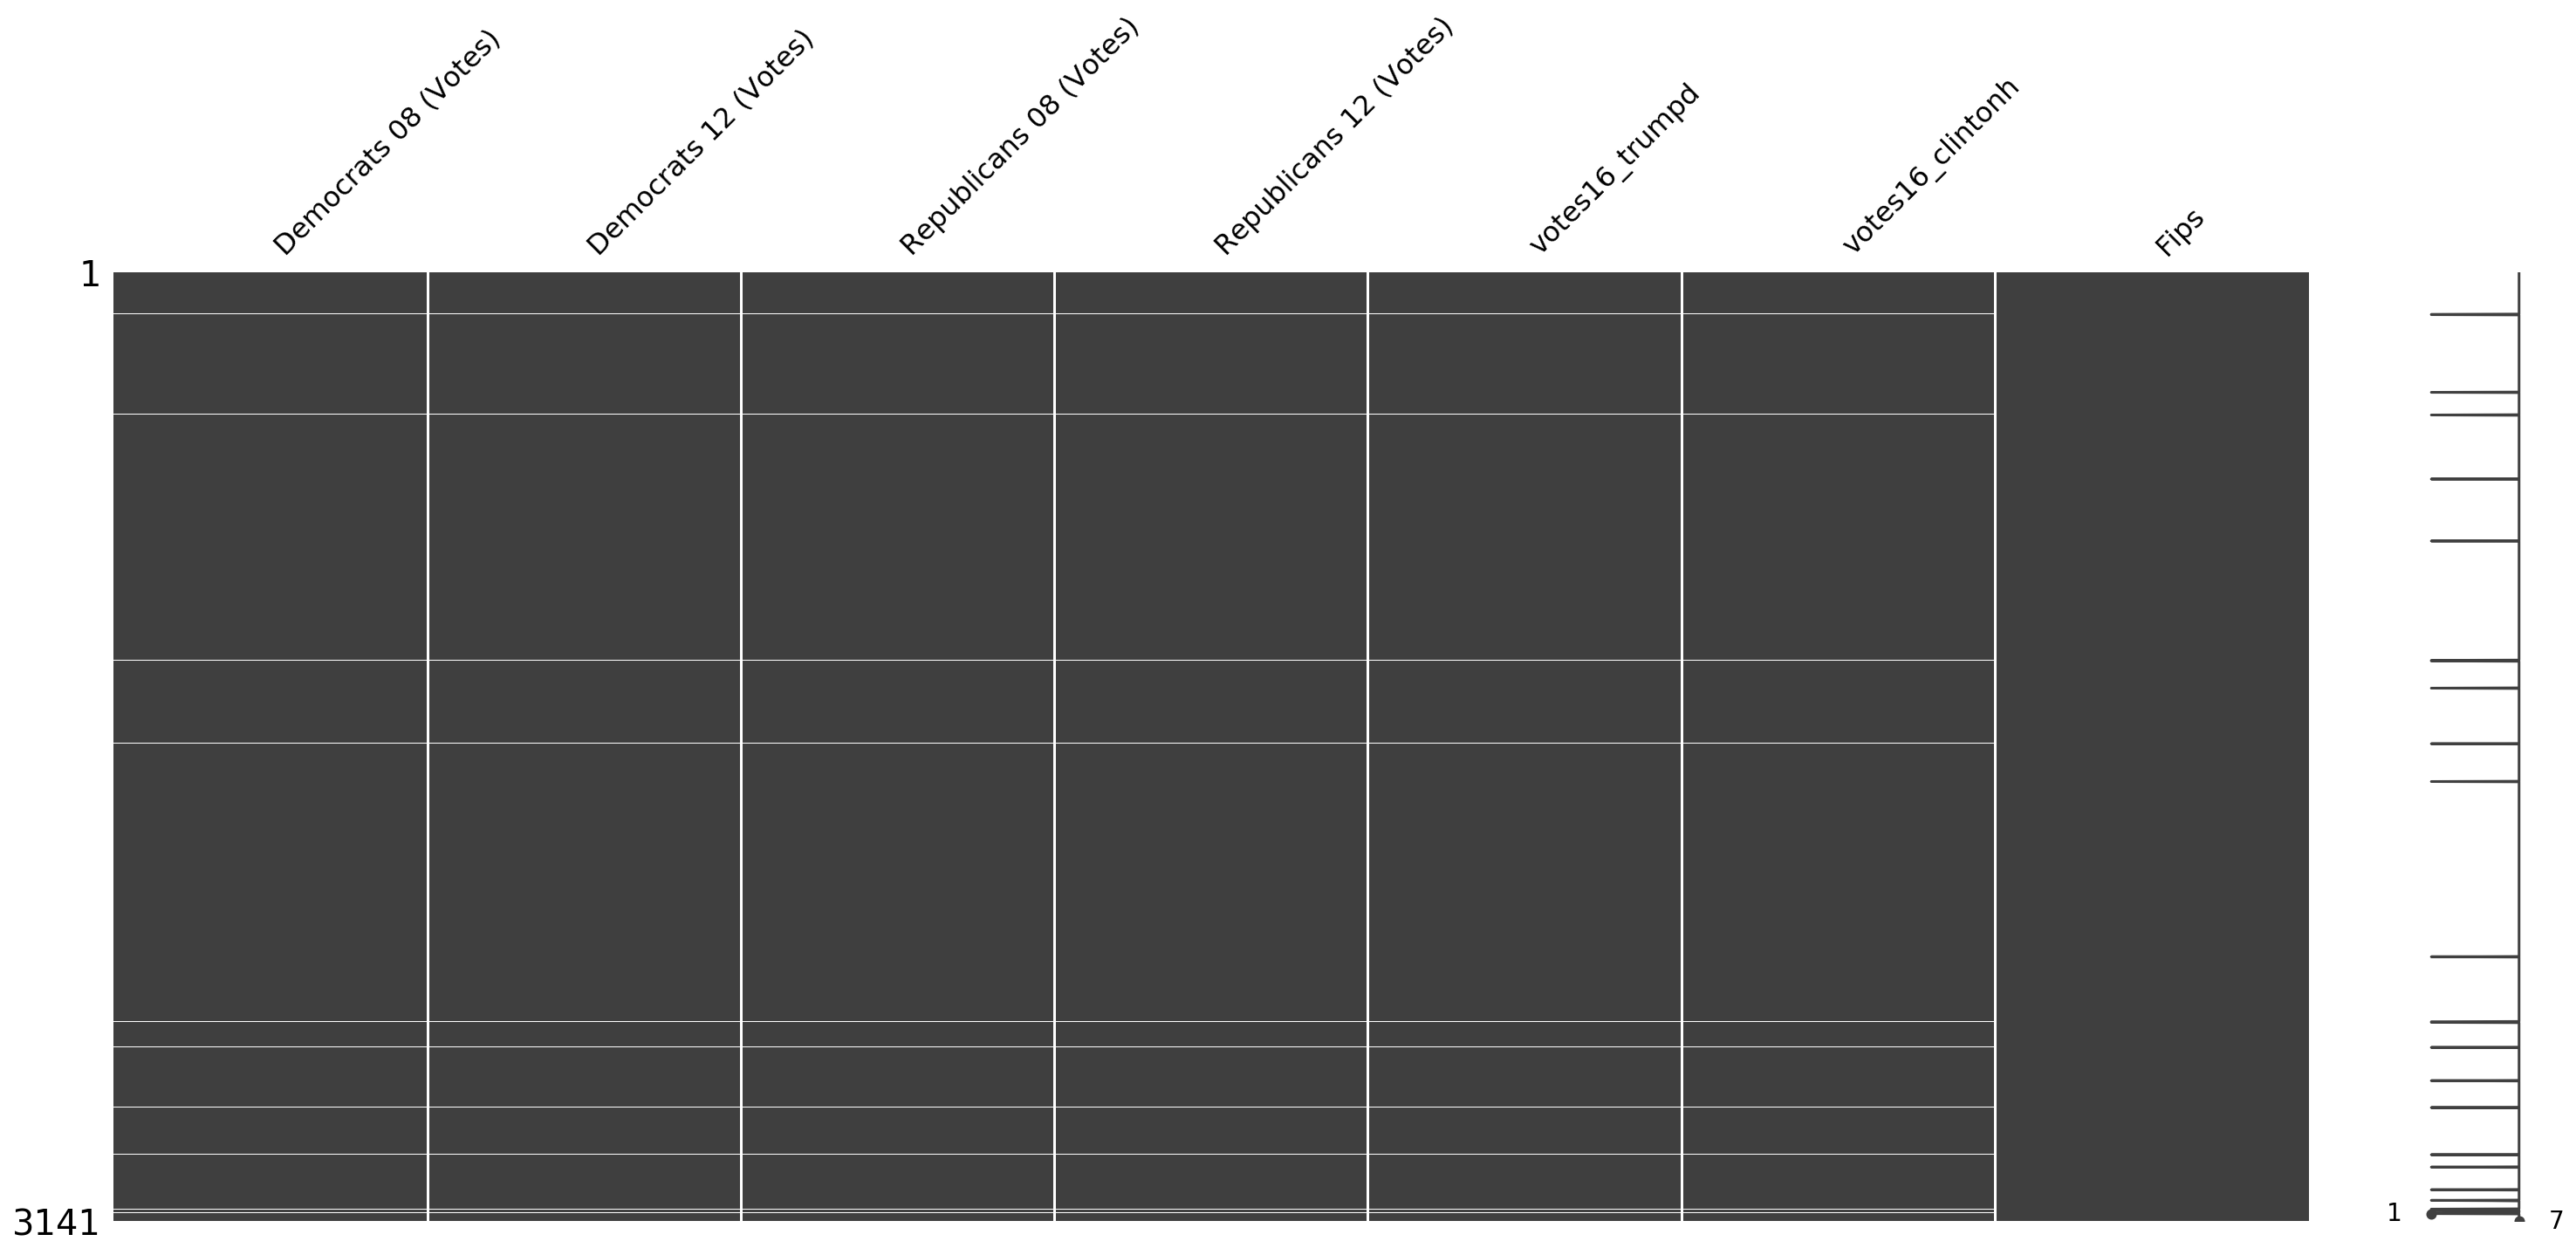

In [19]:
#PLOT MISSING DATA USING THE MATRIX FOR THE VOTES DATASET
msno.matrix(election_votes)

The above figure and table show’s that the data is missing at Random. To verify that it was "MAR" and that similar data is missing from the Census dataset which also had a FIPS code and “Votes” columns, I grouped the data by “State” in the Census dataset.

In [7]:
#VERIFY THAT THE VOTES COLUMN IN THE CENSUS DATASET HAD NULL VALUES SIMILAR TO THE VOTES DATASET. 
#AND 32 ROWS OF DATA WERE MISSING FROM THIS COLUMN, SIMILAR TO THE "VOTES" DATASET.
census_votes = election_data[(election_data['Votes']).isnull()]
census_votes.groupby(['State']).count()

ST  Fips  County  Precincts  Votes  \
State                                              
Alaska        29    29      29          0      0   
Hawaii         1     1       1          0      0   
South Dakota   1     1       1          0      0   
Virginia       0     1       1          0      0   

              Less Than High School Diploma  At Least High School Diploma  \
State                                                                       
Alaska                                   29                            29   
Hawaii                                    1                             1   
South Dakota                              1                             1   
Virginia                                  1                             1   

              At Least Bachelors's Degree  Graduate Degree  School Enrollment  \
State                                                                           
Alaska                                 29               29                 29   
Hawaii                                  1                1                  1   
South Dakota                            1                1                  1   
Virginia                                1                1                  1   

                    ...         Adult.obesity  Diabetes  \
State               ...                                   
Alaska              ...                    24        24   
Hawaii              ...                     1         1   
South Dakota        ...                     1         1   
Virginia            ...                     1         1   

              Sexually.transmitted.infections  HIV.prevalence.rate  Uninsured  \
State                                                                           
Alaska                                     22                   11         24   
Hawaii                                      0                    0          0   
South Dakota                                1                    0          1   
Virginia                                    1                    1          1   

              Unemployment  Violent.crime  Homicide.rate  Injury.deaths  \
State                                                                     
Alaska                  24              9              6             18   
Hawaii                   0              0              0              0   
South Dakota             1              1              1              1   
Virginia                 1              1              0              1   

              Infant.mortality  
State                           
Alaska                       7  
Hawaii                       0  
South Dakota                 1  
Virginia                     0  

[4 rows x 46 columns]

In [10]:
#MATCH THE FIP CODES OF THE NULL VALUES ROWS FROM THE "VOTES" DATASET AND THE CENSUS DATASET OF THE "VOTES COLUMN".
#THE NUMBER RETURNED WOULD BE 32.
set(votes_nulls['Fips']).intersection(set(census_votes['Fips']))

{2013,
 2016,
 2020,
 2050,
 2060,
 2068,
 2070,
 2090,
 2100,
 2105,
 2110,
 2122,
 2130,
 2150,
 2164,
 2170,
 2180,
 2185,
 2188,
 2195,
 2198,
 2220,
 2230,
 2240,
 2261,
 2270,
 2275,
 2282,
 2290,
 15005,
 46113,
 51515}

In [11]:
#DROP ALL ROWS WITH MISSING VALUES WHICH WOULD BE AROUND 32 rows
election_votes.dropna(inplace=True)
election_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 7 columns):
Democrats 08 (Votes)      3109 non-null float64
Democrats 12 (Votes)      3109 non-null float64
Republicans 08 (Votes)    3109 non-null float64
Republicans 12 (Votes)    3109 non-null float64
votes16_trumpd            3109 non-null float64
votes16_clintonh          3109 non-null float64
Fips                      3109 non-null int64
dtypes: float64(6), int64(1)
memory usage: 194.3 KB


•	There was no data present for any of the counties under the state of “Alaska”, which means we have no data for Alaska. Also, another point is Alaska does not have any counties and has boroughs and the FIPS codes are different.

•	One county from Hawaii, South Dakota and Virginia did not have the voting data.

•	This data was compared to the data from the Votes dataset and the FIP codes matched.

As we see that it is a smaller number of missing values and similar information is missing for the same columns in the Census Data Table which is the ‘Votes’ and ‘Precincts’ Column. But as we have seen the data missing for a State, and dropping the data would be better than any other approach as it may skew the remaining data. 

So as a final step all 32 rows with missing data where dropped from the "Votes" Dataset.

##### CENSUS DATA
Similar to the “Votes” dataset we will understand the percent of columns with null values within the Census Data.  From this dataset we found that there are about 2080 rows with null values. Off the original 54 columns we already removed 7 columns with duplicate data. For the remaining 47 columns we found that, 27 columns did not have any issues with missing data. So, there were columns which had missing data and we will be grouping these 20 columns based on their category of missing data.

In [23]:
#FIND PERCENT OF COLUMNS WITH MISSING DATA FROM THE CENSUS DATASET
data_percent = election_data.isnull().sum() / len(election_data)
data_percent

State                                                         0.000000
ST                                                            0.000318
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.010188
Votes                                                         0.010188
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

In [24]:
#FIND THE NUMBER OF ROWS WITH NULL VALUES - THIS DISPLAYS ALL 32 ROWS WHERE IT IS MOSTLY THE STATE OF ALASKA THAT DOES NOT HAVE DATA
election_data[election_data.isnull().any(axis=1)]

State   ST   Fips                                   County  \
0           Arkansas   AR   5043                    Drew County, Arkansas   
1           Arkansas   AR   5087                 Madison County, Arkansas   
2            Georgia   GA  13159                   Jasper County, Georgia   
3           Colorado   CO   8037                   Eagle County, Colorado   
4            Georgia   GA  13091                    Dodge County, Georgia   
7           Colorado   CO   8125                    Yuma County, Colorado   
8           Colorado   CO   8099                 Prowers County, Colorado   
11           Georgia   GA  13317                   Wilkes County, Georgia   
14          Illinois   IL  17005                    Bond County, Illinois   
15              Iowa   IA  19157                   Poweshiek County, Iowa   
16              Iowa   IA  19169                       Story County, Iowa   
17              Iowa   IA  19087                       Henry County, Iowa   
18          Illinois   IL  17155                  Putnam County, Illinois   
19           Georgia   GA  13231                     Pike County, Georgia   
20          Kentucky   KY  21033                Caldwell County, Kentucky   
23          Kentucky   KY  21039                Carlisle County, Kentucky   
25          Illinois   IL  17169                Schuyler County, Illinois   
26           Indiana   IN  18047                 Franklin County, Indiana   
27          Michigan   MI  26015                   Barry County, Michigan   
28         Minnesota   MN  27017                Carlton County, Minnesota   
29         Minnesota   MN  27029             Clearwater County, Minnesota   
30         Minnesota   MN  27115                   Pine County, Minnesota   
31         Minnesota   MN  27165               Watonwan County, Minnesota   
32          Missouri   MO  29057                    Dade County, Missouri   
33       Mississippi   MS  28023               Clarke County, Mississippi   
34       Mississippi   MS  28097           Montgomery County, Mississippi   
37       Mississippi   MS  28163                Yazoo County, Mississippi   
38           Montana   MT  30089                  Sanders County, Montana   
40          Kentucky   KY  21087                   Green County, Kentucky   
41          Kentucky   KY  21139              Livingston County, Kentucky   
...              ...  ...    ...                                      ...   
3099   West Virginia   WV  54051           Marshall County, West Virginia   
3100          Alaska   AK   2240  Southeast Fairbanks Census Area, Alaska   
3101          Alaska   AK   2290        Yukon-Koyukuk Census Area, Alaska   
3102          Alaska   AK   2282         Yakutat City and Borough, Alaska   
3103          Alaska   AK   2164       Lake and Peninsula Borough, Alaska   
3104         Georgia   GA  13085                   Dawson County, Georgia   
3105            Ohio   OH  39163                      Vinton County, Ohio   
3106        Virginia   VA  51155                 Pulaski County, Virginia   
3108       Wisconsin   WI  55001                  Adams County, Wisconsin   
3110   West Virginia   WV  54069               Ohio County, West Virginia   
3111   West Virginia   WV  54101            Webster County, West Virginia   
3112          Alaska   AK   2070           Dillingham Census Area, Alaska   
3113          Alaska   AK   2105        Hoonah-Angoon Census Area, Alaska   
3114          Alaska   AK   2122          Kenai Peninsula Borough, Alaska   
3115        Virginia  NaN  51515                   Bedford city, Virginia   
3116        New York   NY  36097                Schuyler County, New York   
3118            Ohio   OH  39167                  Washington County, Ohio   
3119           Texas   TX  48019                    Bandera County, Texas   
3120           Texas   TX  48059                   Callahan County, Texas   
3122           Texas   TX  48279                       Lamb County, Texas   
3123       

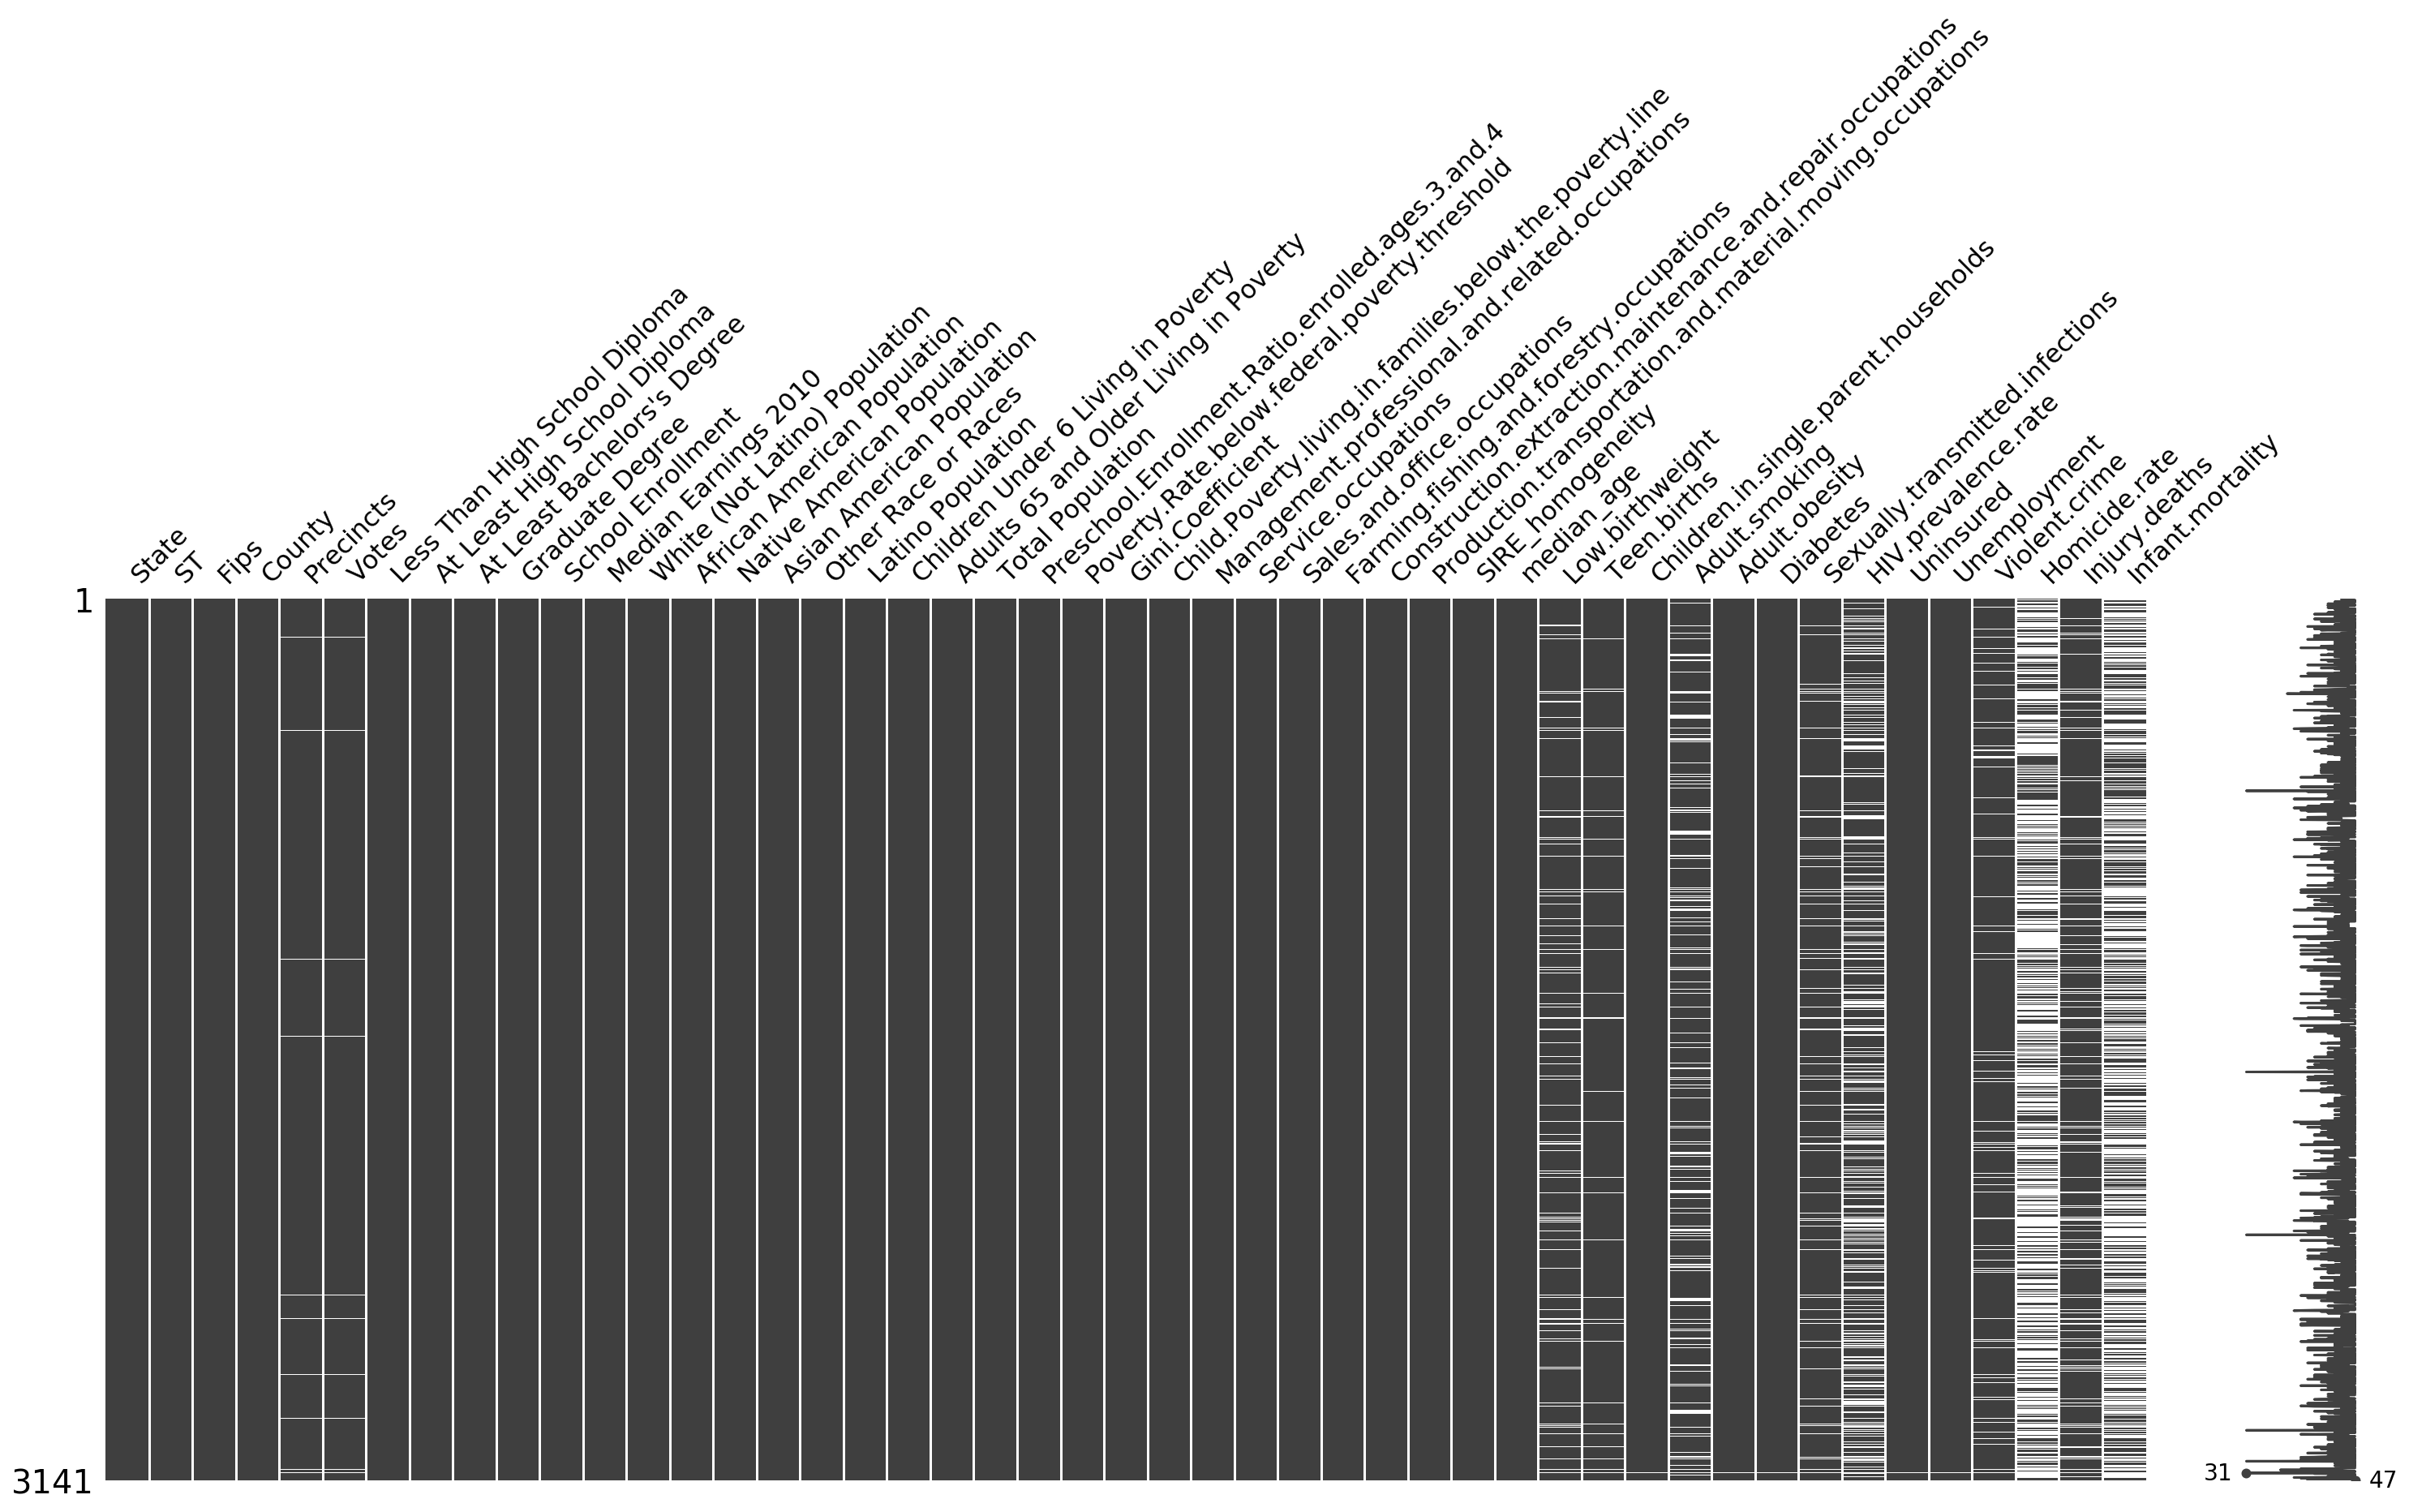

In [25]:
#PLOT MISSING DATA USING THE MATRIX FOR THE DATA_CENSUS DATASET
msno.matrix(election_data)

Deleting columns that have more than a certain percentage of missing values is one of the techniques of dimensionality reduction. In the case of multivariate analysis, if there is a larger number of missing values, then it can be better to drop those cases (rather than do imputation) and replace them. And the percentage or number may vary from case from to case, but theoretically an acceptable number would be anything greater than 25% to 30%.  And in our scenario, we can see that the columns "HIV. Prevalence. rate", "Infant. Mortality" and "Homicide. Rate" have values missing which is greater than 25%. Considering this is election analysis data, I do not believe there will to be any significant impact to the analysis and with so many values missing I will be dropping these columns from the dataset.

In [12]:
#DROP COLUMNS WITH NULL VALUES GREATER THAN 25%. THE COLUMNS ARE HIV.PREVALENCE.RATE, INFANT.MORTALITY, HOMICIDE.RATE
election_data = election_data.drop(['HIV.prevalence.rate', 'Infant.mortality', 'Homicide.rate'], axis=1)
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 44 columns):
State                                                         3141 non-null object
ST                                                            3140 non-null object
Fips                                                          3141 non-null object
County                                                        3141 non-null object
Precincts                                                     3109 non-null object
Votes                                                         3109 non-null object
Less Than High School Diploma                                 3141 non-null object
At Least High School Diploma                                  3141 non-null object
At Least Bachelors's Degree                                   3141 non-null object
Graduate Degree                                               3141 non-null object
School Enrollment                                             3

Next, we will be handling the Columns ‘ST’, ‘Precincts’ and ‘Votes’, as the ‘ST’ columns has only one value missing, I will go ahead and update the data manually for this. So, it is the State of Virginia that has a Nan.

In [13]:
#AS ONLY ON VALUE IS MISSING FROM THE ST COLUMN, WE NEED TO FIND OUT WHICH ONE IS MISSING.
election_data[election_data['ST'].isnull()]

State   ST   Fips                  County Precincts Votes  \
3115  Virginia  NaN  51515  Bedford city, Virginia       NaN   NaN   

     Less Than High School Diploma At Least High School Diploma  \
3115                          15.5                         84.5   

     At Least Bachelors's Degree Graduate Degree      ...      Teen.births  \
3115                        20.8             7.9      ...             47.8   

     Children.in.single.parent.households Adult.smoking Adult.obesity  \
3115                                0.612           NaN         0.301   

     Diabetes Sexually.transmitted.infections Uninsured Unemployment  \
3115    0.128                           323.6     0.155        0.086   

     Violent.crime Injury.deaths  
3115        297.03          97.2  

[1 rows x 44 columns]

In [14]:
#UPDATE THE ST COLUMN WITH THE STATE OF VIRGINIA
election_data.loc[3115,'ST'] = 'VA'
election_data.loc[3115:3115]


State  ST   Fips                  County Precincts Votes  \
3115  Virginia  VA  51515  Bedford city, Virginia       NaN   NaN   

     Less Than High School Diploma At Least High School Diploma  \
3115                          15.5                         84.5   

     At Least Bachelors's Degree Graduate Degree      ...      Teen.births  \
3115                        20.8             7.9      ...             47.8   

     Children.in.single.parent.households Adult.smoking Adult.obesity  \
3115                                0.612           NaN         0.301   

     Diabetes Sexually.transmitted.infections Uninsured Unemployment  \
3115    0.128                           323.6     0.155        0.086   

     Violent.crime Injury.deaths  
3115        297.03          97.2  

[1 rows x 44 columns]

For the ‘Precinct’ and ‘Votes’ columns I will drop the rows with NULLS/Nan’s, as we have missing data for the States of Alaska, this will be handled in the same way it was done for the columns in the Votes dataset. 

In [15]:
#DROP THE COLUMNS PRECINCTS AND VOTES, AS THE MISSING VALUES ARE MOSTLY FOR THE STATE OF ALASKA
election_data = election_data.dropna(axis=0, subset=['Precincts'])
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 44 columns):
State                                                         3109 non-null object
ST                                                            3109 non-null object
Fips                                                          3109 non-null object
County                                                        3109 non-null object
Precincts                                                     3109 non-null object
Votes                                                         3109 non-null object
Less Than High School Diploma                                 3109 non-null object
At Least High School Diploma                                  3109 non-null object
At Least Bachelors's Degree                                   3109 non-null object
Graduate Degree                                               3109 non-null object
School Enrollment                                             3

In [16]:
#CHECK THE PERCENTAGES OF THE MISSING COLUMNS - TO VERIFY
election_data.isnull().sum() / len(election_data)

State                                                         0.000000
ST                                                            0.000000
Fips                                                          0.000000
County                                                        0.000000
Precincts                                                     0.000000
Votes                                                         0.000000
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000000
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.000000
African American Population                                   0.000000
Native

We can see that "Adult.smoking" is one column with about 13% of missing data, so i am going to drop this column too as this is missing completely at random.When looking at the data for this column it did not look like they were missing among a specific group and having this column or imputing it would not support when we do a multivariate analysis.

In [17]:
#DROP COLUMNS WITH NULL VALUES GREATER THAN 10%. THE COLUMNS IS Adult.smoking  
election_data = election_data.drop(['Adult.smoking'], axis=1)
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 43 columns):
State                                                         3109 non-null object
ST                                                            3109 non-null object
Fips                                                          3109 non-null object
County                                                        3109 non-null object
Precincts                                                     3109 non-null object
Votes                                                         3109 non-null object
Less Than High School Diploma                                 3109 non-null object
At Least High School Diploma                                  3109 non-null object
At Least Bachelors's Degree                                   3109 non-null object
Graduate Degree                                               3109 non-null object
School Enrollment                                             3

Of the remaining columns I will go ahead and impute them with the mean as the remaining nulls are missing completely at random(MCAR) as they are randomly distributed across all observations and may be required to analyze the relationship between the predictors and the target variables. Imputation may not be the best option for this case but dropping them would bring down the data and we will have issues when we want to merge the votes with the census data for further analysis.

In [18]:
#IMPUTE THE REMAINING COLUMNS WITH THE MEAN OF THE VALUES
election_data = election_data.fillna(election_data.mean())

All columns have been updated with missing values or updated with the required data. So, after performing all these operations currently the census dataset has about 43 columns. One more point to add is that during the cleaning I managed to sync up the number of rows in the VOTES and the DATA file (CENSUS) as each row is a county and using a simple dropna() on all rows would give different number when the tables are merged.

In [19]:
#USE WHEN ALL THE COLUMNS HAVE DATATYPE AS OBJECT
election_data = election_data.infer_objects()
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 43 columns):
State                                                         3109 non-null object
ST                                                            3109 non-null object
Fips                                                          3109 non-null int64
County                                                        3109 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Less Than High School Diploma                                 3109 non-null float64
At Least High School Diploma                                  3109 non-null float64
At Least Bachelors's Degree                                   3109 non-null float64
Graduate Degree                                               3109 non-null float64
School Enrollment                                         

#### DATA TRANSFORMATION
##### CLEANING STRING COLUMNS
The ‘County’ Column under the Census Dataset, contains the "State" as a comma separated value. For e.g. “Drew County, Arkansas”. So, I have cleaned up the column and removed the State value, as there is another column for State.

In [20]:
#FOR COUNTY REMOVE EVERYTHING AFTER THE ','.
election_data['County'] = election_data['County'].str.split(',').str[0]
election_data.head()

State  ST   Fips          County  Precincts    Votes  \
0  Arkansas  AR   5043     Drew County       17.0   6590.0   
1  Arkansas  AR   5087  Madison County       20.0   6829.0   
2   Georgia  GA  13159   Jasper County        3.0   6016.0   
3  Colorado  CO   8037    Eagle County       30.0  22611.0   
4   Georgia  GA  13091    Dodge County       16.0   6995.0   

   Less Than High School Diploma  At Least High School Diploma  \
0                           19.4                          80.6   
1                           24.2                          75.8   
2                           21.7                          78.3   
3                           12.8                          87.2   
4                           23.1                          76.9   

   At Least Bachelors's Degree  Graduate Degree      ...        \
0                         19.4              5.7      ...         
1                         13.4              4.1      ...         
2                         13.3              5.6      ...         
3                         45.9             11.7      ...         
4                         13.8              4.8      ...         

   Low.birthweight  Teen.births  Children.in.single.parent.households  \
0             0.10         47.7                                 0.429   
1             0.07         49.0                                 0.179   
2             0.09         54.1                                 0.381   
3             0.09         41.3                                 0.204   
4             0.12         64.0                                 0.453   

   Adult.obesity  Diabetes  Sexually.transmitted.infections  Uninsured  \
0          0.323     0.126                            747.3      0.197   
1          0.328     0.135                            247.2      0.239   
2          0.298     0.118                            324.1      0.239   
3          0.132     0.036                            190.9      0.230   
4          0.358     0.153                            497.9      0.208   

   Unemployment  Violent.crime  Injury.deaths  
0         0.108         449.02           82.0  
1         0.053         245.83           96.8  
2         0.096         205.60           71.6  
3         0.081         123.88           42.9  
4         0.115         477.48           79.4  

[5 rows x 43 columns]

##### REARRANGE COLUMNS
Some of the Columns in the Census data were not arranged in order and so to make it easier on the analysis, I modified the data frame accordingly. For example, the columns related to poverty were randomly placed and I moved SIRE Homogeneity column along with the race column. 

In [21]:
#REINDEX ALL THE COLUMNS
election_data = election_data.reindex(['State','ST','Fips','County','Precincts','Votes','Total Population',
                                       'Less Than High School Diploma','At Least High School Diploma',
                                       'At Least Bachelors\'s Degree','Graduate Degree','School Enrollment',
                                       'Median Earnings 2010','median_age','White (Not Latino) Population',
                                       'African American Population',
                                       'Native American Population','Asian American Population','Other Race or Races',
                                       'Latino Population','SIRE_homogeneity','Gini.Coefficient',
                                       'Children Under 6 Living in Poverty','Adults 65 and Older Living in Poverty',
                                       'Child.Poverty.living.in.families.below.the.poverty.line',
                                       'Poverty.Rate.below.federal.poverty.threshold',
                                       'Management.professional.and.related.occupations','Service.occupations',
                                       'Sales.and.office.occupations','Farming.fishing.and.forestry.occupations',
                                       'Construction.extraction.maintenance.and.repair.occupations',
                                       'Production.transportation.and.material.moving.occupations',
                                       'Diabetes','Uninsured','Unemployment','Violent.crime',
                                       'Injury.deaths','Low.birthweight','Teen.births','Children.in.single.parent.households',
                                        'Adult.obesity','Sexually.transmitted.infections'], axis=1)
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3140
Data columns (total 42 columns):
State                                                         3109 non-null object
ST                                                            3109 non-null object
Fips                                                          3109 non-null int64
County                                                        3109 non-null object
Precincts                                                     3109 non-null float64
Votes                                                         3109 non-null float64
Total Population                                              3109 non-null int64
Less Than High School Diploma                                 3109 non-null float64
At Least High School Diploma                                  3109 non-null float64
At Least Bachelors's Degree                                   3109 non-null float64
Graduate Degree                                             

### EXPLORATORY DATA ANALYSIS
The Exploratory data analysis is a key step in the data science world and I have attempted this by analyzing the dataset and have managed to summarize the characteristics. 

Instead of using absolute values i will augment the data so that each county contains the relative vote count for each party in each election. That is for a particular county if the Republicans got 2300 votes and the Democrats got 1900 votes then the relative vote shares should be 54% and 46%.

I have created a new data frame named “votes_census_by_county” and calculated the percentages for both Republicans and Democrats (by each year). 

In [22]:
#MERGE THE VOTES AND CENSUS DATASET. THEN CALCULATE THE RELATIVE VALUES FOR THE VOTE SHARE BY COUNTY.
votes_census_by_county = pd.merge(election_votes,election_data,on='Fips',how='left')
votes_census_by_county['Democrots 08 Rel'] = votes_census_by_county['Democrats 08 (Votes)'] * 100 / (votes_census_by_county['Democrats 08 (Votes)'] + votes_census_by_county['Republicans 08 (Votes)'])
votes_census_by_county['Republicans 08 Rel'] = votes_census_by_county['Republicans 08 (Votes)'] * 100 / (votes_census_by_county['Democrats 08 (Votes)'] + votes_census_by_county['Republicans 08 (Votes)'])
votes_census_by_county['Democrots 12 Rel'] = votes_census_by_county['Democrats 12 (Votes)'] * 100 / (votes_census_by_county['Democrats 12 (Votes)'] + votes_census_by_county['Republicans 12 (Votes)'])
votes_census_by_county['Republicans 12 Rel'] = votes_census_by_county['Republicans 12 (Votes)'] * 100 / (votes_census_by_county['Democrats 12 (Votes)'] + votes_census_by_county['Republicans 12 (Votes)'])
votes_census_by_county['votes16_trumpd Rel'] = votes_census_by_county['votes16_trumpd'] * 100 / (votes_census_by_county['votes16_trumpd'] + votes_census_by_county['votes16_clintonh'])
votes_census_by_county['votes16_clintonh Rel'] = votes_census_by_county['votes16_clintonh'] * 100 / (votes_census_by_county['votes16_trumpd'] + votes_census_by_county['votes16_clintonh'])
votes_census_by_county.head()

#CREATE ADDITIONAL DATAFRAME FOR THE PART 3 SECTION
votes_census_state = votes_census_by_county

In [23]:
#DROP THE COLUMNS WITH VOTE COUNT FROM THE NEW VOTES_CENSUS_BY_COUNTY AS WE HAVE THE RELATIVE VOTE DATA.
votes_census_by_county = votes_census_by_county.drop(['Democrats 08 (Votes)',
                                                       'Democrats 12 (Votes)','Republicans 08 (Votes)',
                                                       'Republicans 12 (Votes)','votes16_trumpd','votes16_clintonh'],axis=1)
votes_census_by_county

Fips           State  ST                County  Precincts     Votes  \
0      5043        Arkansas  AR           Drew County       17.0    6590.0   
1      5087        Arkansas  AR        Madison County       20.0    6829.0   
2     13159         Georgia  GA         Jasper County        3.0    6016.0   
3      8037        Colorado  CO          Eagle County       30.0   22611.0   
4     13091         Georgia  GA          Dodge County       16.0    6995.0   
5      6025      California  CA       Imperial County      189.0   41751.0   
6     13059         Georgia  GA         Clarke County       24.0   44221.0   
7      8125        Colorado  CO           Yuma County       15.0    4664.0   
8      8099        Colorado  CO        Prowers County       14.0    4978.0   
9     13045         Georgia  GA        Carroll County       30.0   43744.0   
10     6075      California  CA  San Francisco County      597.0  365295.0   
11    13317         Georgia  GA         Wilkes County        7.0    4470.0   
12    17119        Illinois  IL        Madison County      225.0  127902.0   
13    19061            Iowa  IA        Dubuque County       36.0   49037.0   
14    17005        Illinois  IL           Bond County       25.0    7462.0   
15    19157            Iowa  IA      Poweshiek County       11.0    9693.0   
16    19169            Iowa  IA          Story County       44.0   48910.0   
17    19087            Iowa  IA          Henry County       10.0    9286.0   
18    17155        Illinois  IL         Putnam County        8.0    3076.0   
19    13231         Georgia  GA           Pike County        8.0    8675.0   
20    21033        Kentucky  KY       Caldwell County       13.0    5975.0   
21    21067        Kentucky  KY        Fayette County      291.0  136239.0   
22    18005         Indiana  IN    Bartholomew County       68.0   32389.0   
23    21039        Kentucky  KY       Carlisle County        6.0    2601.0   
24    20103          Kansas  KS    Leavenworth County       43.0   29676.0   
25    17169        Illinois  IL       Schuyler County       17.0    3792.0   
26    18047         Indiana  IN       Franklin County       23.0   10990.0   
27    26015        Michigan  MI          Barry County       27.0   30265.0   
28    27017       Minnesota  MN        Carlton County       38.0   18059.0   
29    27029       Minnesota  MN     Clearwater County       29.0    4225.0   
...     ...             ...  ..                   ...        ...       ...   
3079  53009      Washington  WA        Clallam County       24.0   32985.0   
3080  55001       Wisconsin  WI          Adams County       20.0   10107.0   
3081  55127       Wisconsin  WI       Walworth County       42.0   50570.0   
3082  54069   West Virginia  WV           Ohio County       36.0   17819.0   
3083  54101   West Virginia  WV        Webster County       14.0    2955.0   
3084  36097        New York  NY       Schuyler County       19.0    8423.0   
3085  39153            Ohio  OH         Summit County      420.0  249937.0   
3086  39167            Ohio  OH     Washington County       50.0   28992.0   
3087  48019           Texas  TX        Bandera County       11.0   10213.0   
3088  48059           Texas  TX       Callahan County        7.0    5556.0   
3089  48221           Texas  TX           Hood County       11.0   26120.0   
3090  48279           Texas  TX           Lamb County       12.0    3905.0   
3091  48457           Texas  TX          Tyler County       18.0    7969.0   
3092  48495           Texas  TX        Winkler County        6.0    1873.0   
3093  51025        Virginia  VA      Brunswick County       14.0    7645.0   
3094  37101  North Carolina  NC       Johnston County       36.0   84553.0   
3095  37103  North Carolina  NC          Jones County        7.0    5039.0   
3096  38073    North Dakota  ND         Ransom County        4.0    2317.0   
3097  31009        Nebraska  NE         Blaine County       11.0     313.0   
3098  31025        Nebraska  

#### CORRELATION BY COUNTY
##### REPUBLICAN DATA
Understand the relationship between the percentage columns of the Republican Vote Share for 2008, 2012 and 2016 and the other data columns. So, for this analysis of correlation i will be only focussing on finding only the relationship between the vote share percent and the other columns. I will not be attempting to find the relationship among the other variables in this section.

In [24]:
#CORRELATE ONLY FOR REPUBLICAN DATA - REMOVE THE DEMOCRATS VOTE SHARE AND CATEGORICAL COLUMNS BEFORE CORRELATING THE VALUES
republican_share_by_county = votes_census_by_county.drop(['Fips','State','ST','County','Democrots 08 Rel','Democrots 12 Rel','votes16_clintonh Rel'],axis=1)
republican_share_by_county.head()

Precincts    Votes  Total Population  Less Than High School Diploma  \
0       17.0   6590.0             18604                           19.4   
1       20.0   6829.0             15597                           24.2   
2        3.0   6016.0             13744                           21.7   
3       30.0  22611.0             51405                           12.8   
4       16.0   6995.0             20745                           23.1   

   At Least High School Diploma  At Least Bachelors's Degree  Graduate Degree  \
0                          80.6                         19.4              5.7   
1                          75.8                         13.4              4.1   
2                          78.3                         13.3              5.6   
3                          87.2                         45.9             11.7   
4                          76.9                         13.8              4.8   

   School Enrollment  Median Earnings 2010  median_age         ...          \
0               78.5          21988.947300        36.8         ...           
1               76.4          23365.948890        38.5         ...           
2               70.2          25363.060950        38.1         ...           
3               64.1          35484.543175        33.4         ...           
4               61.5          26927.608255        37.7         ...           

   Violent.crime  Injury.deaths  Low.birthweight  Teen.births  \
0         449.02           82.0             0.10         47.7   
1         245.83           96.8             0.07         49.0   
2         205.60           71.6             0.09         54.1   
3         123.88           42.9             0.09         41.3   
4         477.48           79.4             0.12         64.0   

   Children.in.single.parent.households  Adult.obesity  \
0                                 0.429          0.323   
1                                 0.179          0.328   
2                                 0.381          0.298   
3                                 0.204          0.132   
4                                 0.453          0.358   

   Sexually.transmitted.infections  Republicans 08 Rel  Republicans 12 Rel  \
0                            747.3           59.770827           59.644008   
1                            247.2           64.944408           67.007230   
2                            324.1           66.928730           69.152316   
3                            190.9           38.279057           42.386164   
4                            497.9           68.112558           68.103448   

   votes16_trumpd Rel  
0           62.659927  
1           75.599631  
2           73.817195  
3           39.187695  
4           73.224442  

[5 rows x 41 columns]

In [25]:
#REMOVE THE DEMOCRATS VOTE SHARE BEFORE CORRELATING THE VALUES
democrats_share_by_county = votes_census_by_county.drop(['Republicans 08 Rel','Republicans 12 Rel','votes16_trumpd Rel'],axis=1)
democrats_share_by_county

Fips           State  ST                County  Precincts     Votes  \
0      5043        Arkansas  AR           Drew County       17.0    6590.0   
1      5087        Arkansas  AR        Madison County       20.0    6829.0   
2     13159         Georgia  GA         Jasper County        3.0    6016.0   
3      8037        Colorado  CO          Eagle County       30.0   22611.0   
4     13091         Georgia  GA          Dodge County       16.0    6995.0   
5      6025      California  CA       Imperial County      189.0   41751.0   
6     13059         Georgia  GA         Clarke County       24.0   44221.0   
7      8125        Colorado  CO           Yuma County       15.0    4664.0   
8      8099        Colorado  CO        Prowers County       14.0    4978.0   
9     13045         Georgia  GA        Carroll County       30.0   43744.0   
10     6075      California  CA  San Francisco County      597.0  365295.0   
11    13317         Georgia  GA         Wilkes County        7.0    4470.0   
12    17119        Illinois  IL        Madison County      225.0  127902.0   
13    19061            Iowa  IA        Dubuque County       36.0   49037.0   
14    17005        Illinois  IL           Bond County       25.0    7462.0   
15    19157            Iowa  IA      Poweshiek County       11.0    9693.0   
16    19169            Iowa  IA          Story County       44.0   48910.0   
17    19087            Iowa  IA          Henry County       10.0    9286.0   
18    17155        Illinois  IL         Putnam County        8.0    3076.0   
19    13231         Georgia  GA           Pike County        8.0    8675.0   
20    21033        Kentucky  KY       Caldwell County       13.0    5975.0   
21    21067        Kentucky  KY        Fayette County      291.0  136239.0   
22    18005         Indiana  IN    Bartholomew County       68.0   32389.0   
23    21039        Kentucky  KY       Carlisle County        6.0    2601.0   
24    20103          Kansas  KS    Leavenworth County       43.0   29676.0   
25    17169        Illinois  IL       Schuyler County       17.0    3792.0   
26    18047         Indiana  IN       Franklin County       23.0   10990.0   
27    26015        Michigan  MI          Barry County       27.0   30265.0   
28    27017       Minnesota  MN        Carlton County       38.0   18059.0   
29    27029       Minnesota  MN     Clearwater County       29.0    4225.0   
...     ...             ...  ..                   ...        ...       ...   
3079  53009      Washington  WA        Clallam County       24.0   32985.0   
3080  55001       Wisconsin  WI          Adams County       20.0   10107.0   
3081  55127       Wisconsin  WI       Walworth County       42.0   50570.0   
3082  54069   West Virginia  WV           Ohio County       36.0   17819.0   
3083  54101   West Virginia  WV        Webster County       14.0    2955.0   
3084  36097        New York  NY       Schuyler County       19.0    8423.0   
3085  39153            Ohio  OH         Summit County      420.0  249937.0   
3086  39167            Ohio  OH     Washington County       50.0   28992.0   
3087  48019           Texas  TX        Bandera County       11.0   10213.0   
3088  48059           Texas  TX       Callahan County        7.0    5556.0   
3089  48221           Texas  TX           Hood County       11.0   26120.0   
3090  48279           Texas  TX           Lamb County       12.0    3905.0   
3091  48457           Texas  TX          Tyler County       18.0    7969.0   
3092  48495           Texas  TX        Winkler County        6.0    1873.0   
3093  51025        Virginia  VA      Brunswick County       14.0    7645.0   
3094  37101  North Carolina  NC       Johnston County       36.0   84553.0   
3095  37103  North Carolina  NC          Jones County        7.0    5039.0   
3096  38073    North Dakota  ND         Ransom County        4.0    2317.0   
3097  31009        Nebraska  NE         Blaine County       11.0     313.0   
3098  31025        Nebraska  

I correlated around 41 columns of which 3 columns where the Republican Vote Share columns of 2008, 2012 and 2016. As the number of columns is more than one visual can handle i have split the dataset so that my visualizations are clear enough so i can identify the relationships.

The dataframe"republican_share_by_county" is the one which i have for Republican vote share only. So the first visualization will be for the "Educational" and the "Race Columns" and the second visual will have the relationship between poverty, work, health and other columns.



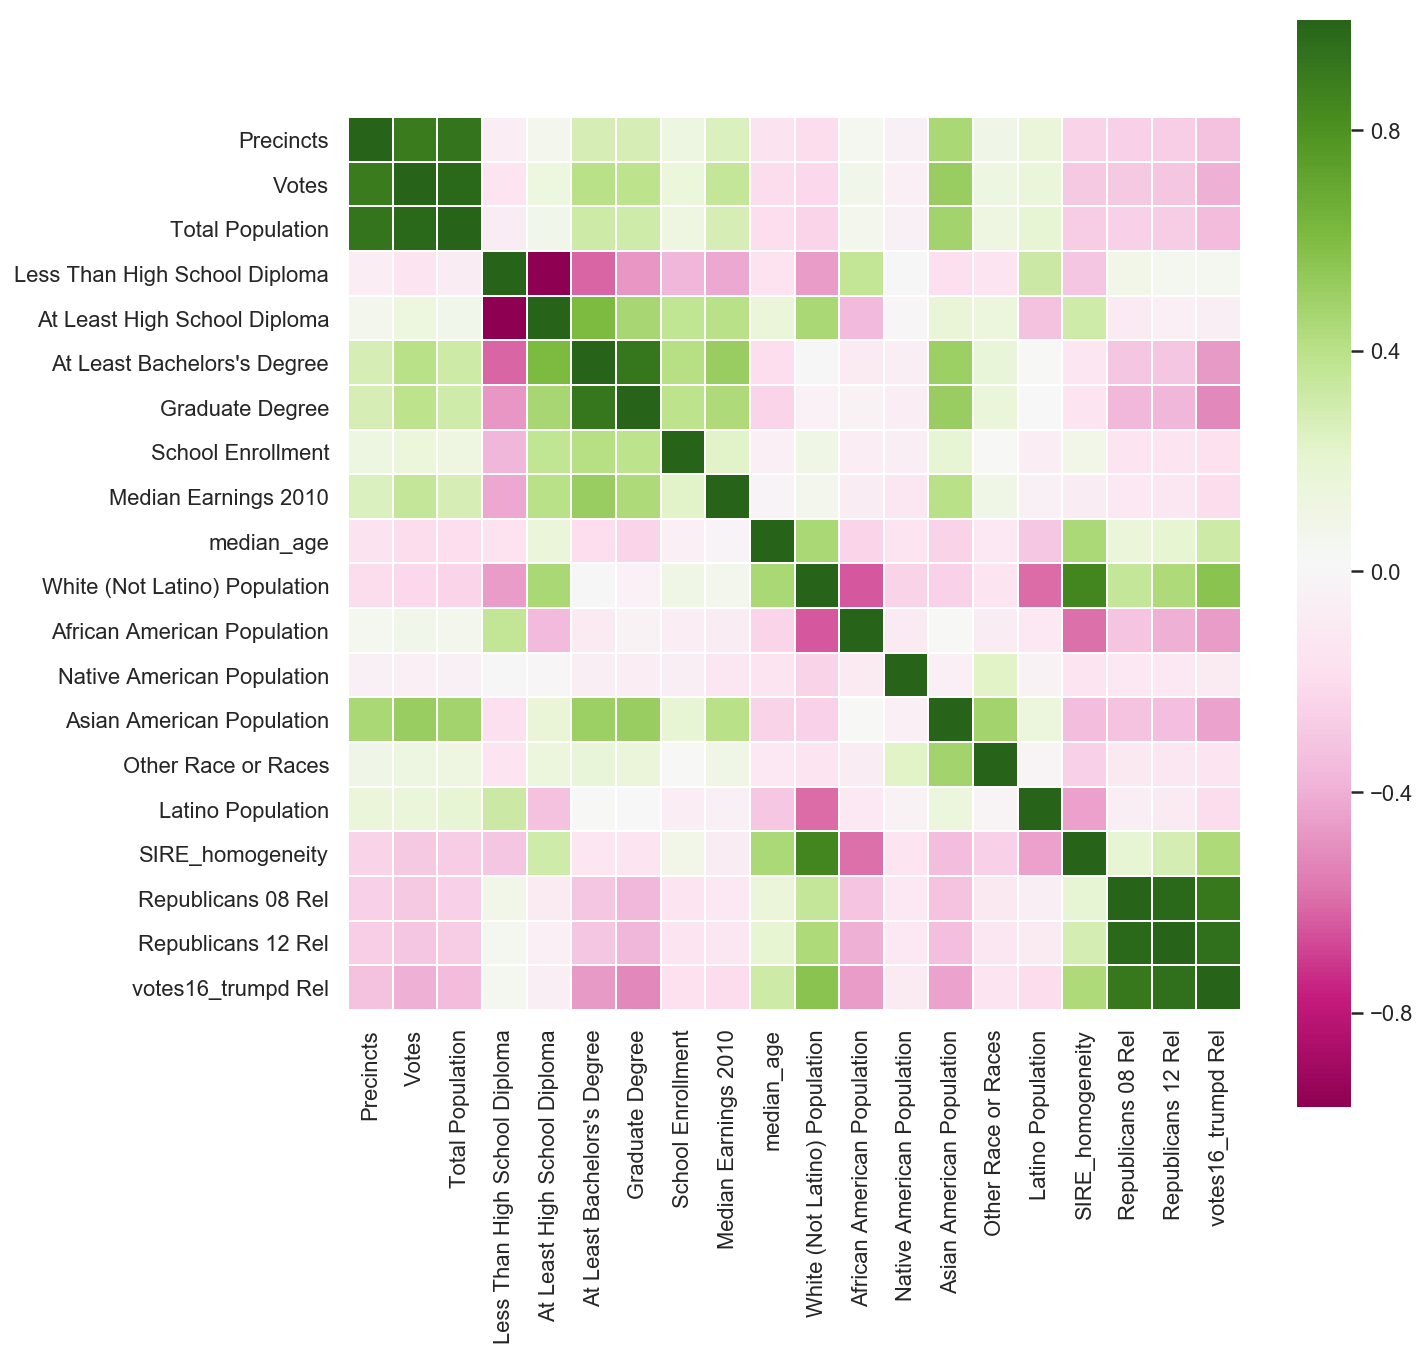

In [26]:
#CORRELATE RACE AND EDUCATIONAL COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR REPUBLICANS
republican_corr_by_race_edu = republican_share_by_county[['Precincts','Votes','Total Population',
                                                'Less Than High School Diploma','At Least High School Diploma',
                                                'At Least Bachelors\'s Degree','Graduate Degree','School Enrollment',
                                                'Median Earnings 2010','median_age','White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity','Republicans 08 Rel','Republicans 12 Rel',
                                                'votes16_trumpd Rel']].corr()
republican_corr_by_race_edu
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH RACE AND EDUCATIONAL COLUMNS
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(republican_corr_by_race_edu,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=republican_corr_by_race_edu.columns,yticklabels=republican_corr_by_race_edu.columns)

As we know that Correlation values range between -1 and 1.And there are two key components of a correlation value:
    magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation
    sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.
So the higher the correlation the stronger the color, in both negative and positive correlations.

What i have learnt from the above heatmap visual  is that "White Population","SIRE_homogeneity" seem to have a moderate correlation with the vote share percentages and the "Less than High School" Diploma and "median age" seem to have a weak postive correlation with the republicans.

Also I found that the African American, Asian American and Other races were having a negative correlation. Similarly with education Bachelors degree and Graduates have a negative correlation with the votes.

A closer look at the data also shows that there is a strong correlation between "SIRE", "median age","At least High School" and the white population while the "Asian Americans" who dont approve of Republicans seem to have a strong relationship with "Bachelors" and "Graduate" degrees.

So it looks like RACE, Education, Age seem to have a great influence on the who wins and loses part of the election.

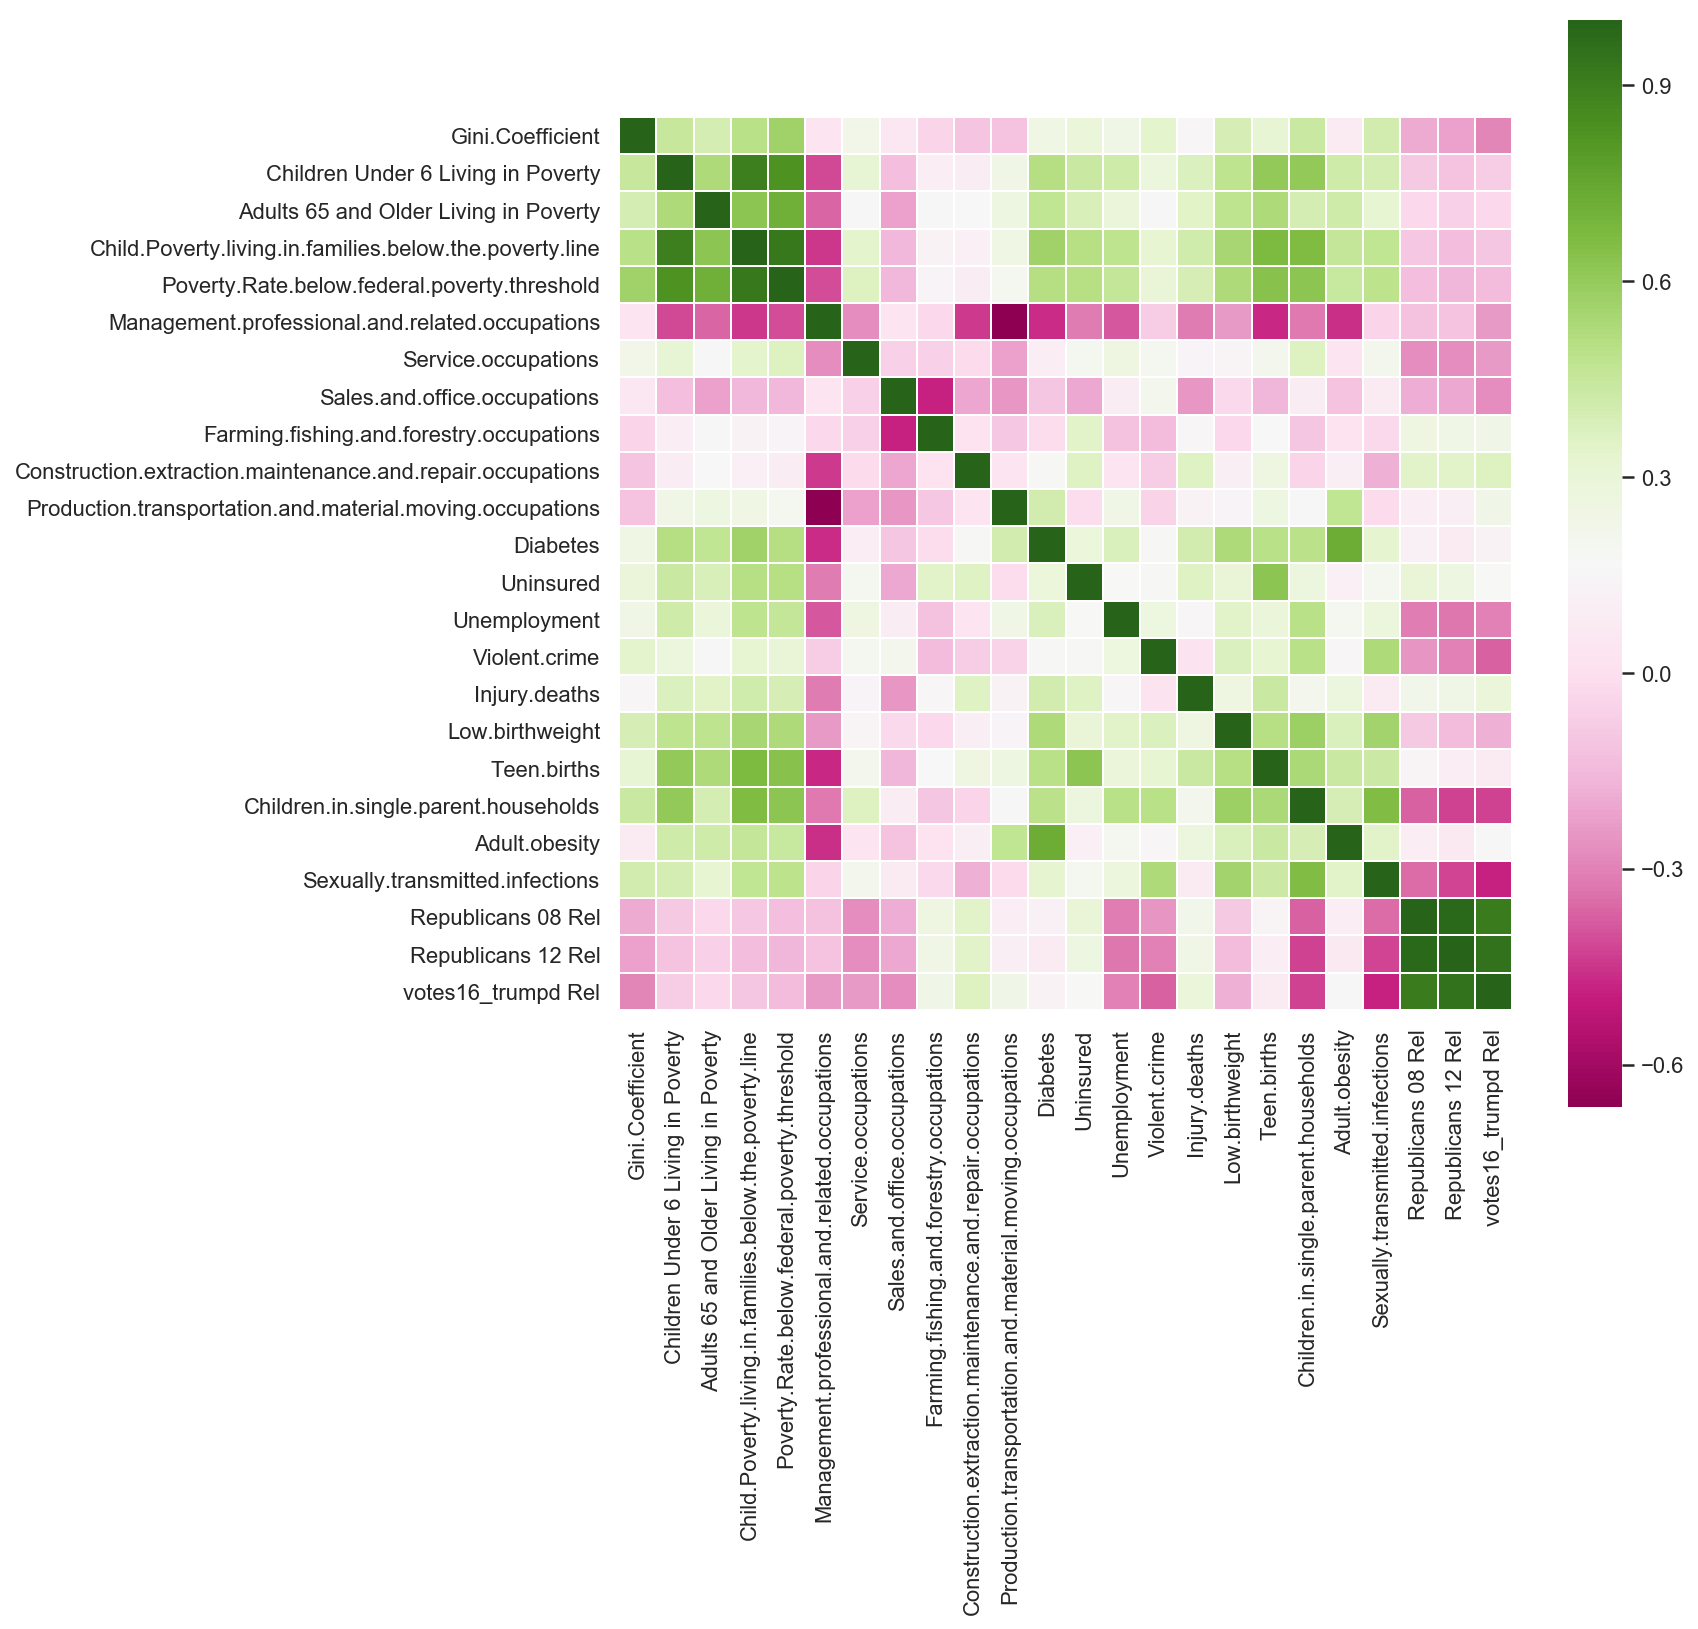

In [27]:
#CORRELATE POVERTY, WORK RELATED METRICS, HEALTH,CRIME AND REMAINING COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR REPUBLICANS
republican_corr_by_work_poverty = republican_share_by_county[['Gini.Coefficient','Children Under 6 Living in Poverty',
                                                'Adults 65 and Older Living in Poverty','Child.Poverty.living.in.families.below.the.poverty.line',
                                                'Poverty.Rate.below.federal.poverty.threshold','Management.professional.and.related.occupations',
                                                'Service.occupations','Sales.and.office.occupations','Farming.fishing.and.forestry.occupations',
                                                'Construction.extraction.maintenance.and.repair.occupations',
                                                'Production.transportation.and.material.moving.occupations',
                                                'Diabetes','Uninsured','Unemployment',
                                                'Violent.crime',
                                                'Injury.deaths','Low.birthweight','Teen.births','Children.in.single.parent.households',
                                                'Adult.obesity','Sexually.transmitted.infections','Republicans 08 Rel','Republicans 12 Rel',
                                                'votes16_trumpd Rel']].corr()
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH POVERTY, WORK RELATED METRICS, HEALTH,CRIME AND REMAINING COLUMNS
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(republican_corr_by_work_poverty,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=republican_corr_by_work_poverty.columns,yticklabels=republican_corr_by_work_poverty.columns)

And for the second heatmap is that the columns seemed to have a close to moderate positive correlation, and those are "Farming.fishing.and.forestry.occupations", "Construction.extraction.maintenance.and.repair.occupations", "Uninsured". And there are some with very weak correlations, where they are closer to the magnitude of 0 like "Farming.fishing.and.forestry.occupations", "Diabetes","Injury.deaths", "Adult.obesity" and "Teen.births".

It looks like none of the economic factors seem to have a very good relationship with the republican vote shares and has a lot of negative correlations. So it looks like mostly the republicans dont seem to be working on these areas to improve. This is the same for all 3 years.

And professions that are more labour oriented seem to be in support of Republicans even though it is moderate, and the more white colored type jobs dont support.And important factors like "Poverty", "Unemployment", "Health" and "Crime" are all negatively correlated which proves it gets worse with "Republicans".

To further look at the numbers of the correlated metrics for each columns, we can run the below code and it will show the specific metrics for each year.

In [28]:
#TO SHOW THE CORR FOR SPECIFIC YEARS WITH THE COLUMNS - RUN THESE COLUMNS INDIVIDUALLY
republican_share_by_county[republican_share_by_county.columns[1:]].corr()['Republicans 08 Rel'][:-3]
republican_share_by_county[republican_share_by_county.columns[1:]].corr()['Republicans 12 Rel'][:-3]
republican_share_by_county[republican_share_by_county.columns[1:]].corr()['votes16_trumpd Rel'][:-3]

Votes                                                        -0.395186
Total Population                                             -0.351461
Less Than High School Diploma                                 0.060175
At Least High School Diploma                                 -0.055448
At Least Bachelors's Degree                                  -0.466353
Graduate Degree                                              -0.519086
School Enrollment                                            -0.174852
Median Earnings 2010                                         -0.196164
median_age                                                    0.321997
White (Not Latino) Population                                 0.567906
African American Population                                  -0.461454
Native American Population                                   -0.088183
Asian American Population                                    -0.433294
Other Race or Races                                          -0.146393
Latino

The below is a consolidated heatmap to show the relationship for only the positively correlated values. 
So now it shows a much closer view of the relationship

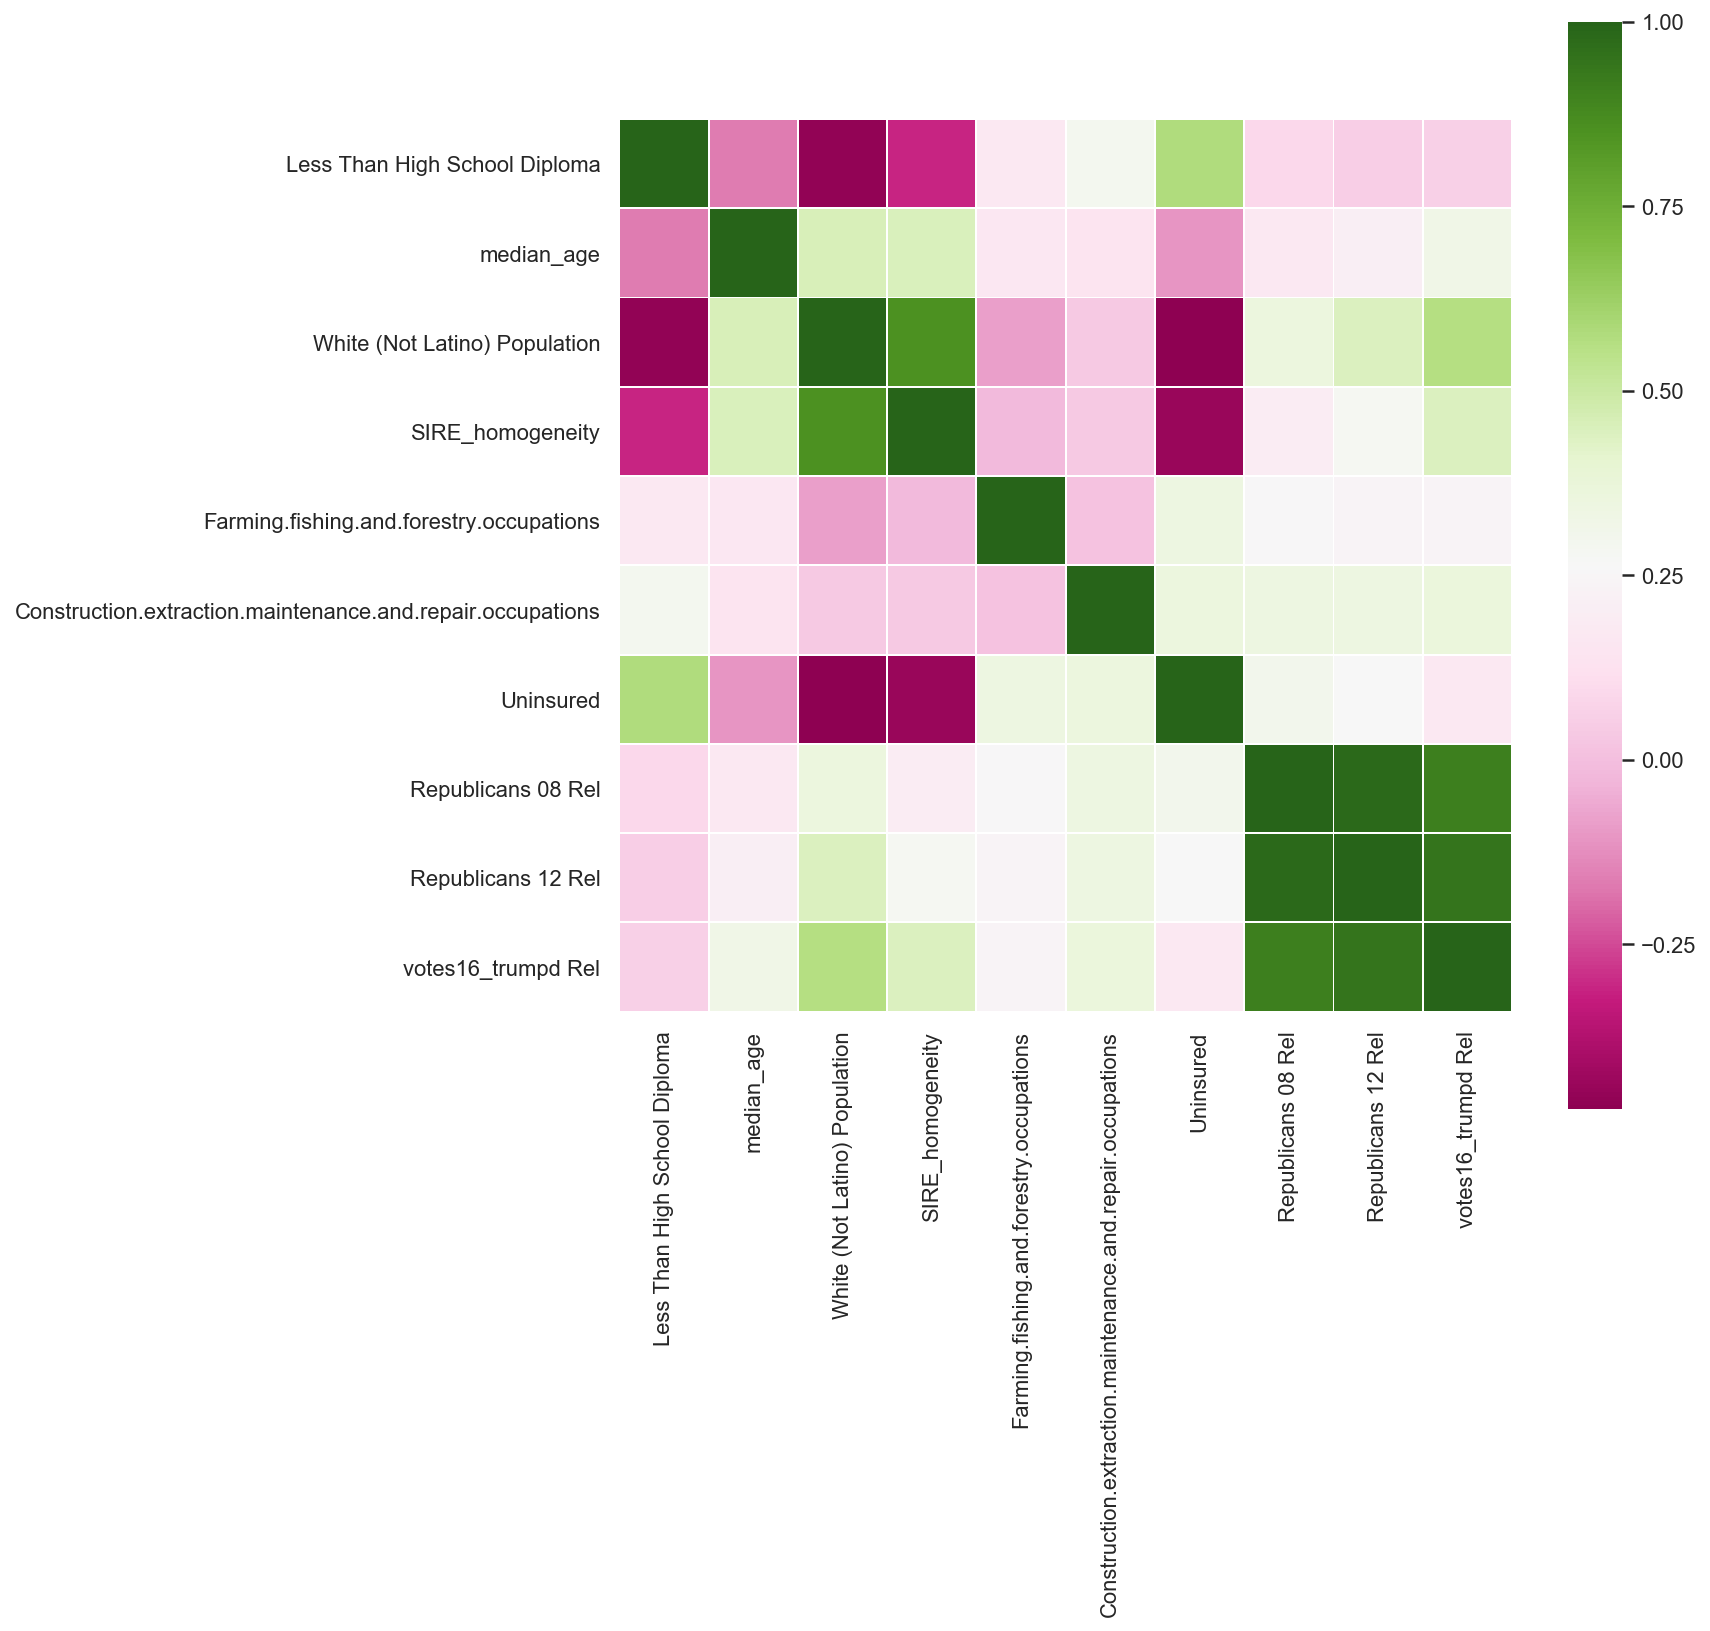

In [29]:
#CORRELATE THE IDENTIFIED POSTIVELY CORRELATED COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR REPUBLICANS
republican_corr_positive = republican_share_by_county[['Less Than High School Diploma','median_age','White (Not Latino) Population',
                                                            'SIRE_homogeneity', 'Farming.fishing.and.forestry.occupations', 
                                                            'Construction.extraction.maintenance.and.repair.occupations', 'Uninsured',
                                                            'Republicans 08 Rel','Republicans 12 Rel',
                                                            'votes16_trumpd Rel' ]].corr()
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH POVERTY, WORK RELATED METRICS, HEALTH,CRIME AND REMAINING COLUMNS
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(republican_corr_positive,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=republican_corr_positive.columns,yticklabels=republican_corr_positive.columns)

Now what i have been able to say from the above visuals and numbers is if there is a correlation between the vote share columns and the other columns. And from what i can see there are not many columns which are strongly correlated, atleast >0.50, except for the "White" Race column which was closer, all the other's were <0.50 and were closer the the 0th value. The Correlation Coefficient tells me the strength of the x,y and if there is a linear relationship either in a positive or negative way.

To find out if the columns which i think are positively correlated are significantly strong enough to use to model the relationship in the population.But as i have 40 data columns and due to my time constraint i have stuck with only the columns that i found ok to use for this test.

So i ran some statistical significance tests for the correlation coefficients to decide whether it is significant(not close to zero) or not significant(it is closer to zero). The below is the pearson correlation from statsmodel and I have split it into blocks for each of the elections years.

Also i will be running these tests for the weak positive correlations too so i am not missing something. Also i will be using the p-value to determine the significance.

In [30]:
#FUNCTION TO VALIDATE THE COV,CORR, T_VALUE AND P_VALUE
def electiontest(x,y):
    cov = np.sum((x - np.mean(x)) * (y - np.mean(y)))/(len(x)-1)
    corr = cov/np.sqrt((np.sum((x - np.mean(x))**2))/(len(x)-1)*np.sum(((y - np.mean(y))**2))/(len(y)-1))
    tval = corr * np.sqrt((len(x)-2)/(1- corr **2))
    p = stats.t.sf(tval, len(x)-2)*2  # two tailed!
    return tval,p

In [31]:
#ELECTION YEAR 2008 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR CORRELATED COLUMNS WITH REPUBLICANS
republicancorrcolumns = ['Less Than High School Diploma','median_age','White (Not Latino) Population','SIRE_homogeneity',
                        'Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations',
                        'Uninsured','Production.transportation.and.material.moving.occupations','Diabetes','Injury.deaths',
                        'Teen.births','Adult.obesity']

for index in republicancorrcolumns:
    x = np.array(republican_share_by_county[index])
    y = np.array(republican_share_by_county[['Republicans 08 Rel']])
    print("Print T and P Value FOR 2008",electiontest(x.ravel(),y.ravel()))
    print(stats.pearsonr(x.ravel(),y.ravel()))
    x =[]
    y = []

Print T and P Value FOR 2008 (4.923094021776068, 8.962997653482571e-07)
(0.08797923270839599, 8.962997653481126e-07)
Print T and P Value FOR 2008 (9.430394844221238, 7.736660830198455e-21)
(0.1668134590666275, 7.736660830198746e-21)
Print T and P Value FOR 2008 (21.256262000331738, 9.989235146853491e-94)
(0.3563143833705595, 9.989235146853313e-94)
Print T and P Value FOR 2008 (10.876151386120112, 4.57469061462926e-27)
(0.19150971672215447, 4.574690614629559e-27)
Print T and P Value FOR 2008 (14.56755765570337, 1.4954358123956287e-46)
(0.252853596975678, 1.495435812395574e-46)
Print T and P Value FOR 2008 (20.450543704717962, 2.600281992420184e-87)
(0.3444383136277913, 2.600281992420482e-87)
Print T and P Value FOR 2008 (17.806868968841865, 1.283340153588805e-67)
(0.3043093671594713, 1.2833401535887978e-67)
Print T and P Value FOR 2008 (5.09780436243971, 3.641870215461428e-07)
(0.09107597431870357, 3.6418702154612674e-07)
Print T and P Value FOR 2008 (6.615201858580062, 4.35243596000557

In [32]:
#ELECTION YEAR 2012 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR CORRELATED COLUMNS WITH REPUBLICANS
republicancorrcolumns = ['Less Than High School Diploma','median_age','White (Not Latino) Population','SIRE_homogeneity',
                        'Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations',
                        'Uninsured','Production.transportation.and.material.moving.occupations','Diabetes','Injury.deaths',
                        'Teen.births','Adult.obesity']

for index in republicancorrcolumns:
    x = np.array(republican_share_by_county[index])
    y = np.array(republican_share_by_county[['Republicans 12 Rel']])
    print("Print T and P Value FOR 2012",electiontest(x.ravel(),y.ravel()))
    print(stats.pearsonr(x.ravel(),y.ravel()))
    x =[]
    y = []

Print T and P Value FOR 2012 (2.8195482220602726, 0.004839603094712226)
(0.05051891294943452, 0.00483960309471266)
Print T and P Value FOR 2012 (11.775869969919762, 2.3872534545238823e-31)
(0.20670012837304205, 2.3872534545242068e-31)
Print T and P Value FOR 2012 (27.704269572859452, 3.64091726543261e-151)
(0.44507928700135935, 3.6409172654331484e-151)
Print T and P Value FOR 2012 (16.644089723922086, 1.1873847948458978e-59)
(0.28611670867336775, 1.1873847948458047e-59)
Print T and P Value FOR 2012 (13.765791224146604, 6.776229359696079e-42)
(0.23975895424548874, 6.776229359695472e-42)
Print T and P Value FOR 2012 (20.68135420544064, 3.946798089492535e-89)
(0.3478576524209207, 3.94679808949218e-89)
Print T and P Value FOR 2012 (15.163392001526294, 3.69384517162896e-50)
(0.26249613585478065, 3.693845171629088e-50)
Print T and P Value FOR 2012 (5.550652230793516, 3.085404082334074e-08)
(0.09909020219900538, 3.0854040823336544e-08)
Print T and P Value FOR 2012 (4.5453324603927205, 5.69416

In [33]:
#ELECTION YEAR 2016 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR CORRELATED COLUMNS WITH REPUBLICANS
republicancorrcolumns = ['Less Than High School Diploma','median_age','White (Not Latino) Population','SIRE_homogeneity',
                        'Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations',
                        'Uninsured','Production.transportation.and.material.moving.occupations','Diabetes','Injury.deaths',
                        'Teen.births','Adult.obesity']

for index in republicancorrcolumns:
    x = np.array(republican_share_by_county[index])
    y = np.array(republican_share_by_county[['votes16_trumpd Rel']])
    print("Print T and P Value FOR 2016",electiontest(x.ravel(),y.ravel()))
    print(stats.pearsonr(x.ravel(),y.ravel()))
    x =[]
    y = []

Print T and P Value FOR 2016 (3.3602616732849215, 0.0007880887638437101)
(0.06017481349173416, 0.0007880887638437516)
Print T and P Value FOR 2016 (18.95795292017866, 6.259254497273638e-76)
(0.3219970205319098, 6.259254497274007e-76)
Print T and P Value FOR 2016 (38.45898549666143, 5.031992022886309e-265)
(0.5679058840207155, 5.031992022886631e-265)
Print T and P Value FOR 2016 (27.618822006644013, 2.4318909172482936e-150)
(0.44397746657291837, 2.431890917248632e-150)
Print T and P Value FOR 2016 (13.609659574840993, 5.139831239849455e-41)
(0.23719342748067634, 5.13983123984962e-41)
Print T and P Value FOR 2016 (21.950088576350765, 2.128841842027096e-99)
(0.36640489115020963, 2.1288418420272243e-99)
Print T and P Value FOR 2016 (9.542135299076248, 2.7308393246851537e-21)
(0.16873407154922704, 2.730839324685203e-21)
Print T and P Value FOR 2016 (13.726714568159558, 1.127325599550472e-41)
(0.23911732251445236, 1.1273255995504281e-41)
Print T and P Value FOR 2016 (7.4393018723911135, 1.30

After running the test for the 3 year election years for only the columns which i thought were highly correlated it looks like all the columns have a lower p-value and the correlation coeeficient is also on the lower end.
And when i ran the tests for the columns with a weak positive correlation it showed the same results where columns have a pvalue less than or closer to 0.

For a pvalue test whenever the p-value < 0.05 we can reject the NULL Hypothesis and consider the Alternate Hypothesis. So looking at the results it seems that whenever the correlation coeeficient are moving towards 1 there is also a very low p-value. And the conclusion is that since we have a p-value <0.05 there is enough evidence that there is a significant linear relationship between x and y and the correlation coeefficient is different from 0.

##### DEMOCRATS DATA

To compare against how democrats are doing i have created the similar correlation heatmaps.

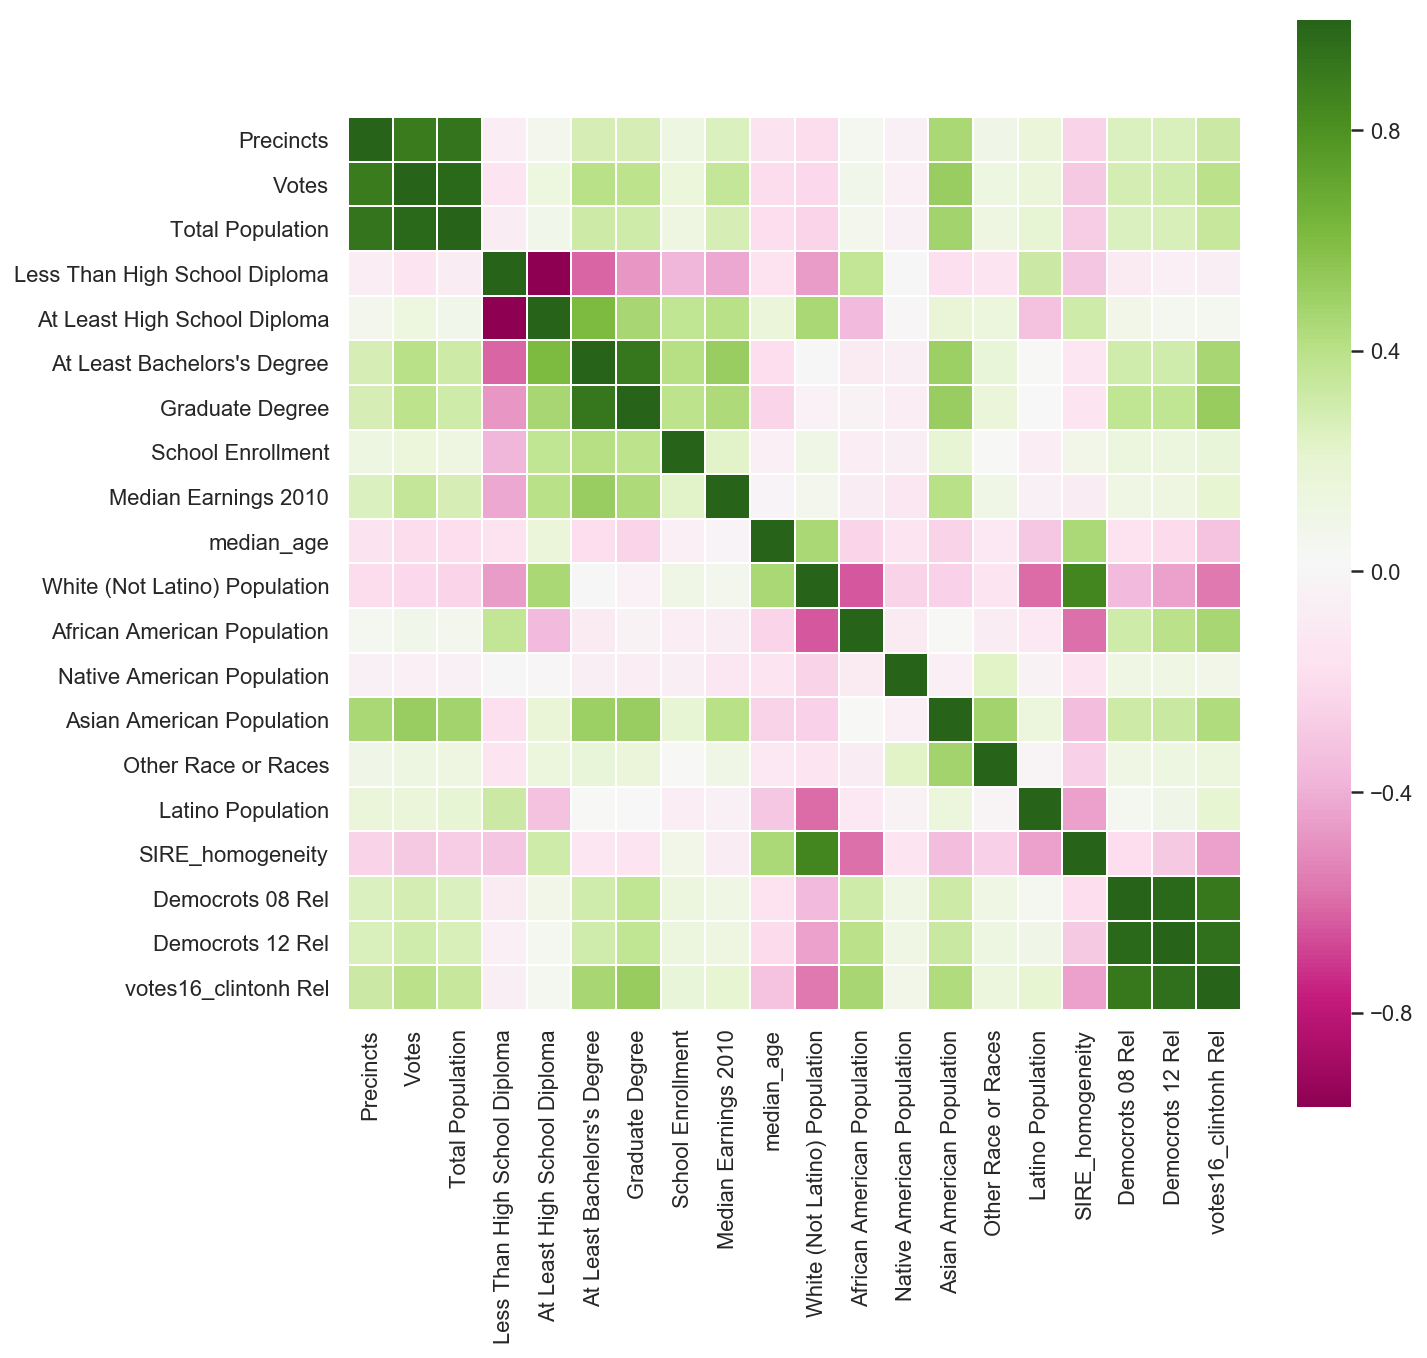

In [34]:
#CORRELATE RACE AND EDUCATIONAL COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR Democrats
democrats_corr_by_race_edu = democrats_share_by_county[['Precincts','Votes','Total Population',
                                                'Less Than High School Diploma','At Least High School Diploma',
                                                'At Least Bachelors\'s Degree','Graduate Degree','School Enrollment',
                                                'Median Earnings 2010','median_age','White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity','Democrots 08 Rel','Democrots 12 Rel',
                                                'votes16_clintonh Rel']].corr()

# PLOT A HEATMAP FOR THE Democrats CORRELATION WITH RACE AND EDUCATIONAL COLUMNS
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(democrats_corr_by_race_edu,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=democrats_corr_by_race_edu.columns,yticklabels=democrats_corr_by_race_edu.columns)

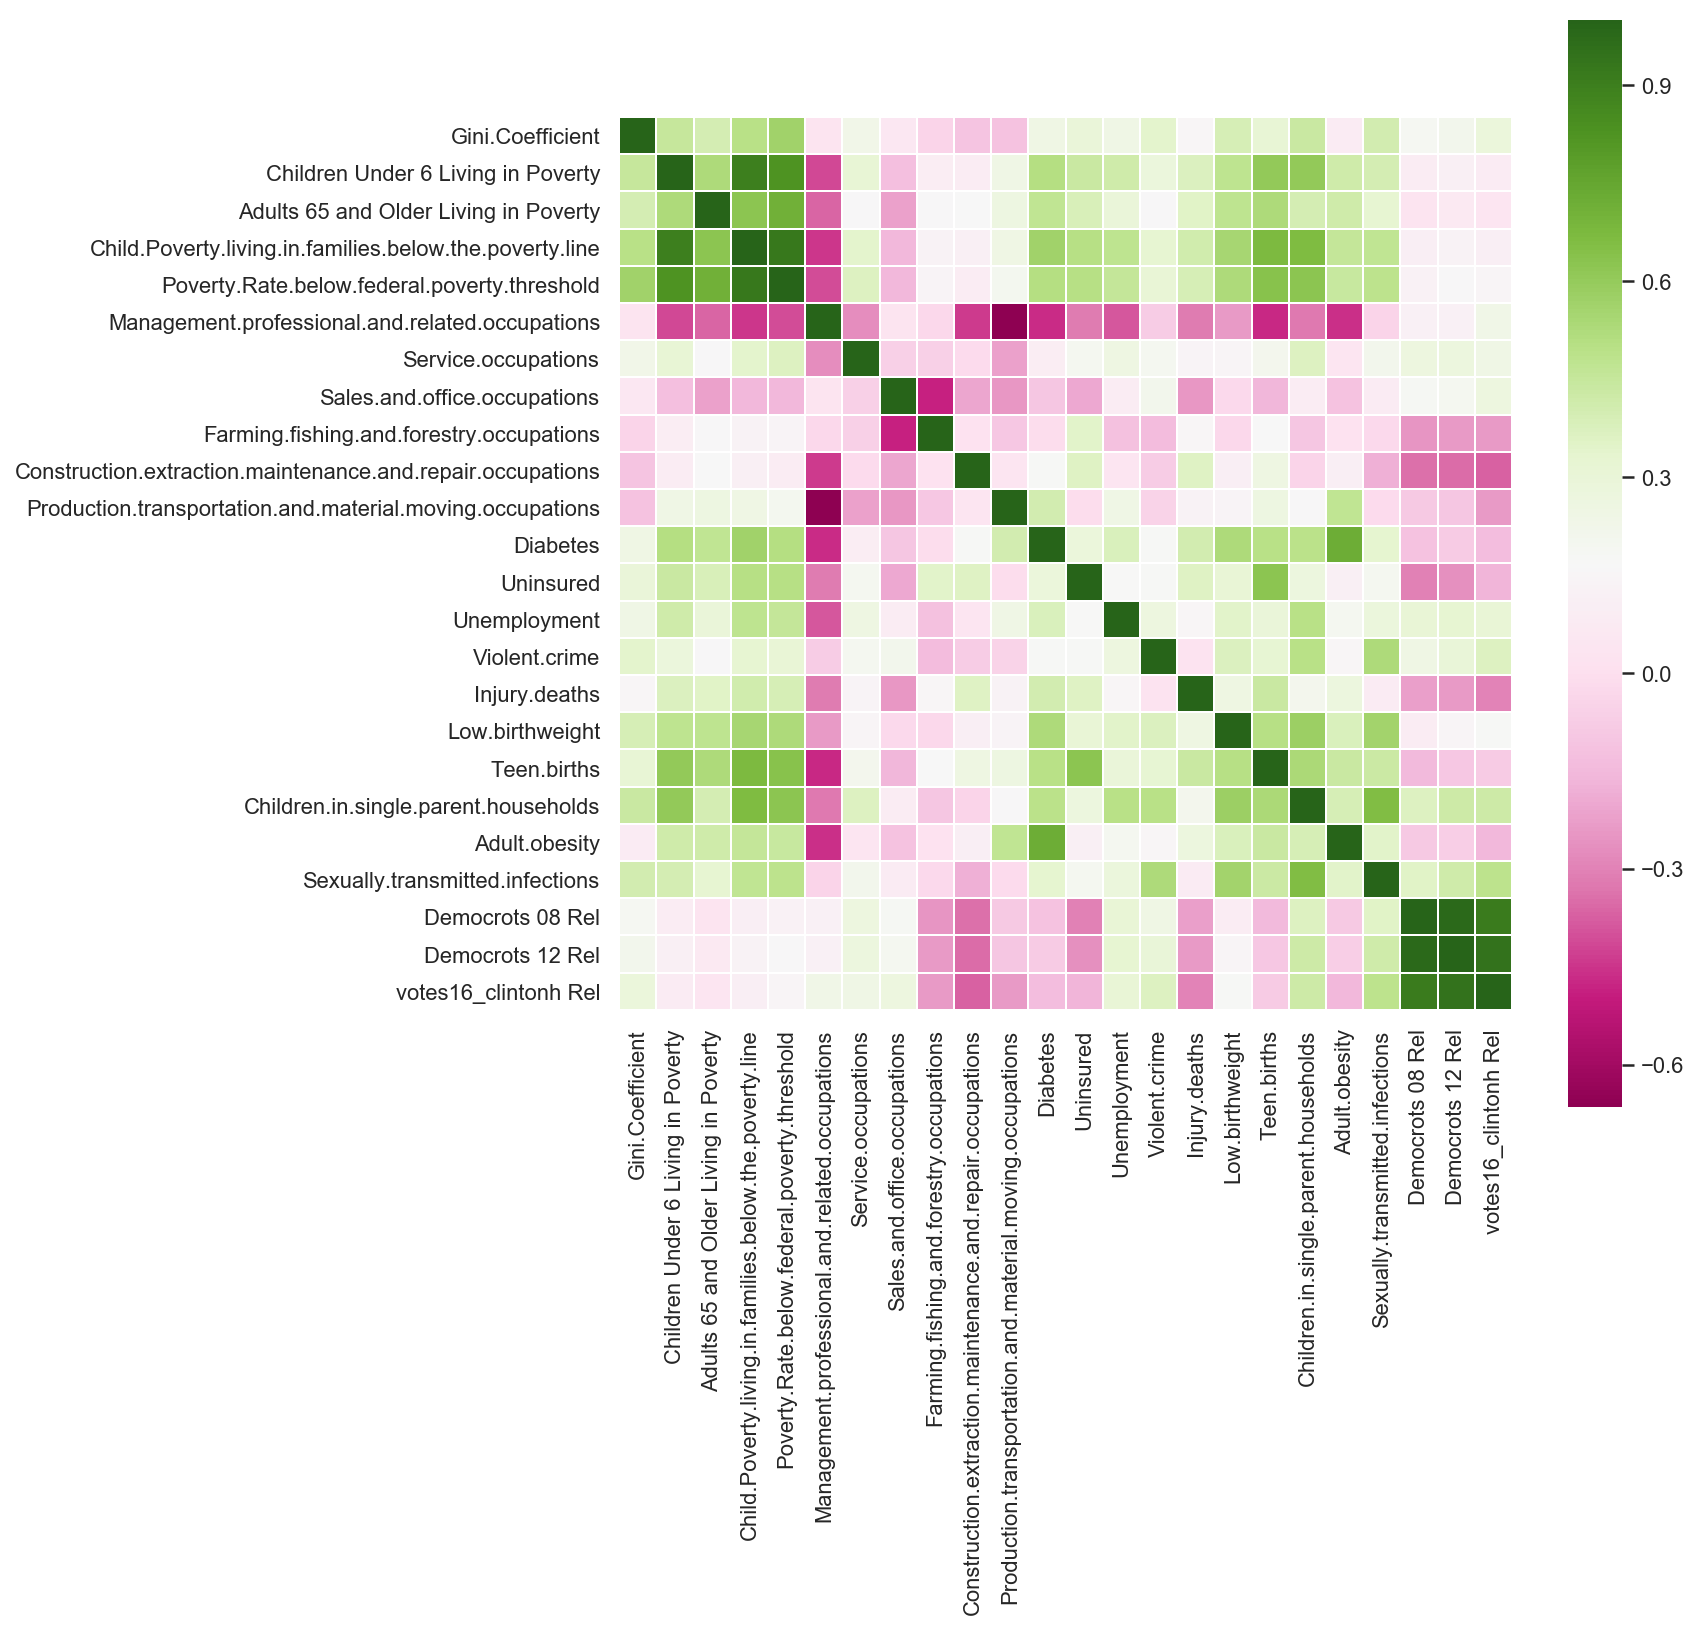

In [35]:
#CORRELATE POVERTY, WORK RELATED METRICS, HEALTH,CRIME AND REMAINING COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR DEMOCRATS
democrats_corr_by_work_poverty = democrats_share_by_county[['Gini.Coefficient','Children Under 6 Living in Poverty',
                                                'Adults 65 and Older Living in Poverty','Child.Poverty.living.in.families.below.the.poverty.line',
                                                'Poverty.Rate.below.federal.poverty.threshold','Management.professional.and.related.occupations',
                                                'Service.occupations','Sales.and.office.occupations','Farming.fishing.and.forestry.occupations',
                                                'Construction.extraction.maintenance.and.repair.occupations',
                                                'Production.transportation.and.material.moving.occupations',
                                                'Diabetes','Uninsured','Unemployment',
                                                'Violent.crime',
                                                'Injury.deaths','Low.birthweight','Teen.births','Children.in.single.parent.households',
                                                'Adult.obesity','Sexually.transmitted.infections','Democrots 08 Rel','Democrots 12 Rel',
                                                'votes16_clintonh Rel']].corr()

# PLOT A HEATMAP FOR THE DEMOCRATS CORRELATION WITH POVERTY, WORK RELATED METRICS, HEALTH,CRIME AND REMAINING COLUMNS
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(democrats_corr_by_work_poverty,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=democrats_corr_by_work_poverty.columns,yticklabels=democrats_corr_by_work_poverty.columns)

In [36]:
#TO SHOW THE CORR FOR SPECIFIC YEARS WITH THE COLUMNS - RUN THESE COLUMNS INDIVIDUALLY - FOR DEMOCRATS
democrats_share_by_county[democrats_share_by_county.columns[1:]].corr()['Democrots 08 Rel'][:-3]
democrats_share_by_county[democrats_share_by_county.columns[1:]].corr()['Democrots 12 Rel'][:-3]
democrats_share_by_county[democrats_share_by_county.columns[1:]].corr()['votes16_clintonh Rel'][:-3]

Precincts                                                     0.329881
Votes                                                         0.395186
Total Population                                              0.351461
Less Than High School Diploma                                -0.060175
At Least High School Diploma                                  0.055448
At Least Bachelors's Degree                                   0.466353
Graduate Degree                                               0.519086
School Enrollment                                             0.174852
Median Earnings 2010                                          0.196164
median_age                                                   -0.321997
White (Not Latino) Population                                -0.567906
African American Population                                   0.461454
Native American Population                                    0.088183
Asian American Population                                     0.433294
Other 

So, to compare the same data against Democrats I created another dataframe and applied the same correlation rules. And when looking at the democrat’s columns the results were the exact opposite of what we saw for Republicans. The data columns that had a positive relationship with Republicans had a negative impact for Democrats and vice versa. That is people who had a "Bachelors degree" or "Graduates" were favouring the Democrats and seemed to have positive relatiobship. Also the "African American" and "Asian Population" were also favouring the Democrats."Median Earnings" also looked better with the democrats when compared to the Republicans. Apart from these "Unemployment","Violent Crime","Management and Service" occupations were having better relationships with the democrats.

And similarly when looking at the negative correlations, the "White population" stood out among the variables,also people who had a "Lesser education" favoured Republicans and had a  negative relationship with democrats. Also people who were working more in the labour areas had a negative relationship with the democrats and favoured Republicans from our earlier analysis.

So, looking into both the results I could see that race, education, age, income and area of work seem to be having a very high relationship in both the parties in a negative and positive way. And this seemed to be consistent across all 3 years of the elections. But something very interesting to notice is that Republicans seem to have a lesser positive relationship and more negative within the features in the overall social/economic factors. So it would be interesting to see if who would win the elections in 2016 after we complete our predictions.

#### CORRELATION BY COUNTY - USING RACE
As i have already mentioned in the previous section that Race does play a very important role when it comes to elections. So below we can see a consolidated of the race and vote share data. I will start with the Republican vote share and then move on to democrats.

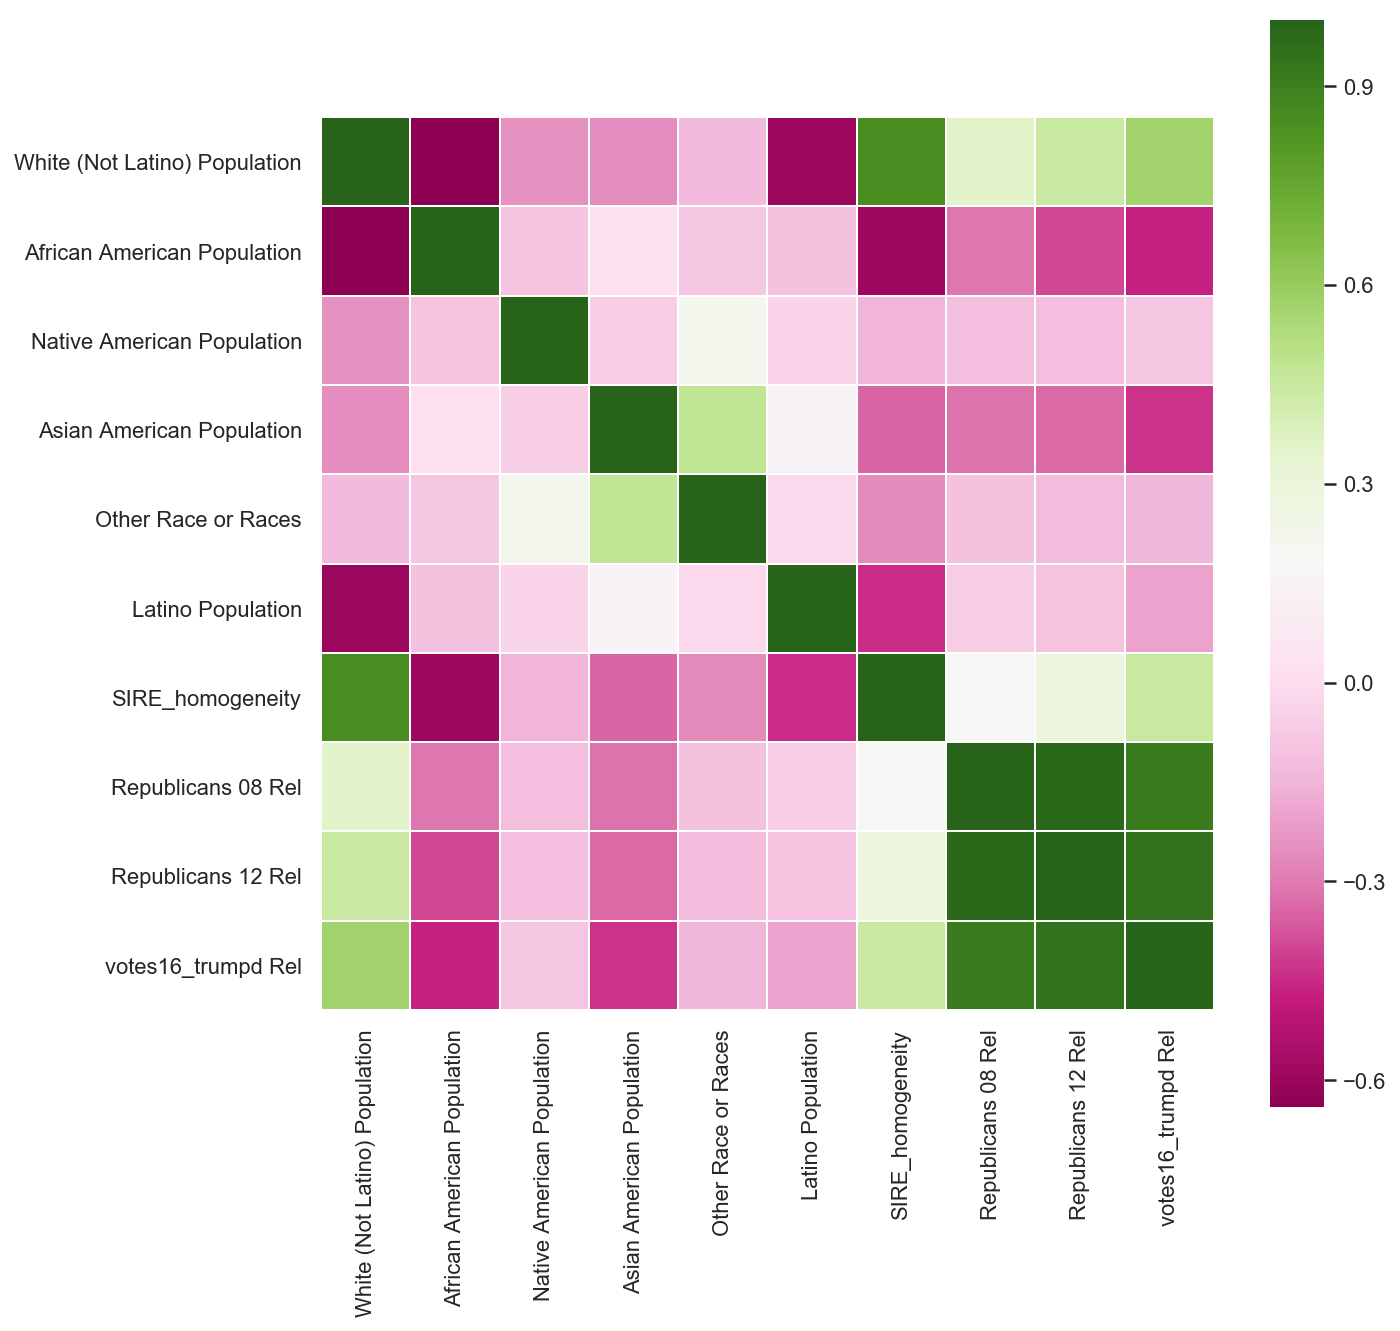

In [37]:
#CORRELATE RACE COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR REPUBLICANS
republican_corr_by_race = republican_share_by_county[['White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity','Republicans 08 Rel','Republicans 12 Rel',
                                                'votes16_trumpd Rel']].corr()
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH RACE ONLY
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(republican_corr_by_race,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=republican_corr_by_race.columns,yticklabels=republican_corr_by_race.columns)

From the above heatmap we can that "White Population" and "Sire_homogeniaty" have a positive relationship with the votes, although it does not look very strong, there seems to be a moderate positive relationship. At the same time "African American" and "Asian American" are the first to have a moderate negative relationship with the republicans, the other races follow behind bu are at a much weaker relationship and are closer to 0.

Also something to notice is the White Population does not seem to get along with the other races and trends towards to a strong negative correlation especially with "Latinos" and "African American" population.

I will be running the significance tests again on the race columns and the vote share columns to validate that the columns "White Population" and "Sire_homogeniaty" are actually significantly correlated.

In [38]:
#ELECTION YEAR 2008 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH REPUBLICANS
republicancolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in republicancolumns:
    a = np.array(republican_share_by_county[index])
    b = np.array(republican_share_by_county[['Republicans 08 Rel']])
    print("Print T and P Value FOR 2008",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2008 (21.256262000331738, 9.989235146853491e-94)
(0.3563143833705595, 9.989235146853313e-94)
Print T and P Value FOR 2008 (-18.376395877459064, 2.0)
(-0.3131014974191159, 1.116308261199317e-71)
Print T and P Value FOR 2008 (-6.327773073089243, 1.9999999997155413)
(-0.11279756265452777, 2.844585559909144e-10)
Print T and P Value FOR 2008 (-18.812186300848733, 2.0)
(-0.3197752512777359, 7.446276790826195e-75)
Print T and P Value FOR 2008 (-6.019650606876927, 1.999999998047699)
(-0.10736995629412159, 1.9523009761328514e-09)
Print T and P Value FOR 2008 (-3.378180337512051, 1.9992613412954927)
(-0.06049452571973407, 0.0007386587045073944)
Print T and P Value FOR 2008 (10.876151386120112, 4.57469061462926e-27)
(0.19150971672215447, 4.574690614629559e-27)


In [39]:
#ELECTION YEAR 2012 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH REPUBLICANS
republicancolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in republicancolumns:
    a = np.array(republican_share_by_county[index])
    b = np.array(republican_share_by_county[['Republicans 12 Rel']])
    print("Print T and P Value FOR 2012",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2012 (27.704269572859452, 3.64091726543261e-151)
(0.44507928700135935, 3.6409172654331484e-151)
Print T and P Value FOR 2012 (-23.928054232730073, 2.0)
(-0.3944663167353415, 2.809961768415365e-116)
Print T and P Value FOR 2012 (-6.338603896008484, 1.9999999997345954)
(-0.11298816795431167, 2.654047365317108e-10)
Print T and P Value FOR 2012 (-19.80635241677312, 2.0)
(-0.3348223462385091, 2.563420091916608e-82)
Print T and P Value FOR 2012 (-6.8926732556953905, 1.9999999999933966)
(-0.12272182635096665, 6.6032334649376975e-12)
Print T and P Value FOR 2012 (-5.456441801106077, 1.9999999476093604)
(-0.09742445805431868, 5.239063958255014e-08)
Print T and P Value FOR 2012 (16.644089723922086, 1.1873847948458978e-59)
(0.28611670867336775, 1.1873847948458047e-59)


In [40]:
#ELECTION YEAR 2016 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH REPUBLICANS
republicancolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in republicancolumns:
    a = np.array(republican_share_by_county[index])
    b = np.array(republican_share_by_county[['votes16_trumpd Rel']])
    print("Print T and P Value FOR 2016",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2016 (38.45898549666143, 5.031992022886309e-265)
(0.5679058840207155, 5.031992022886631e-265)
Print T and P Value FOR 2016 (-28.993156079969683, 2.0)
(-0.4614543590787798, 8.692900249308267e-164)
Print T and P Value FOR 2016 (-4.934582311891659, 1.9999991544911395)
(-0.08818294207197806, 8.455088606156192e-07)
Print T and P Value FOR 2016 (-26.79829646217463, 2.0)
(-0.43329435028433777, 1.6839065212651563e-142)
Print T and P Value FOR 2016 (-8.248902948457706, 1.9999999999999998)
(-0.14639333094346693, 2.3327685190817815e-16)
Print T and P Value FOR 2016 (-11.212693969256232, 2.0)
(-0.19720849613637312, 1.2433440000819917e-28)
Print T and P Value FOR 2016 (27.618822006644013, 2.4318909172482936e-150)
(0.44397746657291837, 2.431890917248632e-150)


Similar to earlier tests that I did these columns also returned lower p value with high correlation coefficients. Please ignore the p-values for the negative correlations, as the formatting of the p values is making the negative numbers look like they have very high p-values which is not true.

From this i can conclude that the RACE columns are highly correlated with the Republican Vote Share columns.

Next moving on to analyze the Vote Share relationship for democrats and the RACE columns

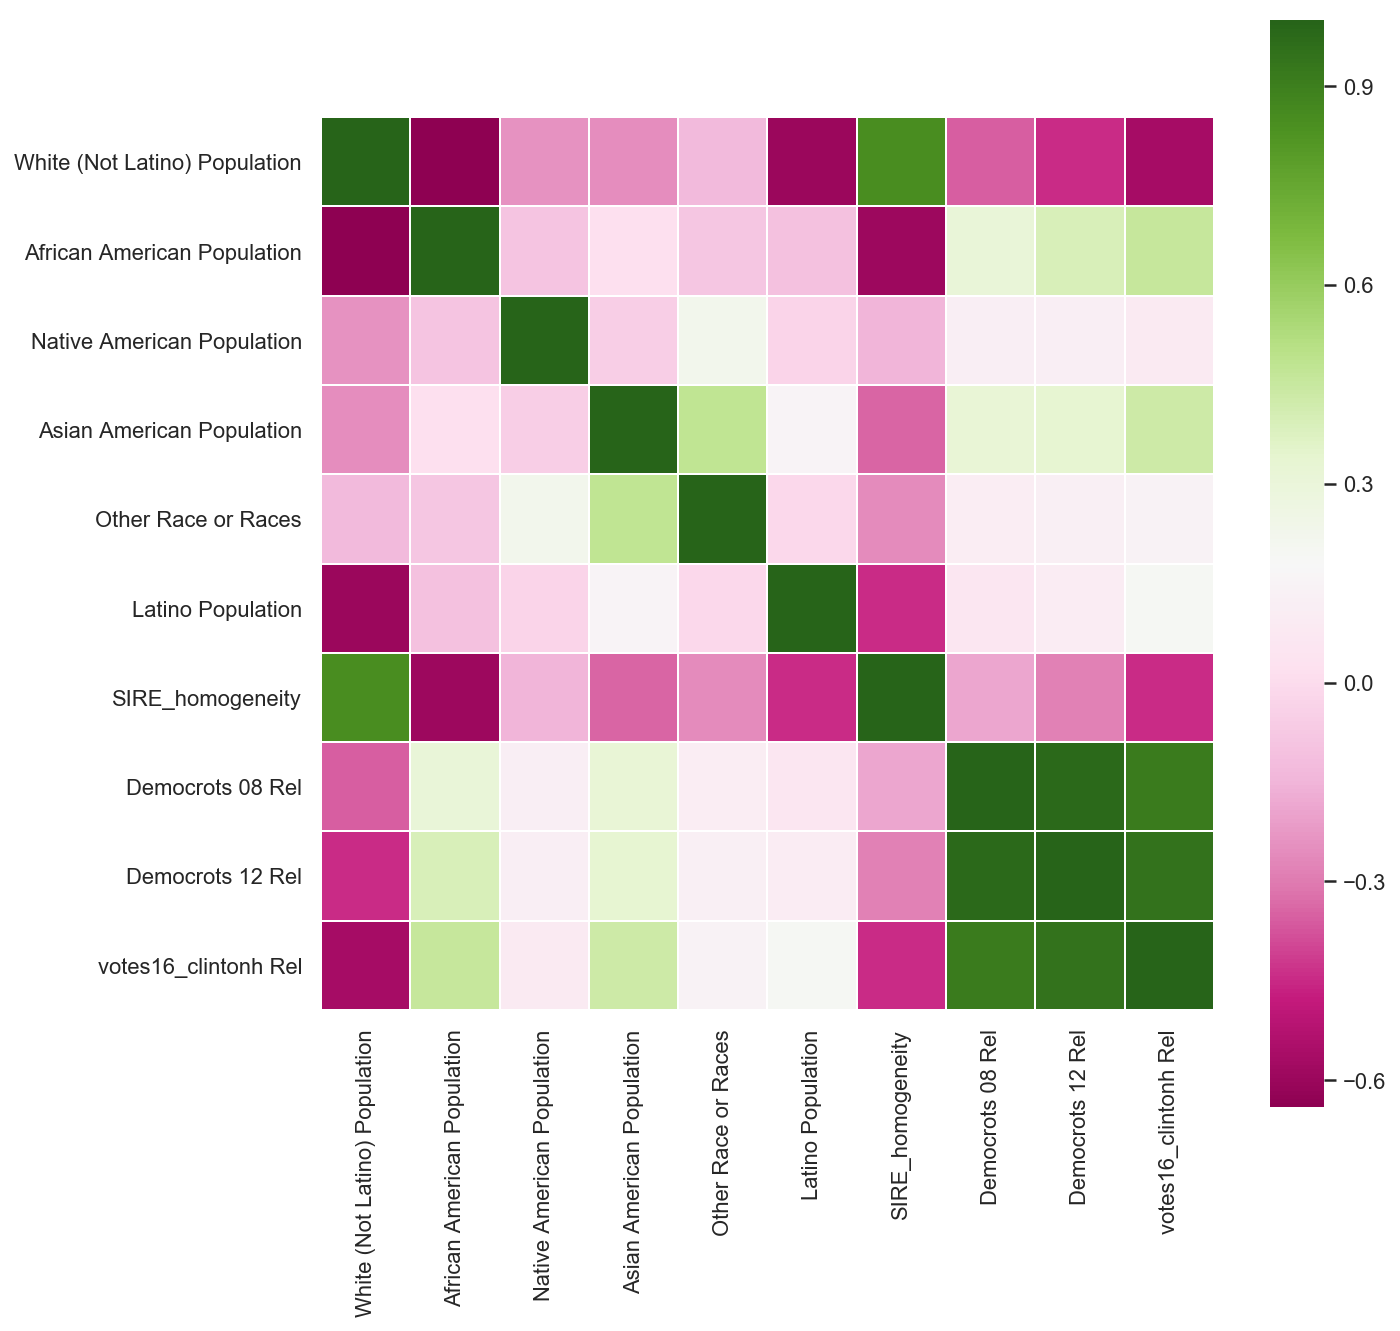

In [41]:
#CORRELATE RACE COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR DEMOCRATS
democrats_corr_by_race = democrats_share_by_county[['White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity','Democrots 08 Rel','Democrots 12 Rel',
                                                'votes16_clintonh Rel']].corr()
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH RACE ONLY
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(democrats_corr_by_race,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=democrats_corr_by_race.columns,yticklabels=democrats_corr_by_race.columns)

The above clearly states the opposite for democrats where the white population is negatively correlated and the other remaining races are more positively correlated. Especially, democrats continue to get more support from African American and Asian American population. Something interesting to notice is that during the 2008 and 2012 election the numbers are slightly lesser when compared to the 2016 election for the African American population, especially that is the period when the country had its first African American President. And also, the negative correlation for white population was lesser in 2008 and 2012 when compared to 2016. 

To validate the above i will go ahead and execute the below test to understand the significance of this correlation.

In [42]:
#ELECTION YEAR 2008 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH DEMOCRATS
democratscolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in democratscolumns:
    a = np.array(democrats_share_by_county[index])
    b = np.array(democrats_share_by_county[['Democrots 08 Rel']])
    print("Print T and P Value FOR 2008",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2008 (-21.256262000331738, 2.0)
(-0.35631438337055943, 9.989235146853313e-94)
Print T and P Value FOR 2008 (18.376395877459064, 1.1163082611992547e-71)
(0.31310149741911586, 1.116308261199317e-71)
Print T and P Value FOR 2008 (6.3277730730892445, 2.844585559908979e-10)
(0.11279756265452777, 2.844585559909144e-10)
Print T and P Value FOR 2008 (18.812186300848737, 7.446276790826551e-75)
(0.3197752512777359, 7.446276790826195e-75)
Print T and P Value FOR 2008 (6.019650606876927, 1.9523009761326947e-09)
(0.10736995629412156, 1.9523009761328514e-09)
Print T and P Value FOR 2008 (3.378180337512049, 0.0007386587045074588)
(0.06049452571973403, 0.0007386587045073944)
Print T and P Value FOR 2008 (-10.87615138612011, 2.0)
(-0.19150971672215444, 4.574690614629559e-27)


In [43]:
#ELECTION YEAR 2012 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH DEMOCRATS
democratscolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in democratscolumns:
    a = np.array(democrats_share_by_county[index])
    b = np.array(democrats_share_by_county[['votes16_clintonh Rel']])
    print("Print T and P Value FOR 2012",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2012 (-38.45898549666143, 2.0)
(-0.5679058840207155, 5.031992022886631e-265)
Print T and P Value FOR 2012 (28.99315607996969, 8.692900249305281e-164)
(0.4614543590787799, 8.692900249306785e-164)
Print T and P Value FOR 2012 (4.934582311891659, 8.455088606156529e-07)
(0.08818294207197806, 8.455088606156192e-07)
Print T and P Value FOR 2012 (26.79829646217463, 1.6839065212647863e-142)
(0.43329435028433777, 1.6839065212651563e-142)
Print T and P Value FOR 2012 (8.248902948457706, 2.33276851908147e-16)
(0.14639333094346693, 2.3327685190817815e-16)
Print T and P Value FOR 2012 (11.21269396925623, 1.2433440000820684e-28)
(0.1972084961363731, 1.2433440000819917e-28)
Print T and P Value FOR 2012 (-27.618822006644013, 2.0)
(-0.44397746657291837, 2.431890917248632e-150)


In [44]:
#ELECTION YEAR 2016 - RUNNING STATISTICAL SIGNIFICANT TESTS FOR RACE DATA WITH DEMOCRATS
democratscolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity']
for index in democratscolumns:
    a = np.array(democrats_share_by_county[index])
    b = np.array(democrats_share_by_county[['votes16_clintonh Rel']])
    print("Print T and P Value FOR 2016",electiontest(a.ravel(),b.ravel()))
    print(stats.pearsonr(a.ravel(),b.ravel()))
    a =[]
    b = []

Print T and P Value FOR 2016 (-38.45898549666143, 2.0)
(-0.5679058840207155, 5.031992022886631e-265)
Print T and P Value FOR 2016 (28.99315607996969, 8.692900249305281e-164)
(0.4614543590787799, 8.692900249306785e-164)
Print T and P Value FOR 2016 (4.934582311891659, 8.455088606156529e-07)
(0.08818294207197806, 8.455088606156192e-07)
Print T and P Value FOR 2016 (26.79829646217463, 1.6839065212647863e-142)
(0.43329435028433777, 1.6839065212651563e-142)
Print T and P Value FOR 2016 (8.248902948457706, 2.33276851908147e-16)
(0.14639333094346693, 2.3327685190817815e-16)
Print T and P Value FOR 2016 (11.21269396925623, 1.2433440000820684e-28)
(0.1972084961363731, 1.2433440000819917e-28)
Print T and P Value FOR 2016 (-27.618822006644013, 2.0)
(-0.44397746657291837, 2.431890917248632e-150)


So the above test confirms that these columns with p<0.05 are significantly correlated with the democratic votes. What I learnt from the above visuals and the tests is that race does play a role in the votes and for democrats the "African American" and "Asian American" data is always highly correlated, and it is followed by the remaining races support.

So we can say that race plays an important role in who is chosen where the "White" supports the Republicans and the remaining races consistently support the Democrats in all 3 years. As we notes earlier, the 2008 and 2012 showed a slightly lesser "African American" and "Asian American" support when compared to 2016 data.

#### CORRELATION BY STATE - UNDERSTANDING RACE
Until now i was trying to understand the correlation between the values using the county data, but i also wanted to see if this is applicable when aggregated for the state level data.

For this we need to aggregate the vote share by states as the current data is by county, so i am going ahead and creating another 2 dataframes so that I can work only with the Race Columns. And also calculate the Weights of each county by the population of the county.

In [45]:
#CALCULATE THE WEIGHTS FIRST FOR EACH COUNTY BY THE POPULATION
total = votes_census_by_county.groupby('State')['Total Population'].transform('sum')
votes_census_by_county['County_Weights'] = votes_census_by_county['Total Population']/total


In [46]:
votes_census_by_county.drop(['Total Population'],axis=1)

Fips           State  ST                County  Precincts     Votes  \
0      5043        Arkansas  AR           Drew County       17.0    6590.0   
1      5087        Arkansas  AR        Madison County       20.0    6829.0   
2     13159         Georgia  GA         Jasper County        3.0    6016.0   
3      8037        Colorado  CO          Eagle County       30.0   22611.0   
4     13091         Georgia  GA          Dodge County       16.0    6995.0   
5      6025      California  CA       Imperial County      189.0   41751.0   
6     13059         Georgia  GA         Clarke County       24.0   44221.0   
7      8125        Colorado  CO           Yuma County       15.0    4664.0   
8      8099        Colorado  CO        Prowers County       14.0    4978.0   
9     13045         Georgia  GA        Carroll County       30.0   43744.0   
10     6075      California  CA  San Francisco County      597.0  365295.0   
11    13317         Georgia  GA         Wilkes County        7.0    4470.0   
12    17119        Illinois  IL        Madison County      225.0  127902.0   
13    19061            Iowa  IA        Dubuque County       36.0   49037.0   
14    17005        Illinois  IL           Bond County       25.0    7462.0   
15    19157            Iowa  IA      Poweshiek County       11.0    9693.0   
16    19169            Iowa  IA          Story County       44.0   48910.0   
17    19087            Iowa  IA          Henry County       10.0    9286.0   
18    17155        Illinois  IL         Putnam County        8.0    3076.0   
19    13231         Georgia  GA           Pike County        8.0    8675.0   
20    21033        Kentucky  KY       Caldwell County       13.0    5975.0   
21    21067        Kentucky  KY        Fayette County      291.0  136239.0   
22    18005         Indiana  IN    Bartholomew County       68.0   32389.0   
23    21039        Kentucky  KY       Carlisle County        6.0    2601.0   
24    20103          Kansas  KS    Leavenworth County       43.0   29676.0   
25    17169        Illinois  IL       Schuyler County       17.0    3792.0   
26    18047         Indiana  IN       Franklin County       23.0   10990.0   
27    26015        Michigan  MI          Barry County       27.0   30265.0   
28    27017       Minnesota  MN        Carlton County       38.0   18059.0   
29    27029       Minnesota  MN     Clearwater County       29.0    4225.0   
...     ...             ...  ..                   ...        ...       ...   
3079  53009      Washington  WA        Clallam County       24.0   32985.0   
3080  55001       Wisconsin  WI          Adams County       20.0   10107.0   
3081  55127       Wisconsin  WI       Walworth County       42.0   50570.0   
3082  54069   West Virginia  WV           Ohio County       36.0   17819.0   
3083  54101   West Virginia  WV        Webster County       14.0    2955.0   
3084  36097        New York  NY       Schuyler County       19.0    8423.0   
3085  39153            Ohio  OH         Summit County      420.0  249937.0   
3086  39167            Ohio  OH     Washington County       50.0   28992.0   
3087  48019           Texas  TX        Bandera County       11.0   10213.0   
3088  48059           Texas  TX       Callahan County        7.0    5556.0   
3089  48221           Texas  TX           Hood County       11.0   26120.0   
3090  48279           Texas  TX           Lamb County       12.0    3905.0   
3091  48457           Texas  TX          Tyler County       18.0    7969.0   
3092  48495           Texas  TX        Winkler County        6.0    1873.0   
3093  51025        Virginia  VA      Brunswick County       14.0    7645.0   
3094  37101  North Carolina  NC       Johnston County       36.0   84553.0   
3095  37103  North Carolina  NC          Jones County        7.0    5039.0   
3096  38073    North Dakota  ND         Ransom County        4.0    2317.0   
3097  31009        Nebraska  NE         Blaine County       11.0     313.0   
3098  31025        Nebraska  

In [47]:
#CREATE A NEW DATAFRAME WITH ONLY STATE,COUNTY AND VOTE SHARE ALONGWITH THE WEIGHTS COLUMNS
votes_to_calculate_weights = votes_census_by_county.iloc[:, [1,3,14,15,16,17,18,19,42,43,44,45,46,47,48]]
votes_to_calculate_weights.head()

State          County  White (Not Latino) Population  \
0  Arkansas     Drew County                          67.90   
1  Arkansas  Madison County                          92.00   
2   Georgia   Jasper County                          72.70   
3  Colorado    Eagle County                          68.40   
4   Georgia    Dodge County                          66.15   

   African American Population  Native American Population  \
0                        27.95                        0.15   
1                         0.25                        1.25   
2                        22.20                        0.40   
3                         0.30                        0.25   
4                        29.80                        0.15   

   Asian American Population  Other Race or Races  Latino Population  \
0                       0.55                 0.85               2.65   
1                       0.30                 1.50               4.70   
2                       0.10                 1.05               3.55   
3                       1.15                 1.10              28.90   
4                       0.45                 0.65               2.80   

   Democrots 08 Rel  Republicans 08 Rel  Democrots 12 Rel  Republicans 12 Rel  \
0         40.229173           59.770827         40.355992           59.644008   
1         35.055592           64.944408         32.992770           67.007230   
2         33.071270           66.928730         30.847684           69.152316   
3         61.720943           38.279057         57.613836           42.386164   
4         31.887442           68.112558         31.896552           68.103448   

   votes16_trumpd Rel  votes16_clintonh Rel  County_Weights  
0           62.659927             37.340073        0.006638  
1           75.599631             24.400369        0.005565  
2           73.817195             26.182805        0.001433  
3           39.187695             60.812305        0.010414  
4           73.224442             26.775558        0.002163

In [48]:
votes_to_calculate_weights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109 entries, 0 to 3108
Data columns (total 15 columns):
State                            3109 non-null object
County                           3109 non-null object
White (Not Latino) Population    3109 non-null float64
African American Population      3109 non-null float64
Native American Population       3109 non-null float64
Asian American Population        3109 non-null float64
Other Race or Races              3109 non-null float64
Latino Population                3109 non-null float64
Democrots 08 Rel                 3109 non-null float64
Republicans 08 Rel               3109 non-null float64
Democrots 12 Rel                 3109 non-null float64
Republicans 12 Rel               3109 non-null float64
votes16_trumpd Rel               3109 non-null float64
votes16_clintonh Rel             3109 non-null float64
County_Weights                   3109 non-null float64
dtypes: float64(13), object(2)
memory usage: 388.6+ KB


In [50]:
#GROUP BY THE STATE AND FIND THE WEIGHTED AVERAGE FOR EACH STATE USING THE COUNTY WEIGHTS COLUMN AND THE VOTE SHARE COLUMNS
#del votes_by_states_with_wts
votes_by_states_with_wts = votes_to_calculate_weights.groupby(['State']).agg({'White (Not Latino) Population':'mean','African American Population':'mean',
                                                                 'Native American Population':'mean','Asian American Population':'mean',
                                                                 'Other Race or Races':'mean','Latino Population':'mean'})
votes_by_states_with_wts['Republican 08 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['Republicans 08 Rel'],weights = x['County_Weights']))
votes_by_states_with_wts['Republican 12 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['Republicans 12 Rel'],weights = x['County_Weights']))
votes_by_states_with_wts['Republican 16 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['votes16_trumpd Rel'],weights = x['County_Weights']))
votes_by_states_with_wts['Democrats 08 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['Democrots 08 Rel'],weights = x['County_Weights']))
votes_by_states_with_wts['Democrats 12 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['Democrots 12 Rel'],weights = x['County_Weights']))
votes_by_states_with_wts['Democrats 16 Wt Avg'] = votes_to_calculate_weights.groupby(['State']).apply(lambda x: np.average(x['votes16_clintonh Rel'],weights = x['County_Weights']))
votes_by_states_with_wts.head(50)

White (Not Latino) Population  \
State                                                 
Alabama                                   66.652239   
Arizona                                   53.220000   
Arkansas                                  77.328082   
California                                58.226724   
Colorado                                  76.736719   
Connecticut                               79.650000   
Delaware                                  68.966667   
District of Columbia                      33.350000   
Florida                                   70.825373   
Georgia                                   64.613522   
Hawaii                                    29.150000   
Idaho                                     84.715909   
Illinois                                  88.791667   
Indiana                                   92.222283   
Iowa                                      93.580303   
Kansas                                    87.316190   
Kentucky                                  92.812083   
Louisiana                                 63.268750   
Maine                                     95.218750   
Maryland                                  71.277083   
Massachusetts                             81.582143   
Michigan                                  89.379518   
Minnesota                                 91.134483   
Mississippi                               55.782927   
Missouri                                  91.768261   
Montana                                   88.021429   
Nebraska                                  91.793011   
Nevada                                    74.817647   
New Hampshire                             94.540000   
New Jersey                                66.252381   
New Mexico                                44.416667   
New York                                  83.407258   
North Carolina                            69.582000   
North Dakota                              90.243396   
Ohio                                      91.468182   
Oklahoma                                  74.088961   
Oregon                                    83.456944   
Pennsylvania                              90.477612   
Rhode Island                              87.130000   
South Carolina                            57.786957   
South Dakota                              83.730000   
Tennessee                                 87.941579   
Texas                                     59.898819   
Utah                                      86.506897   
Vermont                                   95.478571   
Virginia                                  73.467293   
Washington                                79.376923   
West Virginia                             95.169091   
Wisconsin                                 91.003472   
Wyoming                                   88.841304   

                      African American Population  Native American Population  \
State                                                                           
Alabama                                 28.230597                    0.614925   
Arizona                                  1.626667                   13.150000   
Arkansas                                15.632877                    0.606849   
California                               3.131897                    1.703448   
Colorado                                 1.320312                    0.916406   
Connecticut                              6.118750                    0.206250   
Delaware                                19.250000                    0.383333   
District of Columbia                    52.300000                    0.200000   
Florida                                 13.790299                    0.447015   
Georgia                                 27.709434                    0.221698   
Hawaii                                   1.000000                    0.187500   
Idaho                                    0.280682                    1.335227   
Illinois                   

I have taken the weights using the population for each county and then a weighed average for the state using the vote share columns and the weights.
Also to group the data by state with the race columns i did an average to consolidate it into a single dataframe. So the race columns
are by the mean and the vote share columns are by the weighted average.

I will go ahead and start correlating the republican specific vote share columns with the race.

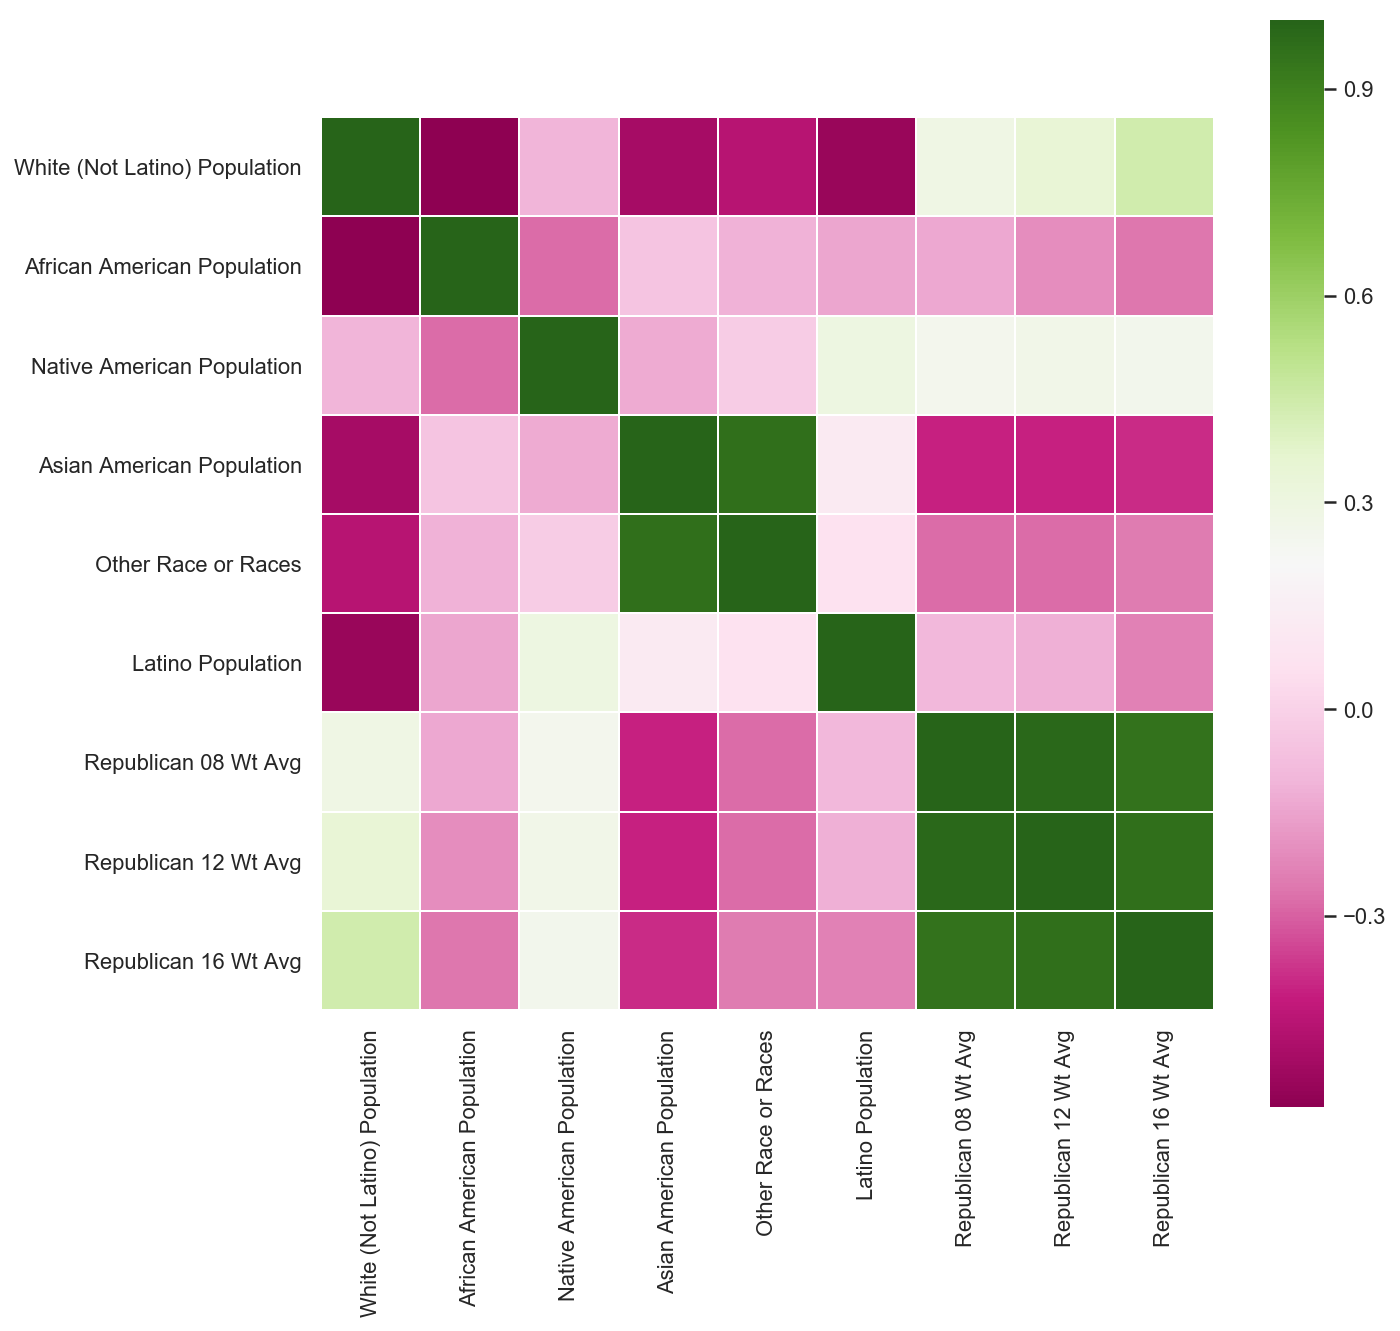

In [51]:
#CORRELATE RACE COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR REPUBLICANS BY THE STATE
republican_corr_by_state = votes_by_states_with_wts[['White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'Republican 08 Wt Avg','Republican 12 Wt Avg',
                                                'Republican 16 Wt Avg']].corr()
# PLOT A HEATMAP FOR THE REPUBLICAN CORRELATION WITH RACE ONLY
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(republican_corr_by_state,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=republican_corr_by_state.columns,yticklabels=republican_corr_by_state.columns)

When analyzing the data at the state i found that the "White Population" continued to have a positive correlation with Republican votes. But the "Native American population" also seemed to be weakly correlated with the Republicans. This was not seen in the County level correlation. "African American" and "Asian American" show a stronger negative correlation with the Republican Vote Share. This was seen for all 3 years of the vote share analysis.

To validate the significance of these correlations i have done the pearsons test to understand the significance of the correlation coefficients.

In [53]:
#ELECTION YEAR 2008 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
repcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Republican 08 Wt Avg']])
    print("Print T and P Value FOR 2008",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2008 (2.0628265089304554, 0.04456181481903067)
(0.2853630417198748, 0.04456181481903067)
Print T and P Value FOR 2008 (-0.9568624393033422, 1.6565685673859516)
(-0.13681253121167908, 0.34343143261404774)
Print T and P Value FOR 2008 (1.7992940581095325, 0.0782601603619356)
(0.2513670529197576, 0.07826016036193574)
Print T and P Value FOR 2008 (-3.0943654883708174, 1.9967142543275793)
(-0.4078066154495648, 0.0032857456724205234)
Print T and P Value FOR 2008 (-2.018931543479834, 1.9509011198680988)
(-0.2797708302111343, 0.04909888013190122)
Print T and P Value FOR 2008 (-0.6474591137143689, 1.479580386210964)
(-0.0930472471465613, 0.5204196137890369)


In [54]:
#ELECTION YEAR 2012 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
repcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Republican 12 Wt Avg']])
    print("Print T and P Value FOR 2012",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2012 (2.5559058807206276, 0.013812499061442846)
(0.34611190403968733, 0.013812499061442832)
Print T and P Value FOR 2012 (-1.451434621289679, 1.846836275067889)
(-0.2050452628259049, 0.15316372493211064)
Print T and P Value FOR 2012 (1.9317700388337424, 0.05930283323730301)
(0.2685819990097173, 0.05930283323730296)
Print T and P Value FOR 2012 (-3.11497750412512, 1.9968990570192708)
(-0.41006754562266534, 0.00310094298072903)
Print T and P Value FOR 2012 (-1.990459456042471, 1.947748877336132)
(-0.2761281631212595, 0.05225112266386782)
Print T and P Value FOR 2012 (-0.8174812770497947, 1.5823071774675284)
(-0.1171803619606142, 0.4176928225324721)


In [55]:
#ELECTION YEAR 2016 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
repcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Republican 16 Wt Avg']])
    print("Print T and P Value FOR 2016",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2016 (3.4242420385101413, 0.0012711075364095217)
(0.4430827058468008, 0.0012711075364095288)
Print T and P Value FOR 2016 (-1.868579380149528, 1.9322092490560867)
(-0.26040145434961387, 0.06779075094391333)
Print T and P Value FOR 2016 (1.8321010318989417, 0.07314458807827938)
(0.25565324632870184, 0.07314458807827945)
Print T and P Value FOR 2016 (-2.950601582359641, 1.995107872743803)
(-0.3918283667319396, 0.004892127256197053)
Print T and P Value FOR 2016 (-1.7776967495014218, 1.9182107822513372)
(-0.24853727776334314, 0.08178921774866255)
Print T and P Value FOR 2016 (-1.6796564349433818, 1.90047735342162)
(-0.235612216532693, 0.09952264657838)


The test shows that the p-value for the White Population continues to be lesser than 0.05 which says there is positive correlation with the republican vote share. But the "Native American Population" is >0.05 which is not positively but very close to the 0 and is negative, so the earlier correlation metric may not be accurate in this case.

And also for the Negative Correlation for "African American" and "Latino Population" shows that even though at the state level there is a moderate negative correlation, the p-values are much higher which proves that there is not a significant linear relationship between x and y. The "Asian" and "Other Races" Column seem to be significant and it is across all the 3 election years.

I will proceed to test with the Democratic Vote Share Analysis By State

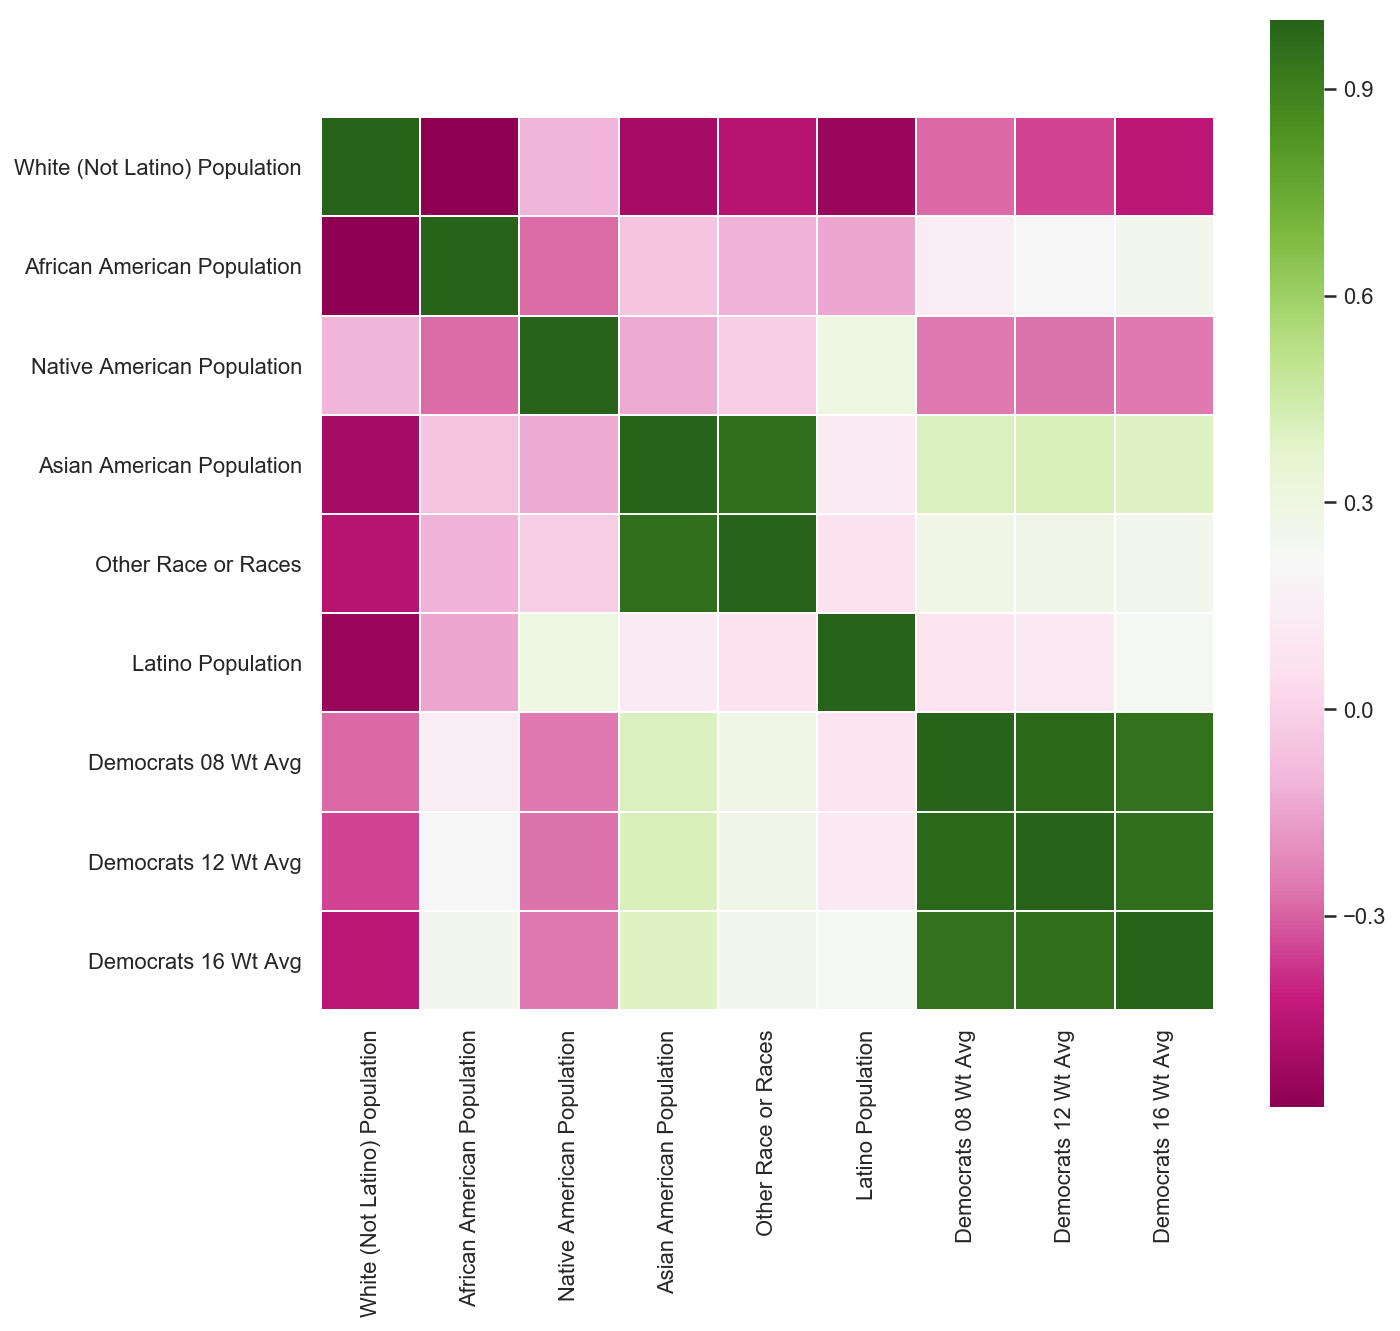

In [56]:
#CORRELATE RACE COLUMNS WITH THE VOTE SHARE PERCENTAGE FOR DEMOCRATS BY THE STATE
democrats_corr_by_state = votes_by_states_with_wts[['White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'Democrats 08 Wt Avg','Democrats 12 Wt Avg',
                                                'Democrats 16 Wt Avg']].corr()
# PLOT A HEATMAP FOR THE DEMOCRATS CORRELATION WITH RACE ONLY
plt.figure(figsize=(10,10)) 
sns.set(font_scale=1)
sns.heatmap(democrats_corr_by_state,cmap="PiYG",square=True,
                linewidth=.5,xticklabels=democrats_corr_by_state.columns,yticklabels=democrats_corr_by_state.columns)

In [57]:
#ELECTION YEAR 2008 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
demcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Democrats 08 Wt Avg']])
    print("Print T and P Value FOR 2008",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2008 (-2.062826508930453, 1.9554381851809692)
(-0.28536304171987464, 0.044561814819030834)
Print T and P Value FOR 2008 (0.9568624393033415, 0.3434314326140486)
(0.136812531211679, 0.34343143261404774)
Print T and P Value FOR 2008 (-1.7992940581095316, 1.9217398396380643)
(-0.25136705291975747, 0.07826016036193574)
Print T and P Value FOR 2008 (3.0943654883708147, 0.0032857456724205516)
(0.4078066154495644, 0.0032857456724205564)
Print T and P Value FOR 2008 (2.0189315434798316, 0.049098880131901466)
(0.279770830211134, 0.04909888013190139)
Print T and P Value FOR 2008 (0.6474591137143678, 0.5204196137890365)
(0.09304724714656117, 0.5204196137890369)


In [58]:
#ELECTION YEAR 2012 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
demcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Democrats 12 Wt Avg']])
    print("Print T and P Value FOR 2012",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2012 (-2.5559058807206276, 1.986187500938557)
(-0.34611190403968733, 0.013812499061442832)
Print T and P Value FOR 2012 (1.4514346212896785, 0.15316372493211095)
(0.20504526282590485, 0.15316372493211064)
Print T and P Value FOR 2012 (-1.9317700388337404, 1.9406971667626967)
(-0.26858199900971697, 0.05930283323730339)
Print T and P Value FOR 2012 (3.114977504125118, 0.0031009429807290346)
(0.4100675456226651, 0.0031009429807290407)
Print T and P Value FOR 2012 (1.9904594560424704, 0.05225112266386803)
(0.2761281631212594, 0.052251122663868)
Print T and P Value FOR 2012 (0.8174812770497956, 0.4176928225324714)
(0.11718036196061431, 0.4176928225324702)


In [59]:
#ELECTION YEAR 2016 - RUNNING STATISTICAL SIGNIFICANT TESTS  BY STATE
demcolumns = ['White (Not Latino) Population','African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population']
                                                
for index in repcolumns:
    a1 = np.array(votes_by_states_with_wts[index])
    b1 = np.array(votes_by_states_with_wts[['Democrats 16 Wt Avg']])
    print("Print T and P Value FOR 2016",electiontest(a1.ravel(),b1.ravel()))
    print(stats.pearsonr(a1.ravel(),b1.ravel()))
    a1 =[]
    b1 = []

Print T and P Value FOR 2016 (-3.4242420385101418, 1.9987288924635904)
(-0.4430827058468009, 0.0012711075364095245)
Print T and P Value FOR 2016 (1.8685793801495287, 0.06779075094391321)
(0.2604014543496139, 0.06779075094391333)
Print T and P Value FOR 2016 (-1.8321010318989395, 1.9268554119217203)
(-0.25565324632870157, 0.0731445880782797)
Print T and P Value FOR 2016 (2.9506015823596408, 0.004892127256197048)
(0.3918283667319395, 0.004892127256197053)
Print T and P Value FOR 2016 (1.7776967495014218, 0.08178921774866262)
(0.24853727776334303, 0.08178921774866255)
Print T and P Value FOR 2016 (1.6796564349433807, 0.09952264657838014)
(0.23561221653269285, 0.09952264657838)


What i can see from the above is that the "Asian American Population" seems to be consistant for all 3 years and are positively correlated with p-value of <0.05 which is significantly different from 0. This was the same at the County Level. But the "African American Population" and "Other Races" do not seem to be significantly from 0 and seem to have a p-value from >0.05.These results look different from the County Level data, as under county the democrats had a good relationship with the 
"African American Population" and "Other Races".

Similarly when looking at the "White Population" have a negative correlation and looks consistant with the County Leval and also across the 3 elections. The "Latino Population" has a positive correlation but the p-value looks higher for all 3 years which means that the significance is closer to 0, this is also different when compared to the County level data where they had a positive correlation with the vote shared and significanty different than 0. The "Native American Population" has a negative correlation at the State Level but had a p-value >0.05 which is significantly closer to 0, but when compared to the County level the "Native American Population" had a positive correlation with democrats.

In [60]:
votes_by_states_with_wts[['Republican 08 Wt Avg','Republican 12 Wt Avg','Republican 16 Wt Avg','Democrats 08 Wt Avg','Democrats 12 Wt Avg','Democrats 16 Wt Avg']]

Republican 08 Wt Avg  Republican 12 Wt Avg  \
State                                                              
Alabama                          61.516615             61.715582   
Arizona                          54.437074             54.648982   
Arkansas                         60.154922             61.983444   
California                       38.232168             38.436513   
Colorado                         45.597594             47.405667   
Connecticut                      38.642977             41.149591   
Delaware                         37.615964             40.520395   
District of Columbia              6.599232              7.412351   
Florida                          47.989984             48.774748   
Georgia                          53.033458             54.015941   
Hawaii                           27.175434             28.413282   
Idaho                            63.813504             66.925402   
Illinois                         36.731440             40.720378   
Indiana                          49.492580             55.094689   
Iowa                             45.299974             47.218145   
Kansas                           57.539202             60.801037   
Kentucky                         58.847242             62.173260   
Louisiana                        59.755703             59.107097   
Maine                            41.349264             42.440257   
Maryland                         36.277350             36.017499   
Massachusetts                    36.412416             37.798998   
Michigan                         41.472168             44.858950   
Minnesota                        45.006022             46.300571   
Mississippi                      56.957074             56.007920   
Missouri                         50.628547             55.200669   
Montana                          51.140738             56.775834   
Nebraska                         57.503367             60.988221   
Nevada                           43.274948             46.291402   
New Hampshire                    45.140845             47.080028   
New Jersey                       41.301258             40.143465   
New Mexico                       43.452140             45.765402   
New York                         34.558933             33.681623   
North Carolina                   50.293410             51.650907   
North Dakota                     53.986924             59.464605   
Ohio                             47.891947             48.646610   
Oklahoma                         65.542726             66.559038   
Oregon                           42.095289             44.336594   
Pennsylvania                     45.171829             47.742095   
Rhode Island                     35.411869             35.536537   
South Carolina                   54.836991             55.537188   
South Dakota                     54.234825             59.029037   
Tennessee                        57.977118             60.477141   
Texas                            54.382861             56.189045   
Utah                             64.958090             74.680683   
Vermont                          31.312670             31.968376   
Virginia                         46.677084             47.919297   
Washington                       41.916151             43.117892   
West Virginia                    56.678487             63.775163   
Wisconsin                        42.729287             46.300192   
Wyoming                          66.931706             71.223124   

                      Republican 16 Wt Avg  Democrats 08 Wt Avg  \
State                                                             
Alabama                          64.403933            38.483385   
Arizona                          52.050056            45.562926   
Arkansas                         63.637533            39.845078   
California                       34.964205            61.767832   
Colorado                         47.773503            54.402406   
Connecticut     

#### DISTRIBUTION OF VOTES
In this part we will perform some more advanced statistical analysis on the data.

To understand the distribution of the percentage of votes shares i will be using the histogram to plot the data. The below shows the 3 plots for each election year and we can see that the charts have variations between them even by looking at the distribution. And as question clearly states "Republican votes", I have provided the visuals for the Republical Vote Share By percentage.

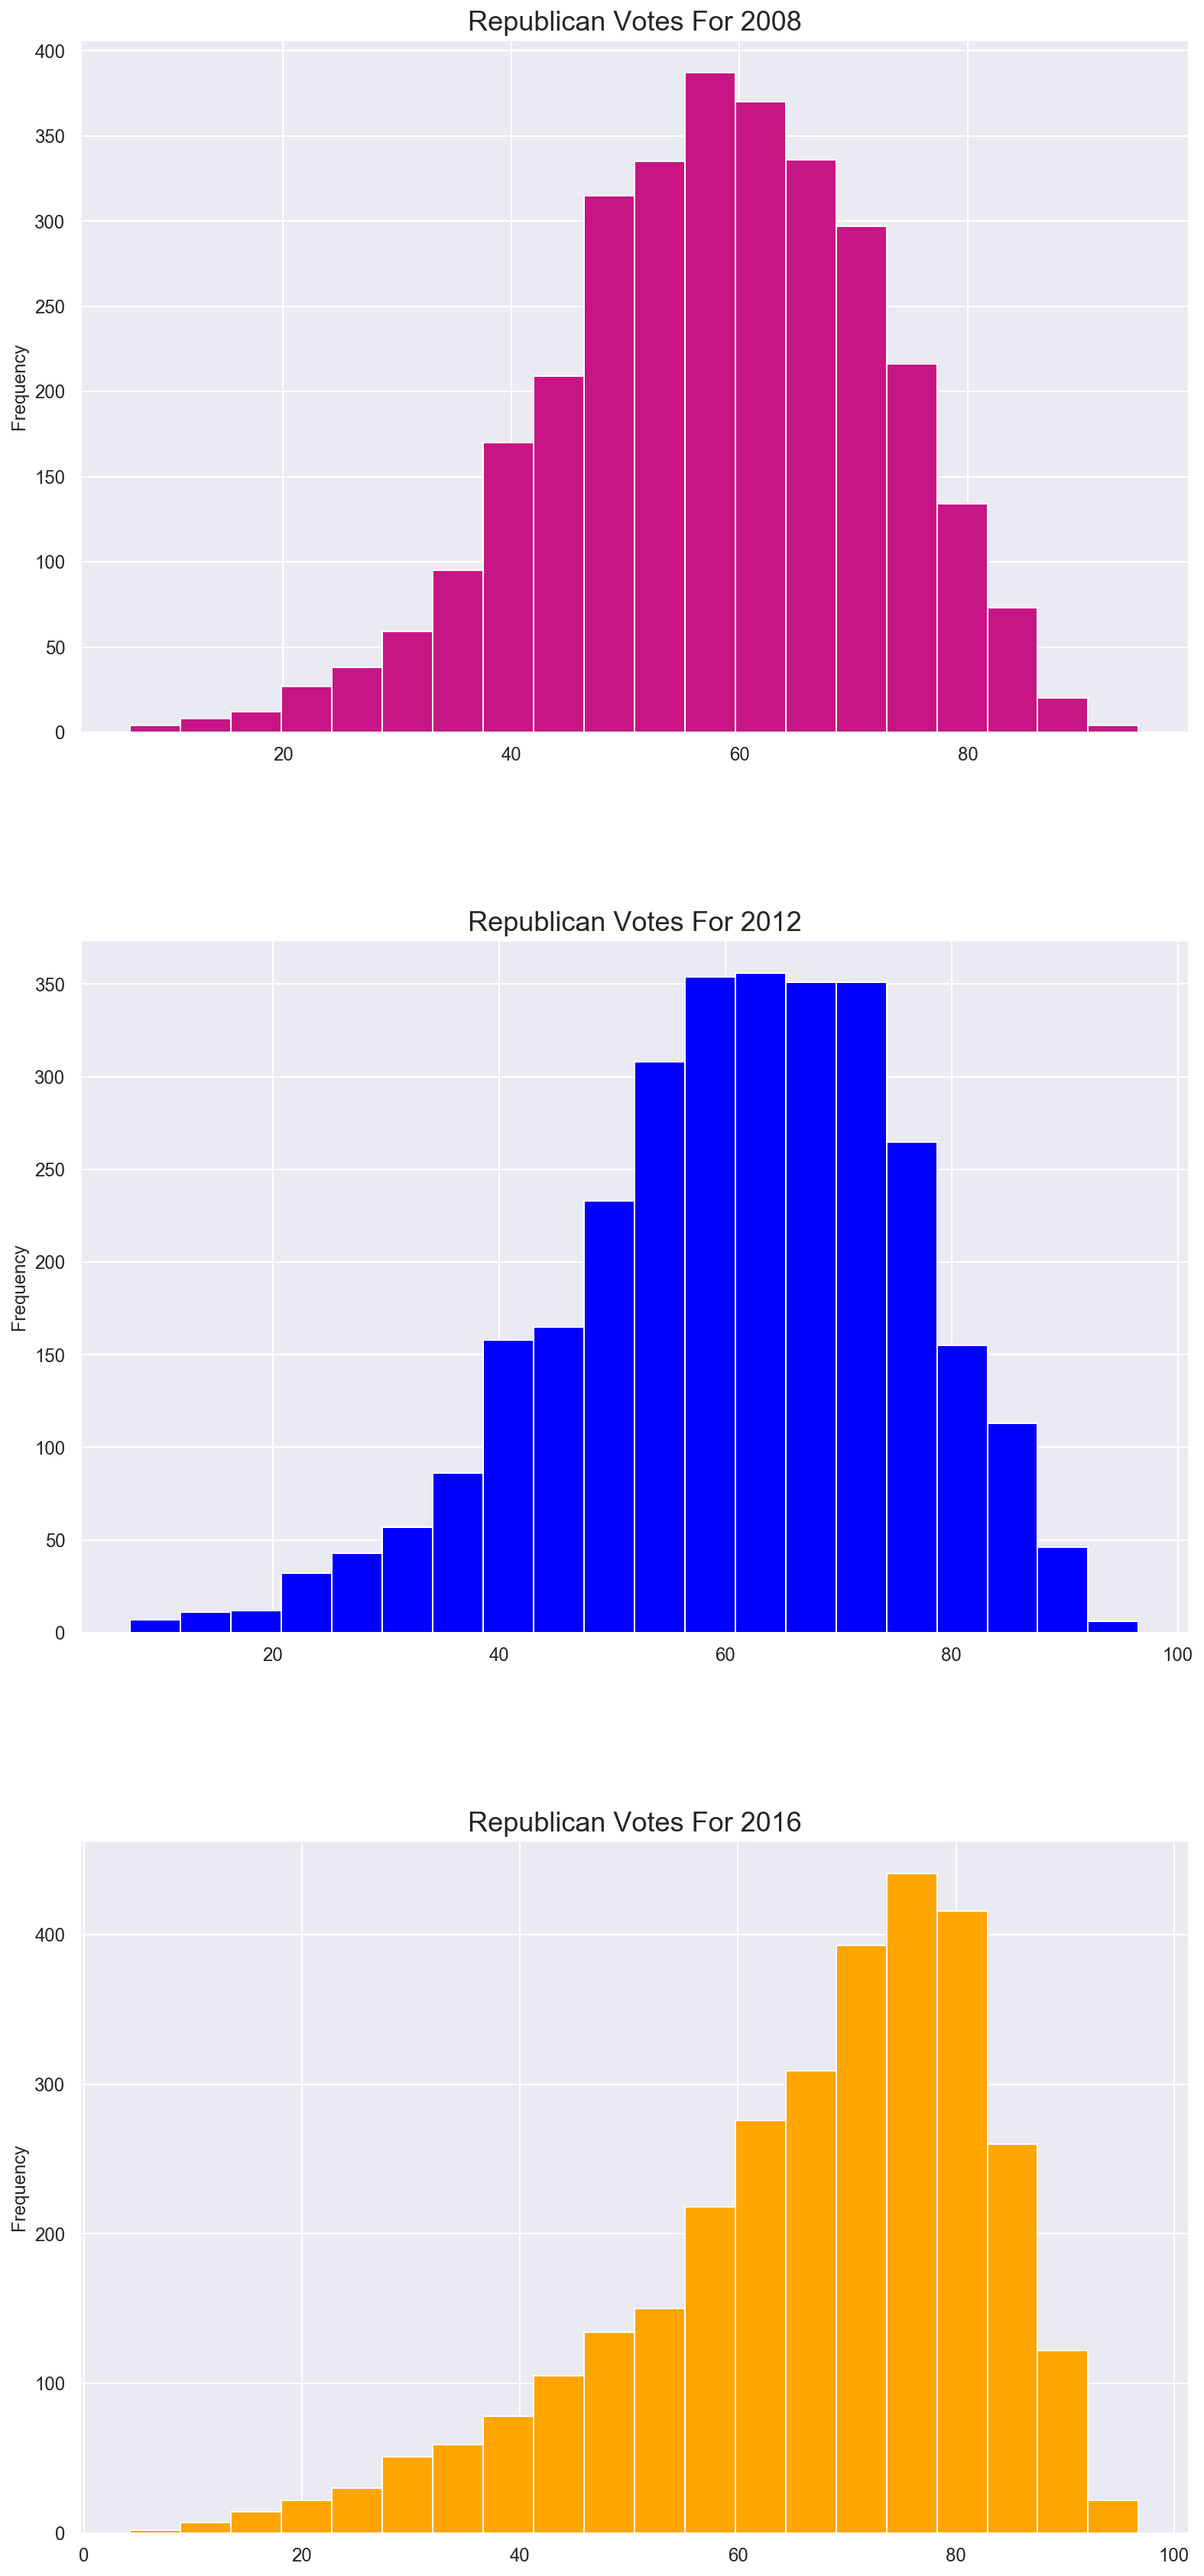

In [61]:
#HISTOGRAM TO SHOW THE DISTRIBUTION OF VOTES BY COUNTY
fig, axarr = plt.subplots(3, 1, figsize=(13, 30))
republican_share_by_county['Republicans 08 Rel'].sort_index().plot.hist(
    ax=axarr[0],fontsize=12, color='mediumvioletred',bins=20,).set_title("Republican Votes For 2008", fontsize=18)
republican_share_by_county['Republicans 12 Rel'].sort_index().plot.hist(
    ax=axarr[1],fontsize=12, color='blue',bins=20).set_title("Republican Votes For 2012", fontsize=18)
republican_share_by_county['votes16_trumpd Rel'].sort_index().plot.hist(
    ax=axarr[2],fontsize=12, color='orange',bins=20).set_title("Republican Votes For 2016", fontsize=18)
plt.subplots_adjust(hspace=.3)

#### UNDERSTANDING SIMILARITY
To find out if the above 3 elections data was similar or if there was a variance between the 3 graphs. Looking at the graph we can say that there are differences by just looking tha frequency of the graphs. But this does not prove that there are not similar. A statistical way to prove this would be perform tests like a t-test or f-test or an ANOVA test and all 3 can be done on the above data.

Because I will be comparing 3 groups of data i.e for the vote shares of the election year 2008, 2012 and 2016 I will  be using the ANOVA which compares the variance between the 3 groups and tells us if the "NULL Hypothesis" was true or the opposite. So in our case it should:
    
    H0 - The mean of "Republicans 08 Rel" = mean of "Republicans 12 Rel" = mean of "Republicans 16 Rel"
    
    or
    
    H1 - There is a difference in the mean
    
So i have used the ANOVA one way test using the statsmodel function f_oneway which accepts sample measurements for each group and returns the F-Value and P-Value.

In [62]:
#DEFINE SIMILARITY - USING ONE WAY ANOVA - BY COUNTY LEVEL DATA
stats.f_oneway(republican_share_by_county['Republicans 08 Rel'], republican_share_by_county['Republicans 12 Rel'],
               republican_share_by_county['votes16_trumpd Rel'])

F_onewayResult(statistic=284.180496400447, pvalue=1.5752972601860922e-120)

So from the above results what i can intepret is that the F-Value which is the F-statistic calculated using the "Mean Sum of Squares of Groups"
divided by the "Mean Sum of Squares of the Sample" would be equal to lowest value 1 if the 3 groups were similar. But in our case we
can clearly see that it is not equal to 1 and there is a varaince which is the difference or how extreme the sample groups differ.

Similarly the p-value which when < 0.05 rejects the NULL Hypothesis which means that the above 3 are not from the same distribution
and are from a different distribution. So the Alternat Hypothesis is true and the Null Hypothesis has failed this test.

#### DISTRIBUTION OF VOTES - BY STATE
The State level data has been aggregated using a weighted average.

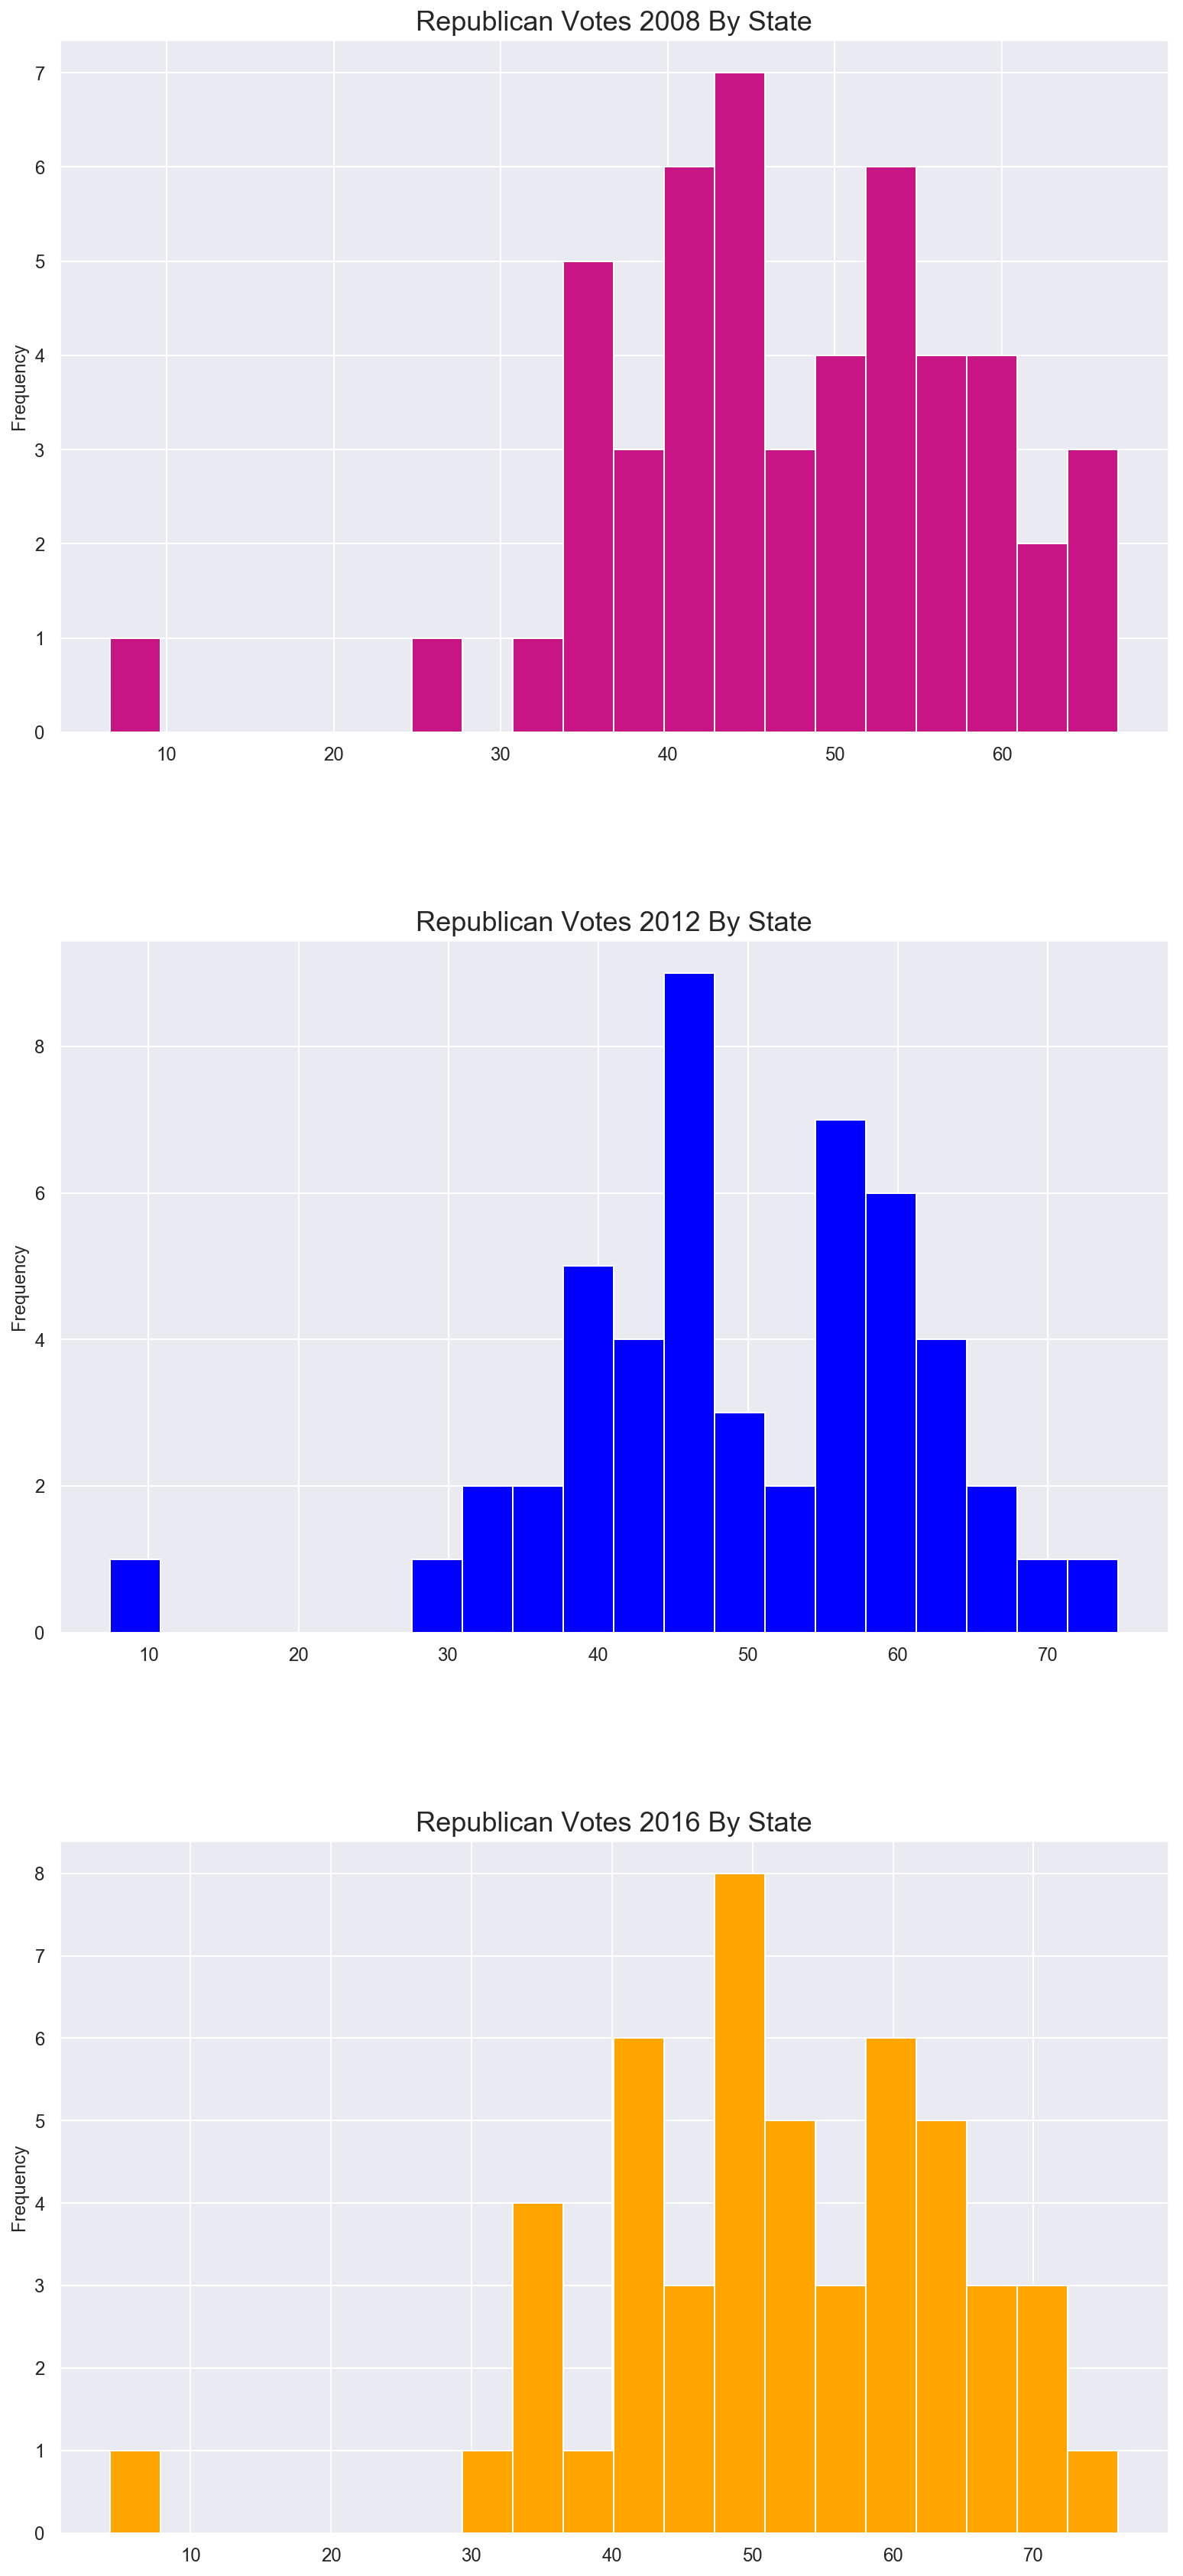

In [63]:
#HISTOGRAM TO SHOW THE DISTRIBUTION OF VOTES BY STATE
fig, axarr = plt.subplots(3, 1, figsize=(13, 30))
votes_by_states_with_wts['Republican 08 Wt Avg'].sort_index().plot.hist(
    ax=axarr[0],fontsize=12, color='mediumvioletred',bins=20).set_title("Republican Votes 2008 By State", fontsize=18)
votes_by_states_with_wts['Republican 12 Wt Avg'].sort_index().plot.hist(
    ax=axarr[1],fontsize=12, color='blue',bins=20).set_title("Republican Votes 2012 By State", fontsize=18)
votes_by_states_with_wts['Republican 16 Wt Avg'].sort_index().plot.hist(
    ax=axarr[2],fontsize=12, color='orange',bins=20).set_title("Republican Votes 2016 By State", fontsize=18)
plt.subplots_adjust(hspace=.3)

In [64]:
#DEFINE SIMILARITY - USING ONE WAY ANOVA - BY STATE LEVEL DATA
stats.f_oneway(votes_by_states_with_wts['Republican 08 Wt Avg'], votes_by_states_with_wts['Republican 12 Wt Avg'],
               votes_by_states_with_wts['Republican 16 Wt Avg'])

F_onewayResult(statistic=1.5888810846195054, pvalue=0.20763970698965387)

The above histograms have been plotted by the "Weighted Average" values taken from the County level weights. And what i can see from the graph is that they do not look similar when looking at them as a visual.

Similar, to running the ANOVA test for the county level data,I ran the one way ANOVA test on the State Level and the above value says there is a small variance and the F-Value is closer to the least F-Statitic of 1. But the p-value is not less than 0.05, so we cannot reject the null hypothesis. But it does not mean that the graphs are similar but are very close to the variance.

So this is different than the county level where the variance is much higher than the state level.

### DATA MODEL
#### LINEAR REGRESSION

Based on the above analysis build a linear regression to predict the percentage of votes each party gets on the test dataset.

The expectation here is to build a linear regression model for the election years 2008, 2012 and 2016. So the question is to predict fraction of votes for the Republican Vote Share. For this i will continue to use the percentage columns of the repubican vote share. The training data will have 2008 and 2012 data while the test data will have 2016 data.

The below are some of the steps taken to build seperate datasets.

In [65]:
#WE HAVE TO FIT THE MODEL ON THE TRAINING DATASET, SO I WILL BE COMBINING THE DATASET AS ONE. I WILL BE COMBINING 2008 AND 2016
#AS MY TRAINING DATASET AND 2016 WILL BE MY TEST DATASET FOR PREDICTIONS
# del vote_share_by_county_concat1
# del vote_share_by_county_concat2
# del vote_share_by_county_concat3
vote_share_by_county_concat1 = votes_census_state
vote_share_by_county_concat2 = votes_census_state
vote_share_by_county_concat3 = votes_census_state

In [66]:
#CREATE SEPERATE DATAFRAMES FOR EACH YEAR
vote_share_by_county_concat1 = vote_share_by_county_concat1.drop(['Republicans 12 Rel','votes16_trumpd Rel','Democrots 08 Rel','Democrots 12 Rel','votes16_clintonh Rel'],axis=1)
vote_share_by_county_concat2 = vote_share_by_county_concat2.drop(['Republicans 08 Rel','votes16_trumpd Rel','Democrots 08 Rel','Democrots 12 Rel','votes16_clintonh Rel'],axis=1)
vote_share_by_county_concat3 = vote_share_by_county_concat3.drop(['Republicans 08 Rel','Republicans 12 Rel','Democrots 08 Rel','Democrots 12 Rel','votes16_clintonh Rel'],axis=1)

In [67]:
#RENAME THE VOTE SHARE COLUMN
vote_share_by_county_concat1 = vote_share_by_county_concat1.rename(columns = {'Republicans 08 Rel':'Republican Vote Share'})
vote_share_by_county_concat2 = vote_share_by_county_concat2.rename(columns = {'Republicans 12 Rel':'Republican Vote Share'})
vote_share_by_county_concat3 = vote_share_by_county_concat3.rename(columns = {'votes16_trumpd Rel':'Republican Vote Share'})

In [68]:
#CREATE TRAINING AND TEST DATASETS
vote_share_by_county_training = vote_share_by_county_concat1.append(vote_share_by_county_concat2)
vote_share_by_county_test = vote_share_by_county_concat3 

In [69]:
#DROP COLUMNS NOT REQUIRED IN THIS ANALYSIS
vote_share_by_county_training = vote_share_by_county_training.drop(['Democrats 08 (Votes)','Democrats 12 (Votes)','Republicans 08 (Votes)','Republicans 12 (Votes)','votes16_trumpd','votes16_clintonh',
                                                                 'Fips','State','ST','County'],axis=1)
vote_share_by_county_test = vote_share_by_county_test.drop(['Democrats 08 (Votes)','Democrats 12 (Votes)','Republicans 08 (Votes)','Republicans 12 (Votes)','votes16_trumpd','votes16_clintonh',
                                                                 'Fips','State','ST','County'],axis=1)

For the analysis i will be using the percentage of republican vote shares for 2008 and 2012 which is combined into a single column.So i will be running the model on the complete dataset excluding the Categorical Variables "State","County" and "Fips".

The "Y" or dependent variable is the "Republicans 08 Rel" which is the vote share percentage for 2008 and 2012.The independent variables are 'Precincts','Votes','Total Population','Less Than High School Diploma','At Least High School Diploma','At Least Bachelors\'s Degree','Graduate Degree','School Enrollment','Median Earnings 2010','median_age','White (Not Latino) Population',
'African American Population','Native American Population','Asian American Population','Other Race or Races','Latino Population','SIRE_homogeneity','Gini.Coefficient','Children Under 6 Living in Poverty','Adults 65 and Older Living in Poverty','Child.Poverty.living.in.families.below.the.poverty.line','Poverty.Rate.below.federal.poverty.threshold','Management.professional.and.related.occupations','Service.occupations','Sales.and.office.occupations','Farming.fishing.and.forestry.occupations','Construction.extraction.maintenance.and.repair.occupations','Production.transportation.and.material.moving.occupations',
'Diabetes','Uninsured','Unemployment','Violent.crime','Injury.deaths','Low.birthweight','Teen.births','Children.in.single.parent.households','Adult.obesity','Sexually.transmitted.infections'.

So to start of with i will be running a fit of the Linear Regression Model.

In [70]:
#SETUP ALL THE INDEPENDANT VARIABLES IN THIS SECTION - IN THIS CASE I HAVE USED AROUND 30+ INDEPENDENT VARIABLES
x = sm.add_constant(vote_share_by_county_training[['Precincts','Votes','Total Population',
                                                'Less Than High School Diploma','At Least High School Diploma',
                                                'At Least Bachelors\'s Degree','Graduate Degree','School Enrollment',
                                                'Median Earnings 2010','median_age','White (Not Latino) Population',
                                                'African American Population','Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity','Gini.Coefficient','Children Under 6 Living in Poverty',
                                                'Adults 65 and Older Living in Poverty','Child.Poverty.living.in.families.below.the.poverty.line',
                                                'Poverty.Rate.below.federal.poverty.threshold','Management.professional.and.related.occupations',
                                                'Service.occupations','Sales.and.office.occupations','Farming.fishing.and.forestry.occupations',
                                                'Construction.extraction.maintenance.and.repair.occupations',
                                                'Production.transportation.and.material.moving.occupations',
                                                'Diabetes','Uninsured','Unemployment',
                                                'Violent.crime',
                                                'Injury.deaths','Low.birthweight','Teen.births','Children.in.single.parent.households',
                                                'Adult.obesity','Sexually.transmitted.infections']])
y =vote_share_by_county_training['Republican Vote Share'].values

C:\Users\shrey\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


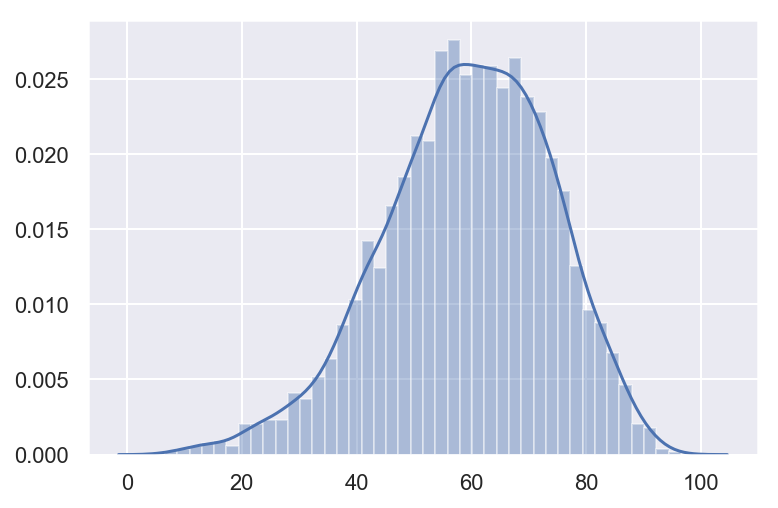

In [71]:
#VALIDATING THE DISTRIBUTION OF THE DEPENDENT VARIABLE
sns.distplot(y)
plt.show()

In [72]:
#FIT A LINEAR MODEL FOR 2008 and 2012,2016 REPUBLICAN VOTE SHARE
model_first= sm.OLS(y,x).fit()
display(model_first.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     357.8
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:11:49   Log-Likelihood:                -21880.
No. Observations:                6218   AIC:                         4.384e+04
Df Residuals:                    6179   BIC:                         4.410e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        223.4818    295.989      0.755      0.450    -356.760     803.723
Precincts                                                     -0.0024      0.002     -1.469      0.142      -0.006       0.001
Votes                                                      -3.463e-05   4.39e-06     -7.890      0.000   -4.32e-05    -2.6e-05
Total Population                                            9.986e-06   1.74e-06      5.752      0.000    6.58e-06    1.34e-05
Less Than High School Diploma                                  0.0186      0.066      0.284      0.777      -0.110       0.147
At Least High School Diploma                                   0.0443      0.061      0.727      0.468      -0.075       0.164
At Least Bachelors's Degree                                   -0.1644      0.049     -3.389      0.001      -0.260      -0.069
Graduate Degree                                               -0.8442      0.083    -10.222      0.000      -1.006      -0.682
School Enrollment                                              0.0934      0.025      3.685      0.000       0.044       0.143
Median Earnings 2010                                        -3.18e-05   4.13e-05     -0.769      0.442      -0.000    4.92e-05
median_age                                                    -0.6492      0.036    -17.989      0.000      -0.720      -0.578
White (Not Latino) Population                                 -0.3770      2.144     -0.176      0.860      -4.580       3.826
African American Population                                   -1.0375      2.144     -0.484      0.628      -5.241       3.166
Native American Population                                    -1.1227      2.144     -0.524      0.601      -5.326       3.081
Asian American Population                                     -1.0956      2.145     -0.511      0.609      -5.300       3.109
Other Race or Races                                           -1.4143      2.147     -0.659      0.510      -5.624       2.795
Latino Population                                             -0.9548      2.144     -0.445      0.656      -5.159       3.249
SIRE_homogeneity                                             -31.4874      1.388    -22.683      0.000     -34.209     -28.766
Gini.Coefficient                                              17.0484      4.317      3.949      0.000       8.585      25.512
Children Under 6 Living in Poverty                            -0.0290      0.020     -1.434      0.152      -0.069       0.011
Adults 65 and Older Living in Poverty                          0.0254      0.034      0.746      0.456      -0.041       0.092
Child.Poverty.living.in.families.be

So i will go ahead and list down what i have learnt from the above table and where i will be making changes to start off with:

1) There is a multicollinearity issue that exists between the independent variables which is why the "Cond No" is higher. This means my model is unstable and i have to find out which variables are highly correlated.

2) The R-Squared and the Adjusted R-Squared gives the variance in the dependent variable which is explained buy the independent variables. In this case it at 0.686 which is lower, and sometimes we can say that the higher this number the better our model fits. So this will be the last value to consider when we look at whether my model is fit or not.

3) The Probability of F-Stats in this case is like a p-value for the overall data.So we test the null hypothesis that all coefficients are equal to zero and none of the predictor variables actually predict the outcome. As we are seeing that it closer to 0 we can reject the null hypothesis.

4) Looking at all the coefficients there are variables that move in both the negative and positive direction, but some seem to have exponential increase and decrease for a unit of 1.

5) Standard error tells me the average error of the regression model and how wrong the estimated coefficient could be when used in predictions. Also when looking at the Standard error for each of the coefficients there are some variables with higher standard error. The smaller the standard error value when compared to the coefficients the better the prediction and fit.

6) P-Value gives me the probability of estimated coeeficient is unreliable or not, so the smaller the p-value the better the predictor and i can reject the null hypothesis that the coeff is closer to Zero.

7) I will also be considering the confidence interval of the coefficients to validate the if the coeff falls in the 255 and 95% interval and how it will impact the model prediction.
   
So to start of I will work towards understanding the collinear variables and the ones that are highly correlated among each other.

In [73]:
#CORRELATION BETWEEN ALL DATA COLUMNS AND REPUBLICAN VOTE SHARE - BY VARIANCE - TO UNDERSTAND HIGHLY CORRELATED VARIABLES
#THE DARKER RED SHADES TELL ME WHICH ARE COLLINEAR
cmap = sns.diverging_palette(10, 500, as_cmap=True)
vote_share_by_county_corr = republican_share_by_county.corr() ** 2
vote_share_by_county_corr.style.background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1).set_precision(2)

From the above i came up with a list of independant varaibles that were highly correlated, and also checked the Coefficients, Standard Error and P-Value of each of those varaible to conclude which ones dont fit the model. So the consolidated list of varaibles that should be dropped based on the 3 factors were:

1) Precincts

2) Votes

3) Less than High School Diploma

4) Management Professionals

5) Children Under 6 Living in Poverty

6) Sexually.transmitted.infections

7) Adult Obesity

8) White (Not Latino) Population

All these values were considered with value >0.50 and which had higher p-values.

Apart from the above listed the next focus was to look at the values with higher std error and lower p-values. Some of them are are below and were removed from the independent variables:

1) At Least High School Diploma

2) Median Earnings

3) Farming.fishing.and.forestry.occupations

4) Adults 65 and Older Living in Poverty

5) Construction.extraction.maintenance.and.repair.occupations

I will also be removing 'Total Population', 'Less Than High School Diploma','African American Population', 'School Enrollment',
'Poverty.Rate.below.federal.poverty.threshold','Injury.deaths','Sales.and.office.occupations'. These values have been removed based on the P-Value and the Standard error.

All the highly correlated values were removed from this model but the model continues to have a high condition no.

In [74]:
#SETUP ALL THE INDEPENDANT VARIABLES AFTER UNDERSTANDING WHICH VARAIBLES ARE CLOSER TO THE FIT
x2 = sm.add_constant(vote_share_by_county_training[['At Least Bachelors\'s Degree','Graduate Degree',
                                                'median_age','White (Not Latino) Population',
                                                'Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity',
                                                'Child.Poverty.living.in.families.below.the.poverty.line',                                                
                                                'Service.occupations',                                              
                                                'Production.transportation.and.material.moving.occupations',
                                                'Diabetes','Uninsured','Unemployment',
                                                'Violent.crime',
                                                'Low.birthweight','Teen.births','Children.in.single.parent.households'
                                                ]])
y2 =vote_share_by_county_training['Republican Vote Share'].values

In [75]:
#FIT A LINEAR MODEL FOR 2008 and 2012 REPUBLICAN VOTE SHARE
model_second= sm.OLS(y2, x2).fit()
display(model_second.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     677.0
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:12:00   Log-Likelihood:                -22004.
No. Observations:                6218   AIC:                         4.405e+04
Df Residuals:                    6198   BIC:                         4.418e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                        49.5133      2.634     18.799      0.000      44.350      54.677
At Least Bachelors's Degree                                  -0.1366      0.043     -3.202      0.001      -0.220      -0.053
Graduate Degree                                              -0.8594      0.080    -10.725      0.000      -1.016      -0.702
median_age                                                   -0.4316      0.028    -15.471      0.000      -0.486      -0.377
White (Not Latino) Population                                 0.6998      0.018     39.021      0.000       0.665       0.735
Native American Population                                   -0.0677      0.023     -2.969      0.003      -0.112      -0.023
Asian American Population                                    -0.2142      0.070     -3.075      0.002      -0.351      -0.078
Other Race or Races                                          -0.2400      0.089     -2.683      0.007      -0.415      -0.065
Latino Population                                             0.1129      0.017      6.544      0.000       0.079       0.147
SIRE_homogeneity                                            -32.4102      1.328    -24.400      0.000     -35.014     -29.806
Child.Poverty.living.in.families.below.the.poverty.line      -0.0991      0.020     -4.986      0.000      -0.138      -0.060
Service.occupations                                          -0.6041      0.038    -16.087      0.000      -0.678      -0.530
Production.transportation.and.material.moving.occupations    -0.4779      0.028    -17.357      0.000      -0.532      -0.424
Diabetes                                                    135.7802      8.232     16.494      0.000     119.642     151.918
Uninsured                                                    91.3115      3.094     29.513      0.000      85.246      97.377
Unemployment                                                -86.8641      4.839    -17.951      0.000     -96.350     -77.378
Violent.crime                                                -0.0033      0.001     -5.020      0.000      -0.005      -0.002
Low.birthweight                                              48.5316      8.472      5.728      0.000      31.923      65.140
Teen.births                                                   0.1387      0.010     13.600      0.000       0.119       0.159
Children.in.single.parent.households                        -32.6194      1.903    -17.144      0.000     -36.349     -28.890
==============================================================================
Omnibus:                       23.853   Durbin-Watson:                   1.773
Prob(Omnibus):             

The model continues to look unstable after all the multicollinear variable have been removed, but all the coeeficients have a lowere std error and lower p-value.

So i am going ahead and predict the percentage of votes with these numbers.

In [76]:
#SETUP ALL THE INDEPENDANT VARIABLES FOR THE PREDICTION 
x3 = sm.add_constant(vote_share_by_county_test[['At Least Bachelors\'s Degree','Graduate Degree',
                                                'median_age','White (Not Latino) Population',
                                                'Native American Population',
                                                'Asian American Population','Other Race or Races','Latino Population',
                                                'SIRE_homogeneity',
                                                'Child.Poverty.living.in.families.below.the.poverty.line',                                                
                                                'Service.occupations',                                              
                                                'Production.transportation.and.material.moving.occupations',
                                                'Diabetes','Uninsured','Unemployment',
                                                'Violent.crime',
                                                'Low.birthweight','Teen.births','Children.in.single.parent.households'
                                                ]])
y3 = vote_share_by_county_test['Republican Vote Share'].values

In [77]:
#FIT THE MODEL AND PREDICT THE VOTE SHARE VALUES
predictions = model_second.predict(x3)
predictions

0       53.417101
1       81.569477
2       64.611045
3       54.190213
4       61.129031
5       12.333084
6       43.677064
7       80.971359
8       64.638229
9       66.979369
10      18.449556
11      48.635234
12      55.422894
13      53.333053
14      50.995107
15      48.440410
16      43.924655
17      50.458839
18      50.881305
19      68.988618
20      65.668229
21      51.857825
22      61.167248
23      73.808580
24      50.409668
25      57.928052
26      66.322093
27      59.241675
28      50.828557
29      54.604896
          ...    
3079    49.650153
3080    51.772010
3081    48.886984
3082    55.954000
3083    66.364103
3084    55.360213
3085    52.929910
3086    63.269973
3087    75.075077
3088    80.801524
3089    73.956864
3090    68.043028
3091    66.643864
3092    67.847859
3093    33.374240
3094    69.523741
3095    60.104358
3096    60.739086
3097    73.574509
3098    61.199372
3099    76.831117
3100    63.402390
3101    54.102115
3102    45.895727
3103    41

I think the model is not stable enough to predict the fraction of votes because some value in the dataset is not in the format the model is expecting so it may not be a collinearity problem at this point. As we know that each column has different types of values,which is rendering the model to be unstable.

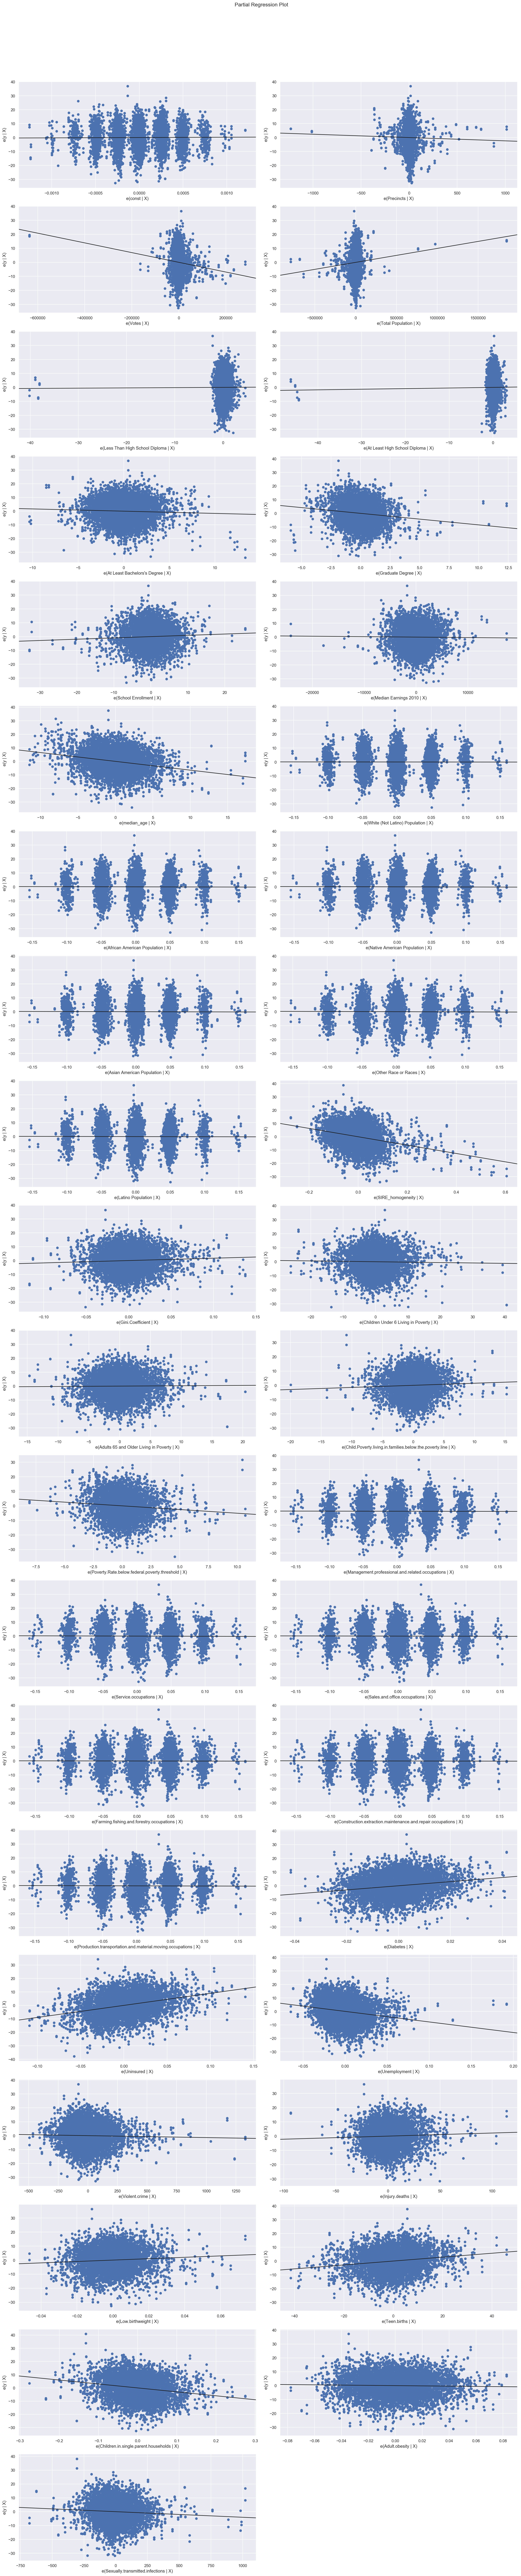

In [78]:
# this produces our six partial regression plots
fig = plt.figure(figsize=(20,100))
fig = sm.graphics.plot_partregress_grid(model_first, fig=fig)

From the above pairplots what i could understand was that the only variables that were linear were 'White (Not Latino) Population','Low.birthweight','Teen.births','Injury.deaths','Uninsured','Diabetes'.

So as i have already fit my model by adding the constant, i am going to try another  linear model without the constants.

In the final model which i have tried below i am not adding the constant and there seems to be major difference in the R2 value and the condition.

In [79]:
#SETUP ALL THE INDEPENDANT VARIABLES AFTER UNDERSTANDING WHICH ARE CLOSER TO THE FIT AND THIS TIME WITHOUT THE CONSTANT
x4 = vote_share_by_county_training[['Less Than High School Diploma',
                                 'At Least Bachelors\'s Degree','Graduate Degree','median_age','White (Not Latino) Population',
                                 'African American Population','Native American Population',
                                 'Asian American Population','Other Race or Races','Latino Population',
                                'Adults 65 and Older Living in Poverty',
                                 'Service.occupations','Farming.fishing.and.forestry.occupations',
                                'Construction.extraction.maintenance.and.repair.occupations']]
                                            
y4 = vote_share_by_county_training['Republican Vote Share'].values

In [80]:
#FIT A LINEAR MODEL FOR 2008 and 2012 REPUBLICAN VOTE SHARE
model_third= sm.OLS(y4, x4).fit()
display(model_third.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.349e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:12:22   Log-Likelihood:                -23669.
No. Observations:                6218   AIC:                         4.737e+04
Df Residuals:                    6204   BIC:                         4.746e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Less Than High School Diploma                                  0.4308      0.036     11.941      0.000       0.360       0.502
At Least Bachelors's Degree                                    0.4491      0.052      8.685      0.000       0.348       0.550
Graduate Degree                                               -1.4572      0.101    -14.371      0.000      -1.656      -1.258
median_age                                                    -0.3227      0.035     -9.326      0.000      -0.391      -0.255
White (Not Latino) Population                                  0.7456      0.020     37.863      0.000       0.707       0.784
African American Population                                    0.3581      0.023     15.740      0.000       0.314       0.403
Native American Population                                     0.3389      0.031     11.026      0.000       0.279       0.399
Asian American Population                                     -0.4168      0.089     -4.696      0.000      -0.591      -0.243
Other Race or Races                                            1.2333      0.115     10.729      0.000       1.008       1.459
Latino Population                                              0.4894      0.025     19.746      0.000       0.441       0.538
Adults 65 and Older Living in Poverty                         -0.2302      0.037     -6.260      0.000      -0.302      -0.158
Service.occupations                                           -0.6924      0.044    -15.901      0.000      -0.778      -0.607
Farming.fishing.and.forestry.occupations                       1.0313      0.061     16.937      0.000       0.912       1.151
Construction.extraction.maintenance.and.repair.occupations     0.8910      0.048     18.737      0.000       0.798       0.984
==============================================================================
Omnibus:                       31.348   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.399
Skew:                          -0.165   Prob(JB):                     1.52e-07
Kurtosis:                       2.886   Cond. No.                         89.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#FIT THE MODEL AND PREDICT THE VOTE SHARE VALUES FOR THE MODEL WITHOUT THE CONSTANT
predictions =model_third.predict(x4)
predictions

0       55.827512
1       72.688491
2       62.080621
3       60.498883
4       52.155081
5       52.477172
6       36.479920
7       81.368311
8       64.312437
9       59.220494
10      11.089669
11      54.164820
12      56.422213
13      57.176130
14      55.912375
15      52.941097
16      46.940847
17      59.421388
18      62.599644
19      66.342311
20      58.123745
21      46.118488
22      53.538473
23      74.509986
24      53.116066
25      61.533441
26      64.551113
27      63.924879
28      55.530702
29      63.143715
          ...    
3079    52.143273
3080    58.336435
3081    57.664244
3082    51.127365
3083    75.295188
3084    57.883507
3085    50.787008
3086    59.753558
3087    58.339208
3088    70.814046
3089    64.846488
3090    62.107720
3091    61.281167
3092    75.186822
3093    44.670668
3094    66.034998
3095    58.554350
3096    65.568026
3097    81.211234
3098    63.085004
3099    66.402140
3100    63.959007
3101    56.675283
3102    47.078251
3103    37

In [82]:
residual = vote_share_by_county_training['Republican Vote Share']- predictions
residual

0        3.943315
1       -7.744083
2        4.848109
3      -22.219826
4       15.957477
5      -15.778193
6       -2.348944
7       -6.737378
8        2.861956
9        7.440746
10       2.873035
11      -0.280357
12     -11.099755
13     -17.713137
14      -5.244853
15      -8.920406
16      -5.233011
17      -6.842607
18     -20.561816
19      14.265914
20       5.482705
21       1.436425
22       2.174134
23      -8.606184
24       2.768245
25     -12.430842
26       2.787210
27      -8.934919
28     -19.248153
29      -8.177304
          ...    
3079    -2.336427
3080   -12.744446
3081    -1.405274
3082    10.214779
3083   -10.936889
3084    -4.068296
3085    -8.747863
3086    -0.019672
3087    21.596206
3088    14.543724
3089    17.883154
3090    13.286757
3091    16.707748
3092     1.524705
3093    -7.393602
3094    -2.077102
3095    -3.881002
3096   -22.668366
3097     9.024456
3098     0.288308
3099    17.366923
3100    15.480245
3101   -12.128609
3102     0.202903
3103     8

The Final model which is created was also unstable with a condition of 89 which is high but when compared to the models i did earlier which had values with exponents. The final list of independen variables are 'Less Than High School Diploma',
'At Least Bachelors\'s Degree','Graduate Degree','median_age','White (Not Latino) Population','African American Population','Native American Population','Asian American Population','Other Race or Races','Latino Population',              'Adults 65 and Older Living in Poverty','Service.occupations','Farming.fishing.and.forestry.occupations',                     'Construction.extraction.maintenance.and.repair.occupations.

All the above listed values had lower std error when compared with the coefficients, their p-values were very less, the overall F-Stats was significantly lower and the R2 was high. Except for the condition number which was high. But the confidence interval of all these values also pointed out that the coeff was within the 95% range.

Also the Condition number continues to be higher than usual because of some of the values or numbers in this dataset and not just because of collinearity. All the columns that i have included in the final model where decimals, and when adding an absolute value or a fraction seems to increase the Condition No. 

I still believe there is room for improvement with this model, because the dataset needs some more work as the missing values, 0 and nulls and imputation done could be a reason that this model is unstable.

#### LOGISITIC REGRESSION:
Build a model that will predict who will become the next president and win the elections.

    

As this question expects us to find out who is elected president for the year 2016, so I have to conduct a regression analysis as i plan to use a binary as the dependent variable.

For this I need to create a dependent variable with outcomes for the 2008 and 2012 elections. So the binary value will be if democrats get a score lower score than the Republicans, then the value will be set as 1 and Democrats get a value 0. So a value of '1' means Republicans won in that state and a value of '0' means Democrats won.

I will create training dataset with data for 2008 and 2012 and my test dataset is for 2016 and both will have the vote share weighted average.

In [91]:
votes_to_calculate_weights

State                County  White (Not Latino) Population  \
0           Arkansas           Drew County                          67.90   
1           Arkansas        Madison County                          92.00   
2            Georgia         Jasper County                          72.70   
3           Colorado          Eagle County                          68.40   
4            Georgia          Dodge County                          66.15   
5         California       Imperial County                          15.20   
6            Georgia         Clarke County                          58.90   
7           Colorado           Yuma County                          78.50   
8           Colorado        Prowers County                          61.10   
9            Georgia        Carroll County                          74.35   
10        California  San Francisco County                          43.25   
11           Georgia         Wilkes County                          53.10   
12          Illinois        Madison County                          87.05   
13              Iowa        Dubuque County                          93.90   
14          Illinois           Bond County                          89.20   
15              Iowa      Poweshiek County                          94.25   
16              Iowa          Story County                          87.90   
17              Iowa          Henry County                          91.30   
18          Illinois         Putnam County                          94.00   
19           Georgia           Pike County                          85.25   
20          Kentucky       Caldwell County                          92.55   
21          Kentucky        Fayette County                          74.35   
22           Indiana    Bartholomew County                          88.30   
23          Kentucky       Carlisle County                          97.25   
24            Kansas    Leavenworth County                          81.55   
25          Illinois       Schuyler County                          95.65   
26           Indiana       Franklin County                          98.40   
27          Michigan          Barry County                          95.60   
28         Minnesota        Carlton County                          89.50   
29         Minnesota     Clearwater County                          87.30   
...              ...                   ...                            ...   
3079      Washington        Clallam County                          85.35   
3080       Wisconsin          Adams County                          91.25   
3081       Wisconsin       Walworth County                          87.60   
3082   West Virginia           Ohio County                          92.90   
3083   West Virginia        Webster County                          98.25   
3084        New York       Schuyler County                          95.55   
3085            Ohio         Summit County                          80.50   
3086            Ohio     Washington County                          96.30   
3087           Texas        Bandera County                          80.90   
3088           Texas       Callahan County                          88.65   
3089           Texas           Hood County                          86.70   
3090           Texas           Lamb County                          44.25   
3091           Texas          Tyler County                          81.00   
3092           Texas        Winkler County                          44.45   
3093        Virginia      Brunswick County                          40.65   
3094  North Carolina       Johnston County                          70.75   
3095  North Carolina          Jones County                          61.30   
3096    North Dakota         Ransom County                          96.95   
3097        Nebraska         Blaine County                          98.20   
3098        Nebraska           Cass County                          95.50   
3099       

In [93]:
#CREATE THE DATAFRAMES TO CLEAN THE DATASET - AND THEN CREATE TRAINING VS TEST DATASETS
# del votes_by_states_with_wts1 
# del votes_by_states_with_wts2 
# del votes_by_states_with_wts3 

votes_by_states_with_wts1 = votes_by_states_with_weights
votes_by_states_with_wts2 = votes_by_states_with_weights
votes_by_states_with_wts3 = votes_by_states_with_weights
votes_by_states_with_wts1 = votes_by_states_with_weights.drop(['Republican 12 Wt Avg','Republican 16 Wt Avg','Democrats 12 Wt Avg','Democrats 16 Wt Avg'],axis=1)
votes_by_states_with_wts2 = votes_by_states_with_weights.drop(['Republican 08 Wt Avg','Republican 16 Wt Avg','Democrats 08 Wt Avg','Democrats 16 Wt Avg'],axis=1)
votes_by_states_with_wts3 = votes_by_states_with_weights.drop(['Republican 08 Wt Avg','Republican 12 Wt Avg','Democrats 08 Wt Avg','Democrats 12 Wt Avg'],axis=1)

In [94]:
#CREATE SEPERATE DATASETS FOR EACH YEAR WITH THE RELATIVE VOTE SHARES - RENAME THE VOTE SHARE COLUMN
#ALSO THESE DATAFRAMES ARE CATEGORIZED BY STATE WITH THE WEIGHTED AVERAGE FOR EACH ELECTION YEAR
votes_by_states_with_wts1  = votes_by_states_with_wts1.rename(columns = {'Republican 08 Wt Avg':'Republican Vote Share'})
votes_by_states_with_wts2  = votes_by_states_with_wts2.rename(columns = {'Republican 12 Wt Avg':'Republican Vote Share'})
votes_by_states_with_wts3 = votes_by_states_with_wts3.rename(columns = {'Republican 16 Wt Avg':'Republican Vote Share'})
votes_by_states_with_wts1  = votes_by_states_with_wts1.rename(columns = {'Democrats 08 Wt Avg':'Democrats Vote Share'})
votes_by_states_with_wts2  = votes_by_states_with_wts2.rename(columns = {'Democrats 12 Wt Avg':'Democrats Vote Share'})
votes_by_states_with_wts3 = votes_by_states_with_wts3.rename(columns = {'Democrats 16 Wt Avg':'Democrats Vote Share'})

In [95]:
#MERGE AND CREATE TRAINING AND TEST DATASET
votes_by_states_training = votes_by_states_with_wts1.append(votes_by_states_with_wts2) #TRAINING DATASET WITH 2008 AND 2012 DATA
votes_by_states_test = votes_by_states_with_wts3 #TEST DATA WITH 2016 DATA

In [96]:
#SETUP THE DEPENDENT VARAIBLE WHICH GIVES THE STATUS OF THE ELECTIONS
#DEMOCRATS GET A '0' AND REPUBLICANS GET A '1'
votes_by_states_training['Results_Status'] = np.where(votes_by_states_training['Democrats Vote Share'] < votes_by_states_training['Republican Vote Share'],1,0)
votes_by_states_test['Results'] = np.where(votes_by_states_test['Democrats Vote Share'] < votes_by_states_test['Republican Vote Share'],1,0)

NOTE: As the State of Alaska did not have any data, this may not be included in out datasets.

Next i will build the model using the training dataset, and i plan to use the columns i used in the linear model and the RACE Columns to determine who wins the election. I am using the RACE columns as they seem to play a more important role in determining who wins and loses.And the binary variable "Results_Status" which contains the binary code for each party will be my target variable.

As logistic regression expects certain parameters like the target variable should be binary and there should  be no interdependence among the variables, i have mananged to incorporate those features.

In [97]:
#BUILD A LOGISTIC REGRESSION
#ASSIGN THE INDEPENDENT AND DEPENDENT VARIABLES
x = votes_by_states_training[['At Least Bachelors\'s Degree','Graduate Degree','median_age','White (Not Latino) Population','African American Population',
                             'Native American Population','Asian American Population','Other Race or Races',
                              'Latino Population','Adults 65 and Older Living in Poverty',
                                 'Service.occupations','Farming.fishing.and.forestry.occupations',
                                'Construction.extraction.maintenance.and.repair.occupations']]
y = votes_by_states_training['Results_Status']

logrg = LogisticRegression()
logrg.fit(x, y)

C:\Users\shrey\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
#I AM LISTING ALL THE COEFFICIENTS AND THE INTERCEPT
votes_by_states_bach_coef = logrg.coef_[0][0]
votes_by_states_bach_coef

-0.20497003471685074

In [99]:
#I AM LISTING ALL THE COEFFICIENTS AND THE INTERCEPT
votes_by_states_grad_coef = logrg.coef_[0][1]
votes_by_states_grad_coef

-0.20497003471685074

In [100]:
#I AM LISTING ALL THE COEFFICIENTS AND THE INTERCEPT
votes_by_states_med_coef = logrg.coef_[0][2]
votes_by_states_med_coef

-0.20497003471685074

In [101]:
#I AM LISTING ALL THE COEFFICIENTS AND THE INTERCEPT
votes_by_states_white_coef = logrg.coef_[0][3]
votes_by_states_white_coef

-0.20497003471685074

In [110]:
votes_by_states_afro_coef = logrg.coef_[0][4]
votes_by_states_afro_coef

0.07305774772558515

In [111]:
votes_by_states_nat_coef = logrg.coef_[0][5]
votes_by_states_nat_coef

0.3194457335445497

In [102]:
votes_by_states_asian_coef = logrg.coef_[0][6]
votes_by_states_asian_coef

-1.0171345108119798

In [103]:
votes_by_states_others_coef = logrg.coef_[0][7]
votes_by_states_others_coef 

-0.07830918047830623

In [104]:
votes_by_states_lat_coef = logrg.coef_[0][8]
votes_by_states_lat_coef 

0.2227444421357594

In [105]:
votes_by_states_adult_coef = logrg.coef_[0][9]
votes_by_states_adult_coef

0.5277677172126976

In [107]:
votes_by_states_service_coef = logrg.coef_[0][10]
votes_by_states_service_coef

-0.7111886005114852

In [108]:
votes_by_states_farm_coef = logrg.coef_[0][11]
votes_by_states_farm_coef 

1.6348229813153814

In [117]:
votes_by_states_intercept = logrg.intercept_[0]
votes_by_states_intercept

0.0007520526057627859

For the above model i have used around 13 independent variables and looking at the results of the coefficients one by one, this is what i can intepret:

1) White (Not Latino) Population - The coefficient is negative which means our model thinks that if this value decreases than this will impact the party that is going to win in a negative way or the opposite way. So possibily democrats may lose.

2) African American Population - The coefficient is positive which is good and a positive shows that this will support the winnng party. 

3) Native American Population - The coefficient is positive  which is good and a positive shows that this will support the winnng party.

4) Asian American Population - The coefficient is negative which is negative and will impact the winning party again.

5) Other Race or Races - The coefficient is positive  which is good and a positive shows that this will support the winnng party.

6) Latino Population - The coefficient is  which is negative and will impact the winning party again.


In [110]:
#USE THE TRAINING DATASET TO PREDICT THE OUTCOME OF THE 2016 ELECTIONS - THIS WILL BE A BINARY RESULT TOO
data = votes_by_states_test[['At Least Bachelors\'s Degree','Graduate Degree','median_age','White (Not Latino) Population','African American Population',
                             'Native American Population','Asian American Population','Other Race or Races',
                              'Latino Population','Adults 65 and Older Living in Poverty',
                                 'Service.occupations','Farming.fishing.and.forestry.occupations',
                                'Construction.extraction.maintenance.and.repair.occupations']]
prediction = logrg.predict(data)
prediction

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1])

In [111]:
print(f'The classification accuracy is: {logrg.score(x, y):.1%}')

The classification accuracy is: 99.0%


In [112]:
confusion_matrix = confusion_matrix(votes_by_states_test['Results'] , prediction)
print(confusion_matrix)

[[23  0]
 [ 5 22]]


In [113]:
print(classification_report(votes_by_states_test['Results'] , prediction))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.81      0.90        27

   micro avg       0.90      0.90      0.90        50
   macro avg       0.91      0.91      0.90        50
weighted avg       0.92      0.90      0.90        50



The above confusion matrix is telling me that 23 and 22 are the number of correct predictions and there 5 incorrect predictions.
The score of the model also shows 99% which could be true but as the dataset is very small and we are predicting for only 50 rows of data this may not be the best way to say if this model is really accurate. 

And reading the classification report does not provide me with a lot of data because the sample size is very small.

Personally i believe this is an overfitting model and may fail in the future , so  I may need to do some regularization to balance the fit. By default Logistic Regression uses L2 as penalty and I will also do the same thing.

In [114]:
# TRAINING A MODEL WITH L2 PENATLY
logit_l2 = LogisticRegression(penalty='l2', C=0.5)
logit_l2.fit(x, y)

C:\Users\shrey\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
#PREDICT USING THE L2 MODEL FIT
prediction_l2 = logit_l2.predict(data)
prediction_l2

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1])

In [116]:
print(f'The classification accuracy is: {logit_l2.score(x, y):.1%}')

The classification accuracy is: 97.0%


In [117]:
# TRAIN THE MODEL WITH L2 PENATLY
logit_l1 = LogisticRegression(penalty='l1', C=0.5)
logit_l1.fit(x, y)

C:\Users\shrey\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
#PREDICT USING THE L1 MODEL FIT
prediction_l1 = logit_l1.predict(data)
prediction_l1

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1])

In [119]:
print(f'The classification accuracy is: {logit_l1.score(x, y):.1%}')

The classification accuracy is: 97.0%


Both l1 and l2 did not change much with this model except that the accuracy is at 97%, all presented with the same results so i guess this could be because of the dataset size. The test dataset is only 50 rows and the training was also 50 rows so i am attributing this to the dataset size as this was an important parameter for Logistic Regression where the predictor varaible should atleast have 50 observations.

After the predictions i will be using these resuls to combine it with the electoral college votes to see who won the elections.As seen below i merging the results with the Electoral College Votes

In [120]:
#CLEANING UP AND MOVING SOME RESULTS COLUMNS TO MERGE
votes_by_states_test['Results_Status'] = prediction
ec_votes_data = election_ec

In [121]:
#DROPPING ALASKA FOR NOW TO MERGE THE DATA PREDICTED WITH THE EC DATA.
ec_votes_data = ec_votes_data[ec_votes_data.State != 'Alaska']
votes_by_states_test = votes_by_states_test.reset_index(drop=True)
ec_votes_data = ec_votes_data.reset_index(drop=True)
ec_votes_data['Results'] = votes_by_states_test['Results_Status']
ec_votes_data

State  EC_votes  Results
0                Alabama         9        1
1                Arizona        11        1
2               Arkansas         6        1
3             California        55        0
4               Colorado         9        0
5            Connecticut         7        0
6               Delaware         3        0
7   District of Columbia         3        0
8                Florida        29        0
9                Georgia        16        1
10                Hawaii         4        0
11                 Idaho         4        1
12              Illinois        20        0
13               Indiana        11        0
14                  Iowa         6        0
15                Kansas         6        1
16              Kentucky         8        1
17             Louisiana         8        1
18                 Maine         4        0
19              Maryland        10        0
20         Massachusetts        11        0
21              Michigan        16        0
22             Minnesota        10        0
23           Mississippi         6        1
24              Missouri        10        1
25               Montana         3        1
26              Nebraska         5        1
27                Nevada         6        0
28         New Hampshire         4        0
29            New Jersey        14        0
30            New Mexico         5        0
31              New York        29        0
32        North Carolina        15        1
33          North Dakota         3        1
34                  Ohio        18        0
35              Oklahoma         7        1
36                Oregon         7        0
37          Pennsylvania        20        0
38          Rhode Island         4        0
39        South Carolina         9        1
40          South Dakota         3        1
41             Tennessee        11        1
42                 Texas        38        1
43                  Utah         6        1
44               Vermont         3        0
45              Virginia        13        0
46            Washington        12        0
47         West Virginia         5        1
48             Wisconsin        10        0
49               Wyoming         3        1

In [122]:
#GROUP BY THE RESULTS DATA AND PRODUCE THE SUM OF THE ELECTORAL VOTES BY EACH PARTY
ec_votes_data.groupby('Results')['EC_votes'].sum()

Results
0    343
1    192
Name: EC_votes, dtype: int64

As mentioned earlier Democrats are '0' and Republicans are '1', and as per the above sum it looks like our 2016 prediction means that the Democrats would win the elections.